In [66]:
import random as random
import Bio
import numpy as np
import sys
import os
import networkx as nx
import random as random
from tqdm import tqdm # loading bar
from utils_copy import linear_C, get_cost_2, get_sequence_string, parse_fasta_multiple, create_score_matrix, write_alignments_to_file, linear_backtrack, fill_graph,new_sp_approxi_combi
from utils_copy import convert_to_desired_format_nr_version, compute_cost, my_traversal_simply, extend_alignment_chaos, find_min_span_edges_testing, parse_fasta_multiple_remove_n
import timeit
from utils_copy import al_integrity_testt
from old_for_testing.sp_approx import sp_approx
from old_for_testing.utils import *
from functions_multiple_version import *
import matplotlib.pyplot as plt

score_matrix={'a': {'a': 0, 'c': 5, 'g': 2, 't': 5}, 'c': {'a': 5, 'c': 0, 'g': 5, 't': 2}, 'g': {'a': 2, 'c': 5, 'g': 0, 't': 5}, 't': {'a': 5, 'c': 2, 'g': 5, 't': 0}}
gap_cost=5



In [102]:
random_sequences_collection=[]
for i in range(0,100):
    random_pile=[]
    for j in range (0,10):
        a_sequence=[]
        for k in range(0,random.randrange(4,10)):
            a_sequence.append(random.choice(['a','c','t','g']))
        a_sequence=''.join(a_sequence)
        random_pile.append(a_sequence)

    random_sequences_collection.append(random_pile)

print(random_sequences_collection)

[['ctggtcac', 'cgcc', 'cgaaggg', 'ggtcaat', 'accacaccc', 'gtga', 'taatag', 'tggtgt', 'cacgact', 'aatac'], ['cagctata', 'gcacac', 'atgcggc', 'gcatt', 'cgtacg', 'ggcagtgt', 'cacc', 'tggtat', 'gaaag', 'gctttc'], ['acgaaactt', 'agtgccacc', 'gcggcg', 'aggcgc', 'actgtaat', 'tagtgg', 'agtgc', 'tcga', 'atcgctgg', 'tgagccata'], ['ctcttc', 'gcgctt', 'ttgg', 'ctccgtca', 'ttgt', 'gatgaa', 'aaac', 'tagataag', 'tattcga', 'cacggttat'], ['aggagaag', 'agtct', 'aacg', 'gaagttcg', 'atacttcaa', 'ggatgcctg', 'tctgataag', 'gtgga', 'cagg', 'tgttat'], ['ccagactcg', 'tgatcgtga', 'attggca', 'tcgat', 'atccgaa', 'ataga', 'tgacagat', 'gctg', 'gagtattc', 'tacgtac'], ['tgcgttag', 'ggggtta', 'ccagtcg', 'tggtta', 'gtggcgca', 'acct', 'agtatt', 'taagg', 'gcttta', 'acca'], ['tctg', 'tagtta', 'ccca', 'ctttaagtc', 'aagt', 'gaatattag', 'ccttggtcc', 'gattattc', 'tctacgcg', 'gagta'], ['tggc', 'ggagtcg', 'ttaagtaga', 'cgtaccag', 'agcaca', 'gatcaagcc', 'tgtgc', 'attc', 'gaag', 'acgctaat'], ['tttgat', 'gcagaaac', 'ccctgtgag', 't

Here comes the distance matrix produced by the alignments: 

[[ 0. 20. 24. 17. 23. 25. 19. 14. 21. 19.]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
Here comes the distance matrix produced by the alignments: 

[[ 0. 20. 24. 17. 23. 25. 19. 14. 21. 19.]
 [20.  0. 25. 22. 27. 17. 21. 16. 17. 14.]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
Here comes the d

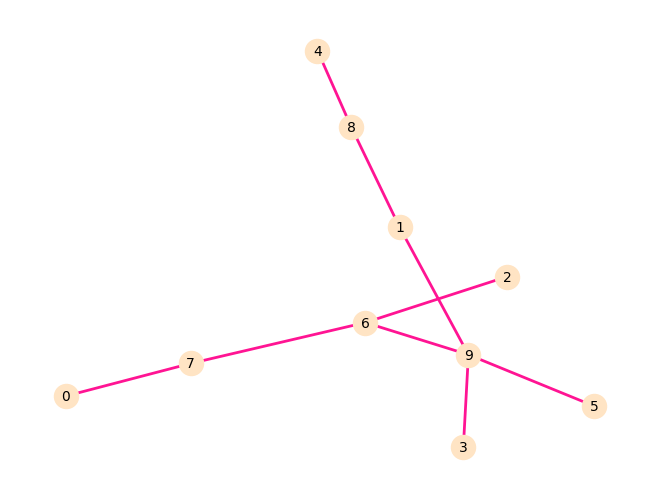

this is A_dict: 
{'4_8': [['a', '-'], ['c', '-'], ['c', 'c'], ['a', 'a'], ['c', 'c'], ['a', 'g'], ['c', 'a'], ['c', 'c'], ['c', 't']], '1_8': [['c', '-'], ['a', '-'], ['c', 'c'], ['g', 'g'], ['a', '-'], ['c', 'c'], ['t', 'c']], '1_9': [['c', 'a'], ['g', 'a'], ['c', 't'], ['-', 'a'], ['c', 'c']], '6_9': [['-', 't'], ['a', 'a'], ['a', 'a'], ['t', 't'], ['a', 'a'], ['c', 'g']], '5_9': [['a', '-'], ['a', 'g'], ['t', 't'], ['a', 'g'], ['c', 'a']], '3_9': [['a', 'g'], ['a', 'g'], ['t', 't'], ['-', 'c'], ['-', 'a'], ['a', 'a'], ['c', 't']], '6_7': [['t', 't'], ['a', 'g'], ['a', 'g'], ['t', 't'], ['a', 'g'], ['g', 't']], '2_6': [['t', 'c'], ['-', 'g'], ['a', 'a'], ['a', 'a'], ['t', 'g'], ['a', 'g'], ['g', 'g']], '0_7': [['-', 'c'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['t', 't'], ['-', 'c'], ['g', 'a'], ['t', 'c']]}
Total cost of MSA:1195


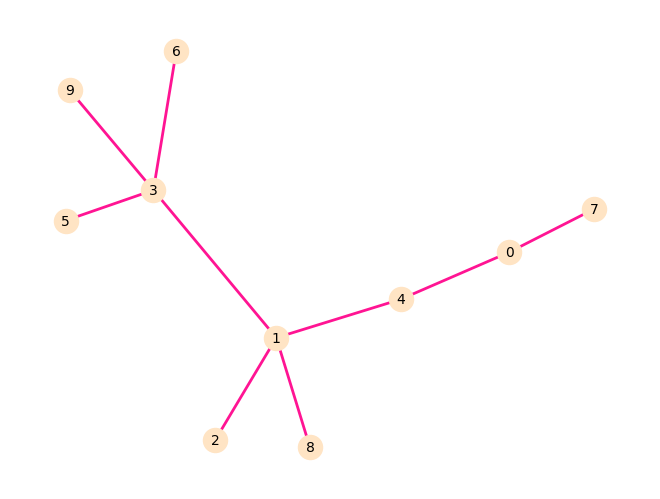

this is A_dict: 
{'1_8': [['g', 'g'], ['-', 'c'], ['a', 'a'], ['a', 'c'], ['a', 'a'], ['g', 'c']], '1_3': [['g', 'g'], ['c', 'c'], ['a', 'a'], ['c', 't'], ['a', '-'], ['c', 't']], '1_2': [['g', 'a'], ['c', 't'], ['a', 'g'], ['c', 'c'], ['-', 'g'], ['a', 'g'], ['c', 'c']], '1_4': [['-', 'c'], ['g', 'g'], ['c', 't'], ['a', 'a'], ['c', 'c'], ['a', 'g'], ['c', '-']], '3_6': [['g', '-'], ['c', 'c'], ['a', 'a'], ['t', 'c'], ['t', 'c']], '3_9': [['g', 'g'], ['c', 'c'], ['a', 't'], ['t', 't'], ['t', 't'], ['-', 'c']], '3_5': [['-', 'g'], ['g', 'g'], ['c', 'c'], ['a', 'a'], ['-', 'g'], ['t', 't'], ['-', 'g'], ['t', 't']], '0_4': [['c', 'c'], ['-', 'a'], ['g', 'g'], ['-', 'c'], ['t', 't'], ['a', 'a'], ['c', 't'], ['g', 'a']], '0_7': [['c', 't'], ['a', 'g'], ['g', 'g'], ['c', '-'], ['t', 't'], ['a', 'a'], ['t', 't'], ['a', '-']]}
Total cost of MSA:1018


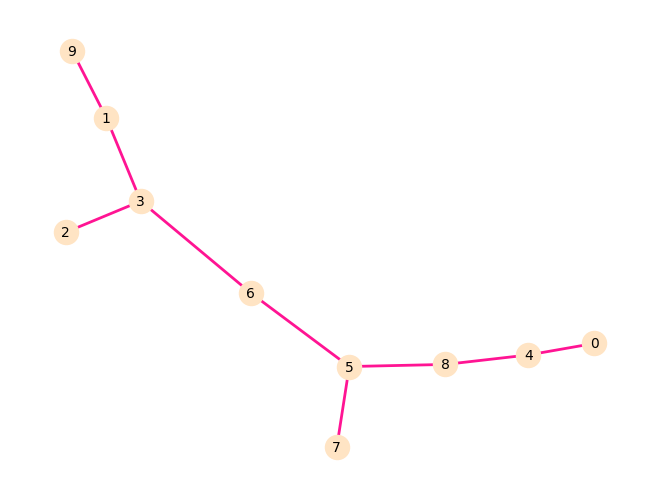

this is A_dict: 
{'0_4': [['a', 'a'], ['c', 'c'], ['-', 't'], ['g', 'g'], ['a', 't'], ['a', 'a'], ['a', 'a'], ['c', '-'], ['t', '-'], ['t', 't']], '4_8': [['a', 'a'], ['c', 't'], ['t', 'c'], ['g', 'g'], ['t', 'c'], ['a', 't'], ['a', 'g'], ['t', 'g']], '5_8': [['a', '-'], ['t', 't'], ['c', 'a'], ['g', 'g'], ['c', '-'], ['t', 't'], ['g', 'g'], ['g', 'g']], '5_6': [['t', '-'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['g', 'g'], ['g', 'c']], '5_7': [['t', 't'], ['a', '-'], ['g', '-'], ['t', 'c'], ['g', 'g'], ['g', 'a']], '3_6': [['a', 'a'], ['-', 'g'], ['g', 'g'], ['t', 'c'], ['g', 'g'], ['c', 'c']], '2_3': [['a', 'g'], ['-', 'c'], ['g', 'g'], ['g', 'g'], ['c', 'c'], ['g', 'g'], ['c', '-']], '1_3': [['a', 'a'], ['g', 'g'], ['-', 't'], ['g', 'g'], ['-', 'c'], ['c', 'c'], ['g', 'a'], ['-', 'c'], ['c', 'c']], '1_9': [['a', 't'], ['g', 'g'], ['t', 'a'], ['g', 'g'], ['c', 'c'], ['c', 'c'], ['a', 'a'], ['c', 't'], ['c', 'a']]}
Total cost of MSA:1332


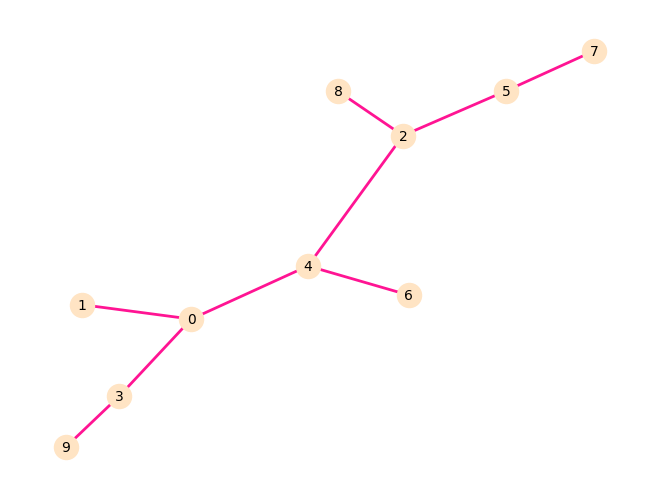

this is A_dict: 
{'0_3': [['c', 'c'], ['t', 't'], ['c', 'c'], ['t', 'c'], ['-', 'g'], ['t', 't'], ['c', 'c'], ['-', 'a']], '0_1': [['-', 'g'], ['c', 'c'], ['t', 'g'], ['c', 'c'], ['t', 't'], ['t', 't'], ['c', '-']], '0_4': [['c', '-'], ['t', 't'], ['c', '-'], ['t', 't'], ['t', 'g'], ['c', 't']], '3_9': [['c', 'c'], ['t', 'a'], ['c', 'c'], ['c', 'g'], ['g', 'g'], ['t', 't'], ['c', 't'], ['a', 'a'], ['-', 't']], '2_4': [['t', 't'], ['t', 't'], ['g', 'g'], ['t', 'g']], '4_6': [['t', 'a'], ['t', 'a'], ['g', 'a'], ['t', 'c']], '2_5': [['-', 'g'], ['t', 'a'], ['t', 't'], ['g', 'g'], ['-', 'a'], ['g', 'a']], '2_8': [['-', 't'], ['-', 'a'], ['t', 't'], ['t', 't'], ['-', 'c'], ['g', 'g'], ['g', 'a']], '5_7': [['-', 't'], ['-', 'a'], ['g', 'g'], ['a', 'a'], ['t', 't'], ['g', 'a'], ['a', 'a'], ['a', 'g']]}
Total cost of MSA:1340


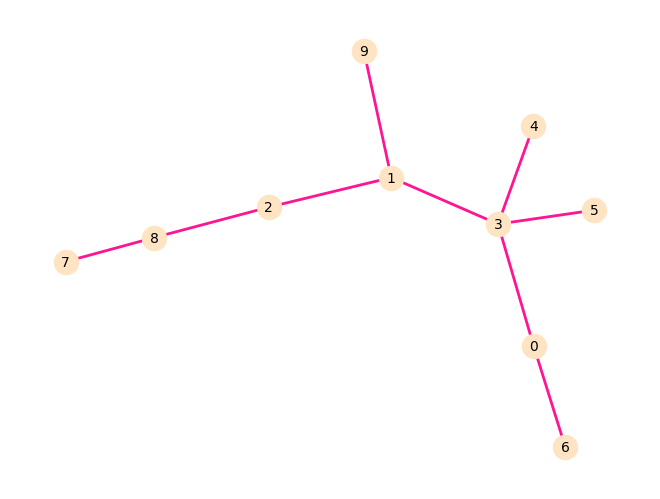

this is A_dict: 
{'1_2': [['a', 'a'], ['g', 'a'], ['t', '-'], ['c', 'c'], ['t', 'g']], '1_9': [['a', 't'], ['g', 'g'], ['t', 't'], ['c', 't'], ['-', 'a'], ['t', 't']], '1_3': [['-', 'g'], ['-', 'a'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['c', 't'], ['t', 'c'], ['-', 'g']], '2_8': [['a', 'c'], ['a', 'a'], ['c', 'g'], ['g', 'g']], '3_5': [['g', 'g'], ['a', 'g'], ['a', 'a'], ['-', 't'], ['g', 'g'], ['t', 'c'], ['t', 'c'], ['c', 't'], ['g', 'g']], '3_4': [['g', 'a'], ['a', 't'], ['a', 'a'], ['g', 'c'], ['t', 't'], ['t', 't'], ['c', 'c'], ['-', 'a'], ['g', 'a']], '0_3': [['-', 'a'], ['g', 'g'], ['a', 'g'], ['a', 'a'], ['g', 'g'], ['t', '-'], ['t', 'a'], ['c', 'a'], ['g', 'g']], '7_8': [['-', 'g'], ['c', 't'], ['a', 'g'], ['g', 'g'], ['g', 'a']], '0_6': [['-', 't'], ['a', 'c'], ['g', 't'], ['g', 'g'], ['a', 'a'], ['g', 't'], ['a', 'a'], ['a', 'a'], ['g', 'g']]}
Total cost of MSA:1375


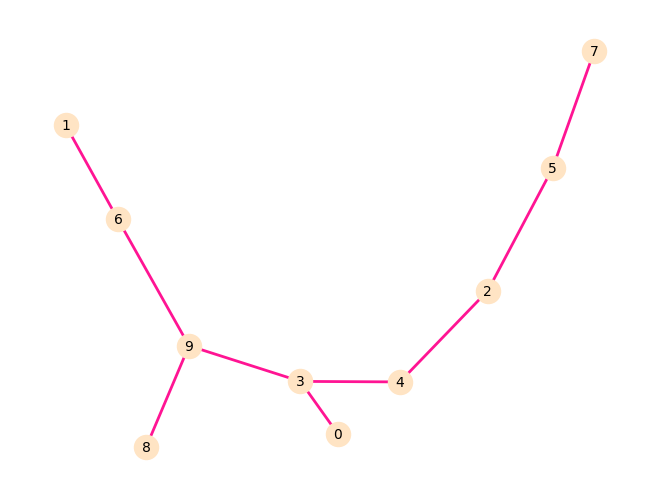

this is A_dict: 
{'2_4': [['a', 'a'], ['t', 't'], ['c', 't'], ['c', 'g'], ['g', 'g'], ['a', 'c'], ['a', 'a']], '3_4': [['a', '-'], ['t', 't'], ['c', '-'], ['c', 'c'], ['g', 'g'], ['a', 'a'], ['a', 't']], '2_5': [['a', 'a'], ['t', '-'], ['t', 't'], ['g', 'a'], ['g', 'g'], ['c', '-'], ['a', 'a']], '3_9': [['t', 't'], ['-', 'a'], ['c', 'c'], ['g', 'g'], ['-', 't'], ['a', 'a'], ['t', 'c']], '0_3': [['t', 'c'], ['c', 'c'], ['-', 'a'], ['g', 'g'], ['a', 'a'], ['-', 'c'], ['t', 't'], ['-', 'c'], ['-', 'g']], '5_7': [['a', 'g'], ['t', 'c'], ['a', 't'], ['g', 'g'], ['a', '-']], '6_9': [['t', 't'], ['-', 'g'], ['a', 'a'], ['c', 'c'], ['g', 'a'], ['t', 'g'], ['a', 'a'], ['c', 't']], '8_9': [['t', 'g'], ['a', 'a'], ['-', 'g'], ['c', 't'], ['g', 'a'], ['t', 't'], ['a', 't'], ['c', 'c']], '1_6': [['t', 't'], ['g', 'g'], ['a', 'a'], ['-', 't'], ['c', 'c'], ['a', 'g'], ['-', 't'], ['g', 'g'], ['a', 'a'], ['t', '-']]}
Total cost of MSA:1398


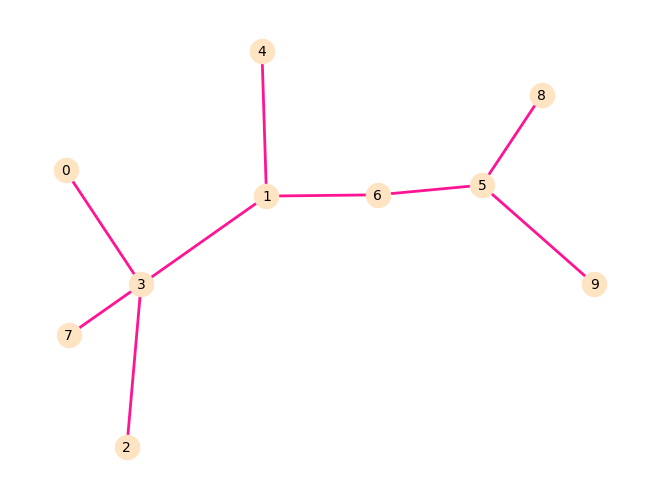

this is A_dict: 
{'1_4': [['g', 'g'], ['t', 'g'], ['g', 'g'], ['g', 'g'], ['c', 't'], ['g', '-'], ['c', 't'], ['a', 'a']], '1_3': [['g', '-'], ['g', 't'], ['g', 'g'], ['g', 'g'], ['t', 't'], ['t', 't'], ['a', 'a']], '1_6': [['g', 'a'], ['g', 'g'], ['g', 't'], ['g', 'a'], ['t', 't'], ['t', 't'], ['a', '-']], '0_3': [['t', 't'], ['g', 'g'], ['-', 'c'], ['g', 'g'], ['t', 't'], ['t', 't'], ['a', 'a'], ['-', 'g']], '2_3': [['-', 'c'], ['t', 'c'], ['g', 'a'], ['g', 'g'], ['t', 't'], ['t', 'c'], ['a', 'g']], '3_7': [['t', 't'], ['g', 'a'], ['g', 'a'], ['t', '-'], ['t', 'g'], ['a', 'g']], '5_6': [['a', 'a'], ['g', '-'], ['t', 'c'], ['a', '-'], ['t', 'c'], ['t', 't']], '5_9': [['a', 'a'], ['c', 'c'], ['c', 'c'], ['t', 'a']], '5_8': [['a', 'g'], ['c', 'c'], ['-', 't'], ['c', 't'], ['t', 't'], ['-', 'a']]}
Total cost of MSA:1067


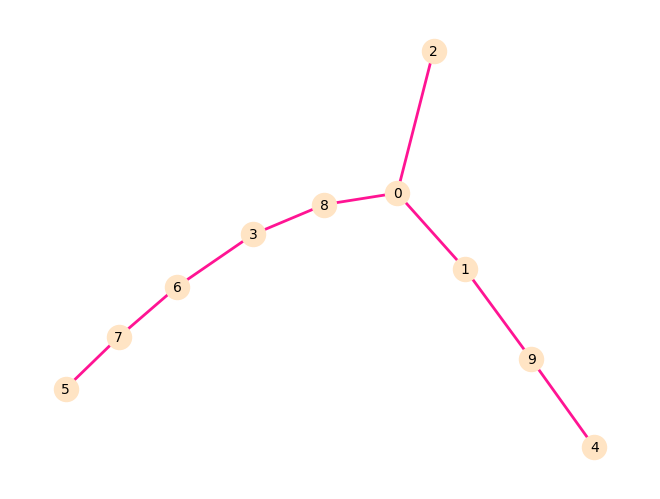

this is A_dict: 
{'3_6': [['c', 'c'], ['t', 'c'], ['t', 't'], ['t', 't'], ['a', 'g'], ['a', 'g'], ['g', 't'], ['t', 'c'], ['c', 'c']], '3_8': [['c', '-'], ['t', 't'], ['t', 'c'], ['t', 't'], ['a', 'a'], ['a', 'c'], ['g', 'g'], ['t', 'c'], ['c', 'g']], '6_7': [['c', 'g'], ['c', 'a'], ['t', 't'], ['t', 't'], ['g', '-'], ['g', 'a'], ['t', 't'], ['c', 't'], ['c', 'c']], '0_8': [['t', 't'], ['c', 'c'], ['t', 't'], ['a', '-'], ['c', '-'], ['g', '-'], ['c', '-'], ['g', 'g']], '5_7': [['g', 'g'], ['a', 'a'], ['t', 'a'], ['t', 't'], ['a', 'a'], ['t', 't'], ['t', 't'], ['-', 'a'], ['c', 'g']], '0_2': [['t', 'c'], ['c', 'c'], ['t', 'c'], ['g', 'a']], '0_1': [['t', 't'], ['-', 'a'], ['-', 'g'], ['c', 't'], ['t', 't'], ['g', 'a']], '1_9': [['t', 'g'], ['a', 'a'], ['g', 'g'], ['t', '-'], ['t', 't'], ['a', 'a']], '4_9': [['g', 'a'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['a', '-']]}
Total cost of MSA:1399


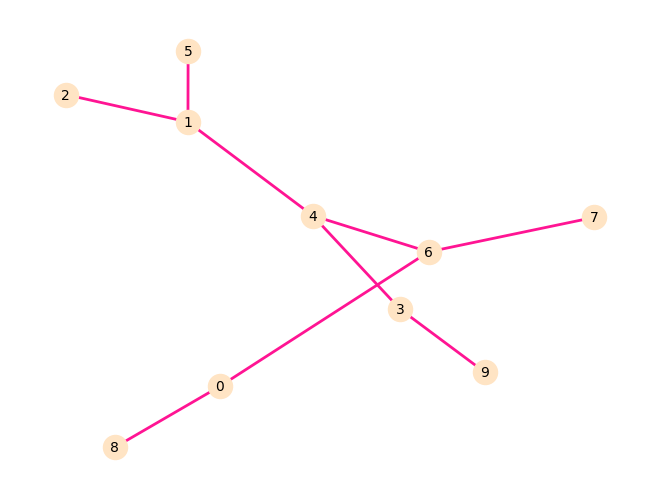

this is A_dict: 
{'1_2': [['t', '-'], ['t', 'g'], ['a', 'g'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['a', 'c'], ['g', 'g'], ['a', '-']], '1_4': [['g', 'a'], ['g', 'g'], ['a', 'c'], ['g', 'a'], ['t', '-'], ['c', 'c'], ['g', 'a']], '1_5': [['g', 'g'], ['g', 'a'], ['-', 't'], ['-', 'c'], ['a', 'a'], ['g', 'a'], ['t', 'g'], ['c', 'c'], ['g', 'c']], '4_6': [['a', 't'], ['g', 'g'], ['c', 't'], ['a', 'g'], ['c', 'c'], ['a', '-']], '3_4': [['a', 'c'], ['g', 'g'], ['c', 't'], ['a', 'a'], ['-', 'c'], ['c', 'c'], ['a', 'a'], ['-', 'g']], '0_6': [['t', 't'], ['g', 'g'], ['t', '-'], ['g', 'g'], ['c', 'c']], '6_7': [['t', '-'], ['g', 'a'], ['t', 't'], ['g', 't'], ['c', 'c']], '3_9': [['c', '-'], ['g', 'a'], ['t', 'c'], ['a', 'g'], ['c', 'c'], ['c', 't'], ['a', 'a'], ['g', 'a'], ['-', 't']], '0_8': [['t', 'g'], ['g', 'a'], ['g', 'a'], ['c', 'g']]}
Total cost of MSA:1169


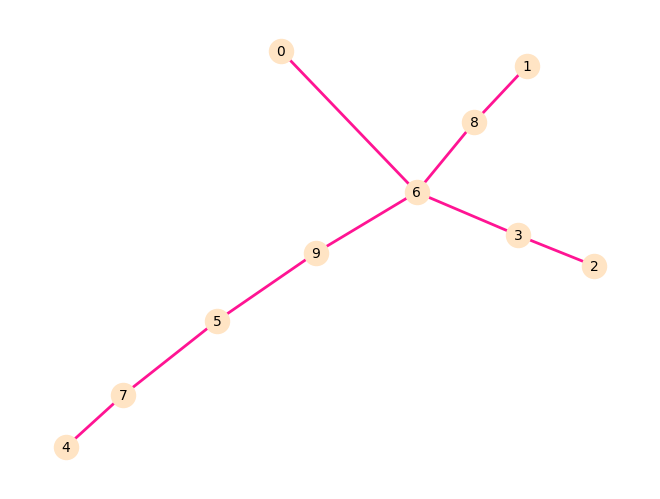

this is A_dict: 
{'2_3': [['c', 't'], ['c', 'g'], ['c', 'c'], ['t', 't'], ['g', 'a'], ['t', 'c'], ['g', 'g'], ['a', '-'], ['g', 'c']], '3_6': [['t', 't'], ['g', '-'], ['c', 't'], ['t', 't'], ['a', 'g'], ['c', '-'], ['g', 'a'], ['c', 'c']], '0_6': [['t', 't'], ['t', 't'], ['t', 't'], ['g', 'g'], ['a', 'a'], ['c', 't']], '6_9': [['-', 'g'], ['t', 'g'], ['t', 't'], ['t', 't'], ['g', 'g'], ['a', '-'], ['c', 'c']], '6_8': [['-', 'g'], ['t', 'c'], ['t', 'g'], ['t', 't'], ['g', 'g'], ['a', 'a'], ['c', 'c'], ['-', 'a']], '5_9': [['g', 'g'], ['g', 'a'], ['t', '-'], ['t', '-'], ['g', 'g'], ['c', 'c']], '1_8': [['g', 'g'], ['c', 'c'], ['-', 'a'], ['g', 'g'], ['t', 'a'], ['g', 'a'], ['a', 'a'], ['c', 'c'], ['a', '-']], '5_7': [['g', 'a'], ['a', 'a'], ['g', 'a'], ['c', 'g']], '4_7': [['a', 'c'], ['a', 'g'], ['a', 't'], ['g', 'a']]}
Total cost of MSA:1228


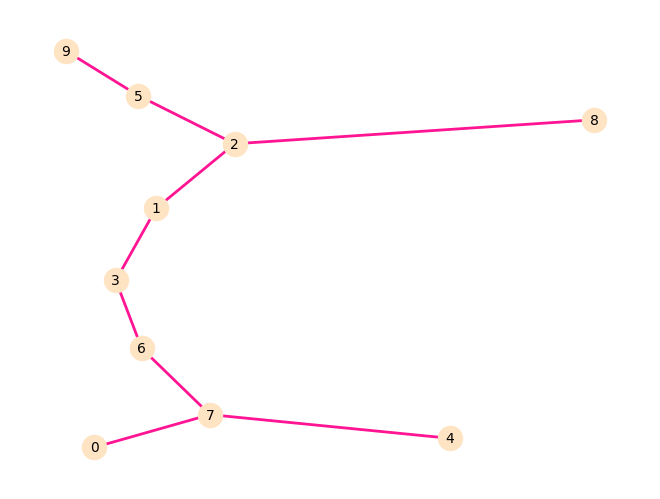

this is A_dict: 
{'4_7': [['t', 't'], ['g', '-'], ['c', 'c'], ['g', 'g'], ['a', '-'], ['g', 't'], ['c', 'c']], '6_7': [['t', 'g'], ['c', 'c'], ['g', 'g'], ['t', 't'], ['c', '-']], '0_7': [['-', 'c'], ['-', 'a'], ['t', 't'], ['c', 'c'], ['-', 't'], ['g', 'a'], ['-', 'c'], ['t', 't'], ['c', 't']], '3_6': [['-', 'a'], ['g', 'g'], ['c', 'c'], ['g', '-'], ['t', 't']], '1_3': [['a', 'a'], ['g', 'a'], ['-', 't'], ['c', 'c'], ['t', 'c']], '1_2': [['a', '-'], ['a', 'g'], ['t', 't'], ['c', 'c'], ['c', 'a']], '2_8': [['g', 'g'], ['-', 'c'], ['t', 't'], ['c', 'c'], ['a', 'g']], '2_5': [['-', 'g'], ['-', 'g'], ['g', 'g'], ['t', 't'], ['c', 't'], ['-', 'a'], ['a', 'a']], '5_9': [['g', 'g'], ['g', 'g'], ['g', 'g'], ['t', 't'], ['t', 'c'], ['a', 'g'], ['-', 't'], ['-', 't'], ['a', 'a']]}
Total cost of MSA:1226


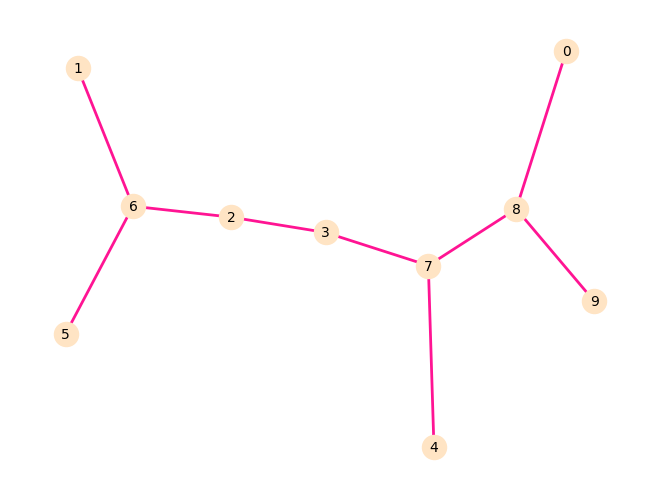

this is A_dict: 
{'0_8': [['g', 'a'], ['a', 'a'], ['c', 'c'], ['c', 'a'], ['t', 'c'], ['a', 'a'], ['t', 't'], ['c', 't'], ['g', 't']], '8_9': [['a', 'a'], ['a', 'a'], ['c', 'c'], ['a', '-'], ['c', 'c'], ['a', 'a'], ['t', 't'], ['t', 't'], ['-', 'a'], ['t', 'c']], '7_8': [['a', '-'], ['a', '-'], ['c', 'c'], ['a', '-'], ['c', 'c'], ['a', 'a'], ['t', 't'], ['t', 't'], ['t', 't'], ['-', 'a']], '3_7': [['c', 'c'], ['c', 'a'], ['a', 'a'], ['t', 'g'], ['t', 'a'], ['t', 't'], ['a', 'a']], '4_7': [['c', 'c'], ['c', 'c'], ['a', 'g'], ['t', 'c'], ['t', 'c'], ['-', 'g'], ['-', 'g'], ['t', 'c'], ['a', 'g']], '2_3': [['c', '-'], ['a', '-'], ['a', 'a'], ['g', 'g'], ['a', 'g'], ['t', 'c'], ['a', 'g']], '2_6': [['a', 't'], ['g', 'a'], ['g', 'g'], ['c', 't'], ['g', '-']], '5_6': [['-', 'g'], ['-', 'g'], ['t', 't'], ['a', 'g'], ['g', 'g'], ['t', 't']], '1_6': [['t', 't'], ['-', 'c'], ['a', 'c'], ['g', 'g'], ['t', 't'], ['-', 'c']]}
Total cost of MSA:1422


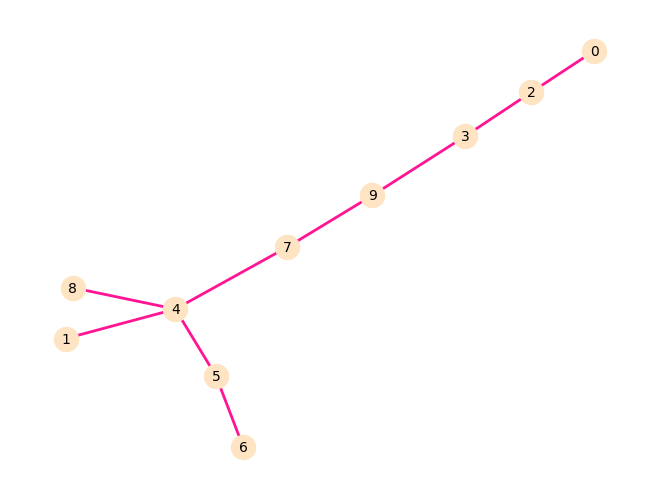

this is A_dict: 
{'0_2': [['t', 't'], ['c', 'c'], ['c', 'c'], ['g', 'g'], ['a', 'g'], ['c', 'a'], ['t', 't'], ['t', 'c'], ['a', 't']], '2_3': [['t', 'c'], ['-', 'a'], ['c', 'c'], ['c', 'c'], ['g', 'g'], ['a', '-'], ['c', 't'], ['t', 't'], ['t', 'c'], ['a', 'g']], '3_9': [['c', 't'], ['a', 'a'], ['c', 't'], ['c', 'c'], ['g', 'g'], ['t', 't'], ['t', 't'], ['c', 't'], ['g', '-']], '7_9': [['t', '-'], ['a', 'a'], ['t', '-'], ['c', 'c'], ['g', 'g'], ['t', 'a'], ['t', 't'], ['t', 't']], '4_7': [['a', 'a'], ['c', 'c'], ['g', 'a'], ['a', 'g'], ['t', 'g'], ['t', 'c']], '4_5': [['a', 'a'], ['c', '-'], ['a', 'a'], ['g', '-'], ['g', 'g'], ['c', 'c']], '1_4': [['a', 'g'], ['c', 'a'], ['a', 'a'], ['g', 'g'], ['g', 'g'], ['-', 't'], ['c', 'c']], '4_8': [['-', 'g'], ['a', 'g'], ['c', 'c'], ['a', 'c'], ['g', 'a'], ['g', 'g'], ['c', 't']], '5_6': [['a', 'a'], ['a', 'a'], ['g', 'g'], ['c', 'a']]}
Total cost of MSA:1206


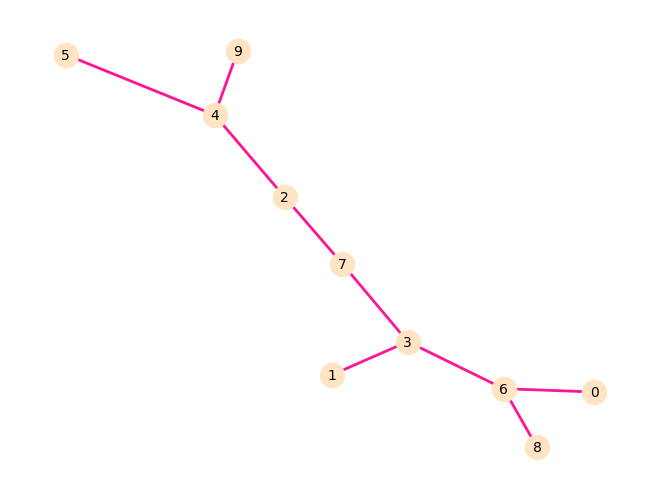

this is A_dict: 
{'1_3': [['t', 'a'], ['t', 't'], ['c', '-'], ['c', 'c'], ['c', 'c'], ['c', 't'], ['g', 'g'], ['g', 'g'], ['c', '-']], '3_7': [['a', '-'], ['t', 't'], ['c', '-'], ['c', 't'], ['t', 't'], ['g', 'a'], ['g', 'g']], '3_6': [['a', 'a'], ['t', 't'], ['-', 'a'], ['c', 'a'], ['c', 'g'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['-', 'a']], '2_7': [['t', '-'], ['t', '-'], ['t', 'c'], ['a', 'a'], ['g', 'g'], ['-', 'c']], '6_8': [['a', 'g'], ['t', 'c'], ['a', 't'], ['a', 'a'], ['g', 'a'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['a', 'c']], '0_6': [['a', '-'], ['t', 't'], ['a', 'a'], ['a', 'g'], ['g', 'g'], ['t', 't'], ['g', 'a'], ['-', 'c'], ['g', 'c'], ['a', 't']], '2_4': [['c', 'g'], ['a', 'a'], ['g', 'c'], ['c', 'c']], '4_5': [['g', 'a'], ['a', 'a'], ['c', 't'], ['c', 'c']], '4_9': [['g', 'g'], ['a', 'a'], ['c', 'a'], ['c', 'a']]}
Total cost of MSA:1236


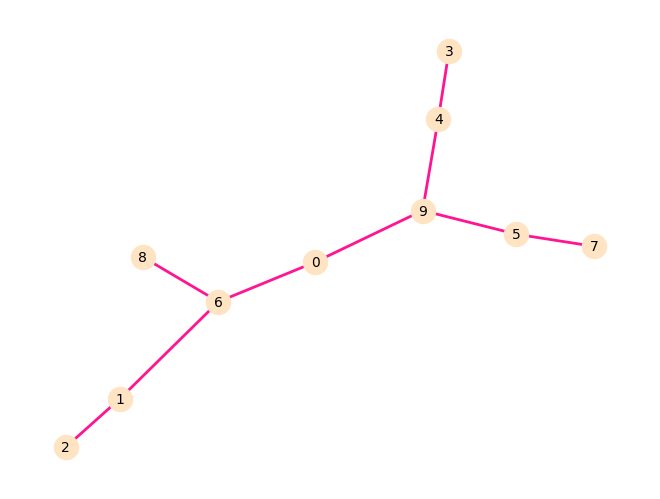

this is A_dict: 
{'3_4': [['c', 'c'], ['c', 't'], ['a', 'a'], ['t', '-'], ['t', 'c'], ['a', 'a'], ['g', 't'], ['g', 'g'], ['a', '-']], '4_9': [['c', 'c'], ['t', 't'], ['a', '-'], ['c', 'c'], ['a', 't'], ['t', 't'], ['g', 'c']], '0_9': [['c', 'c'], ['-', 'a'], ['t', 't'], ['c', 't'], ['t', 'g'], ['t', 't'], ['c', 'c']], '5_9': [['c', 't'], ['t', 't'], ['c', 'c'], ['-', 'a'], ['t', 't'], ['t', 'c'], ['c', 'c'], ['-', 'a']], '0_6': [['c', '-'], ['a', 'a'], ['t', 't'], ['t', 't'], ['g', '-'], ['t', 't'], ['c', 'a']], '5_7': [['t', 't'], ['-', 'g'], ['t', 't'], ['c', 'c'], ['a', '-'], ['t', 'c'], ['c', 't'], ['c', 'c'], ['a', 'a']], '1_6': [['a', 'a'], ['t', 'c'], ['t', 'c'], ['t', 'c'], ['a', 'a']], '6_8': [['a', 'g'], ['t', 't'], ['t', 't'], ['t', 'c'], ['a', '-']], '1_2': [['-', 'a'], ['-', 'c'], ['a', 'a'], ['c', 'c'], ['c', 'c'], ['c', 'c'], ['a', 'g'], ['-', 'c']]}
Total cost of MSA:1142


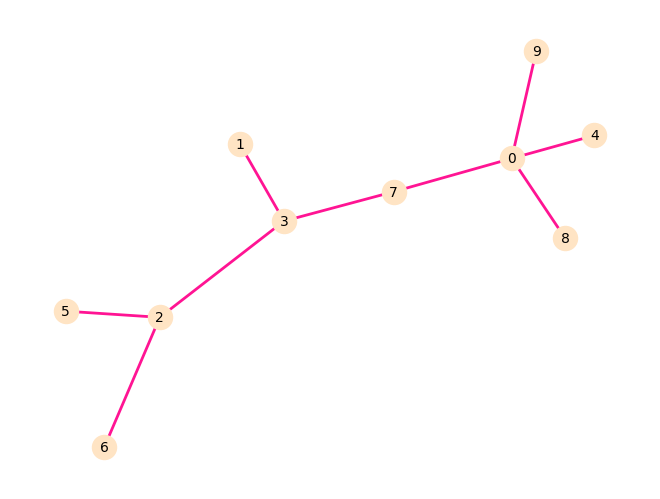

this is A_dict: 
{'2_3': [['t', 'c'], ['g', 'g'], ['t', 'c'], ['t', 'a']], '1_3': [['-', 'a'], ['t', 't'], ['g', 'a'], ['-', 't'], ['t', 't'], ['t', 't'], ['-', 'c']], '3_7': [['t', 't'], ['-', 'g'], ['-', 'g'], ['g', 'g'], ['t', 'g'], ['t', 'c']], '2_6': [['c', 'c'], ['g', 'a'], ['c', 'a'], ['a', 'a']], '2_5': [['c', 'a'], ['g', 'a'], ['c', 't'], ['a', 'g']], '0_7': [['-', 'g'], ['t', 't'], ['g', 'g'], ['g', 't'], ['g', 'g'], ['g', 'g'], ['c', 'g']], '0_9': [['-', 'a'], ['g', 'g'], ['t', 't'], ['g', 'g'], ['t', '-'], ['g', 'a'], ['g', 'g'], ['g', 'a']], '0_4': [['g', 'g'], ['t', 'c'], ['-', 'a'], ['g', 'a'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['-', 'a'], ['g', 'a']], '0_8': [['g', 'g'], ['t', 't'], ['g', '-'], ['t', 't'], ['g', 'g'], ['g', 'a'], ['-', 't'], ['-', 'c'], ['g', 'g']]}
Total cost of MSA:1108


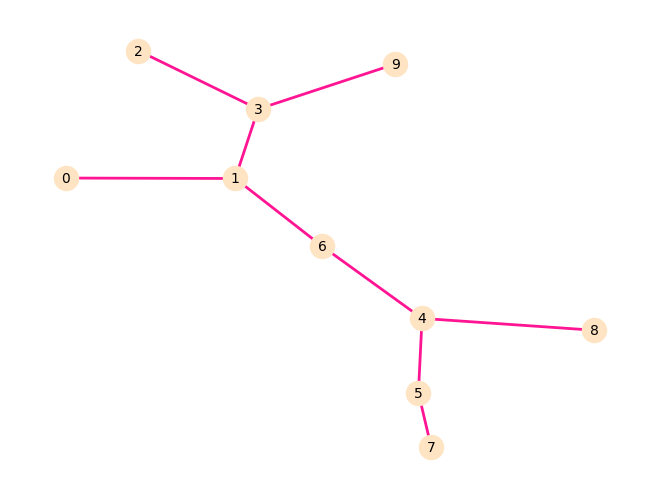

this is A_dict: 
{'0_1': [['t', 't'], ['c', 'a'], ['t', 'g'], ['t', 't'], ['a', '-'], ['t', 'c'], ['a', 'a'], ['g', '-'], ['c', 'c']], '1_3': [['t', '-'], ['a', 'a'], ['g', '-'], ['t', '-'], ['c', 'c'], ['a', 'g'], ['c', 'c']], '1_6': [['t', 't'], ['a', 't'], ['g', 'g'], ['t', 'a'], ['c', 'c'], ['a', 'a'], ['c', 't'], ['-', 'g']], '2_3': [['a', 'a'], ['c', 'g'], ['g', 'g'], ['c', 'g']], '3_9': [['a', 't'], ['c', 'c'], ['-', 'a'], ['g', 'a'], ['c', 't']], '4_6': [['t', 'g'], ['t', 'c'], ['g', 'g'], ['a', 'a'], ['c', 'a'], ['a', 'a'], ['t', 'c'], ['g', 'g']], '4_5': [['g', '-'], ['c', 'c'], ['g', 'g'], ['a', 'a'], ['a', 'a'], ['a', 'a'], ['c', 't'], ['-', 'g'], ['g', 'g']], '4_8': [['-', 'a'], ['g', 'g'], ['c', 'c'], ['g', 'g'], ['a', 'c'], ['a', 'a'], ['a', 'g'], ['c', '-'], ['g', 'a']], '5_7': [['c', 't'], ['g', 'g'], ['a', 'a'], ['-', 'c'], ['a', 'a'], ['a', 'a'], ['t', 'c'], ['g', 'c'], ['g', 'g']]}
Total cost of MSA:1324


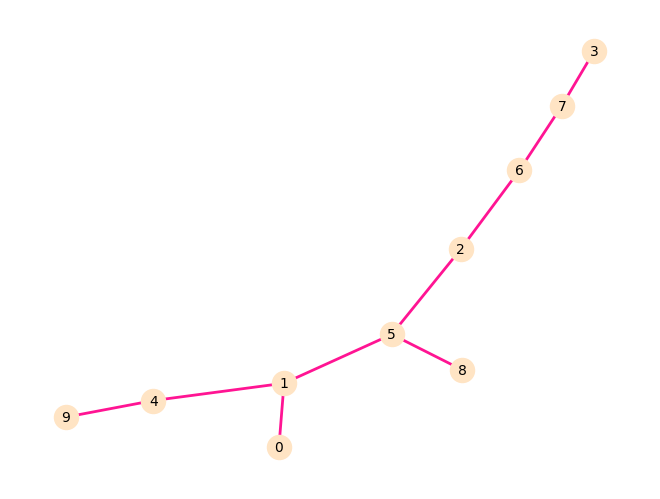

this is A_dict: 
{'2_5': [['a', 't'], ['a', 'a'], ['g', 'a'], ['t', 't'], ['a', 'a'], ['-', 'c'], ['a', 'a']], '2_6': [['a', '-'], ['a', 'g'], ['g', 't'], ['t', 't'], ['a', 'a'], ['a', 'a']], '1_5': [['-', 'c'], ['t', 'c'], ['a', 'g'], ['a', 'a'], ['t', 'g'], ['a', 'a'], ['c', 't'], ['a', 'a']], '5_8': [['-', 'g'], ['t', 't'], ['a', 'a'], ['a', 'g'], ['t', 'a'], ['a', 'a'], ['c', 'c'], ['-', 't'], ['a', 'a']], '6_7': [['g', 'g'], ['-', 'c'], ['t', 't'], ['t', 'c'], ['a', 'a'], ['-', 't'], ['-', 't'], ['a', 'a']], '1_4': [['c', 'c'], ['c', 'c'], ['g', 'a'], ['a', 'a'], ['g', 'g'], ['a', 'g'], ['t', 'c'], ['a', '-']], '0_1': [['c', 'c'], ['c', 'c'], ['g', 't'], ['a', 'a'], ['-', 't'], ['g', 'g'], ['a', 'a'], ['t', '-'], ['a', 'a']], '3_7': [['-', 'c'], ['g', 'a'], ['c', 'c'], ['t', 't'], ['c', 'c'], ['a', 'c'], ['t', 't'], ['t', 't'], ['a', 't']], '4_9': [['c', '-'], ['c', 'c'], ['a', 'a'], ['a', 'a'], ['g', '-'], ['g', '-'], ['c', 'c']]}
Total cost of MSA:1238


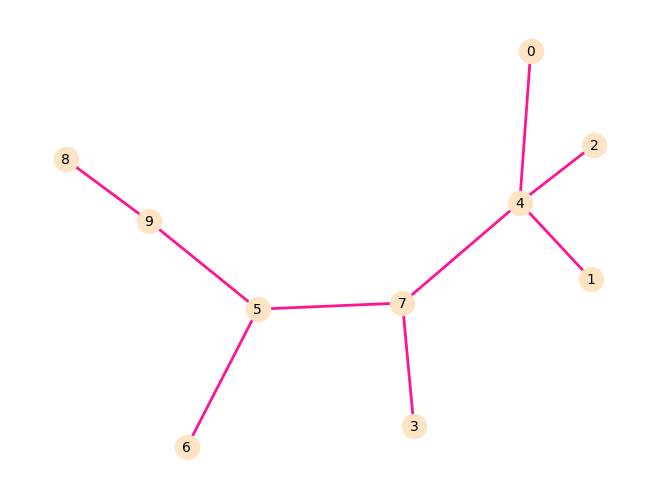

this is A_dict: 
{'2_4': [['c', '-'], ['c', 'c'], ['t', '-'], ['t', 'g'], ['c', 'c'], ['t', 'c'], ['t', 'g'], ['g', 'g'], ['t', 't']], '0_4': [['c', 't'], ['g', 'a'], ['c', 't'], ['c', 't'], ['g', 'a'], ['g', 'g'], ['t', 't'], ['-', 'a']], '4_7': [['c', 'g'], ['g', 'a'], ['c', 'c'], ['c', 't'], ['g', 'a'], ['g', 'g'], ['t', '-']], '1_4': [['c', '-'], ['g', 'g'], ['c', 'c'], ['c', 'c'], ['-', 'a'], ['g', 'a'], ['g', 'g'], ['t', 'c'], ['-', 'g']], '5_7': [['g', 'g'], ['a', '-'], ['c', 't'], ['t', 't'], ['a', 't'], ['g', 'g']], '3_7': [['g', 'g'], ['-', 't'], ['a', 'a'], ['-', 'c'], ['c', 'c'], ['t', 't'], ['a', 'a'], ['-', 'c'], ['g', 'c']], '5_6': [['g', 'a'], ['t', 't'], ['t', 'c'], ['t', 't'], ['g', '-']], '5_9': [['g', 'g'], ['t', '-'], ['t', 'g'], ['t', 't'], ['g', 'a']], '8_9': [['-', 'c'], ['g', 'a'], ['g', 'a'], ['t', 't'], ['a', 'a'], ['-', 'c']]}
Total cost of MSA:1290


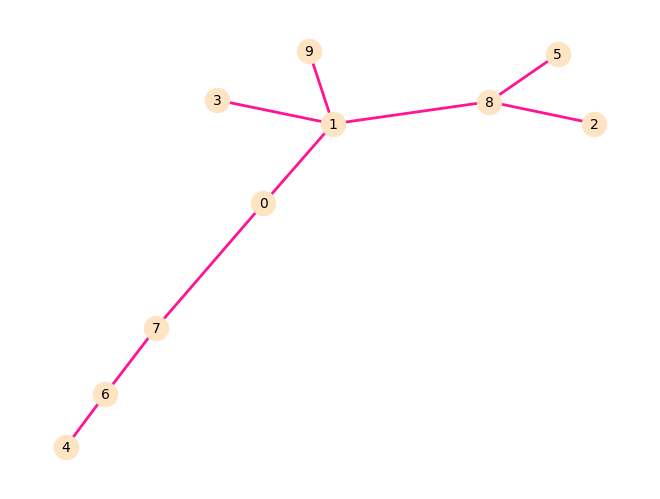

this is A_dict: 
{'2_8': [['a', '-'], ['g', '-'], ['g', 't'], ['g', 'g'], ['a', 'c'], ['g', 'g'], ['g', 'g'], ['t', 't'], ['c', 'c']], '1_8': [['t', 'a'], ['g', 'a'], ['c', 't'], ['g', 'g'], ['g', 'a'], ['t', 't'], ['c', '-']], '5_8': [['-', 't'], ['t', 't'], ['g', 'a'], ['-', 't'], ['c', 'c'], ['g', 't'], ['g', 't'], ['t', 't'], ['c', 'c']], '1_9': [['a', 'a'], ['-', 't'], ['a', 'a'], ['-', 't'], ['t', 't'], ['g', 'a'], ['a', 'g'], ['t', 't']], '1_3': [['-', 'c'], ['a', 'a'], ['a', 't'], ['t', 't'], ['g', 'g'], ['a', 'a'], ['t', 'g']], '0_1': [['a', 'a'], ['a', 'g'], ['t', 't'], ['g', 'c'], ['a', 'c'], ['t', 'a']], '0_7': [['a', 'a'], ['g', '-'], ['t', 't'], ['c', 'c'], ['c', 'c'], ['a', 'a']], '6_7': [['a', 'a'], ['t', 'c'], ['c', 'c'], ['-', 'a'], ['c', 'c'], ['a', 'a'], ['-', 'c'], ['-', 'c']], '4_6': [['a', 'g'], ['c', 'c'], ['-', 't'], ['c', 'c'], ['a', 'a'], ['c', '-'], ['a', 'a'], ['c', 't'], ['-', 'g'], ['c', 't']]}
Total cost of MSA:1451


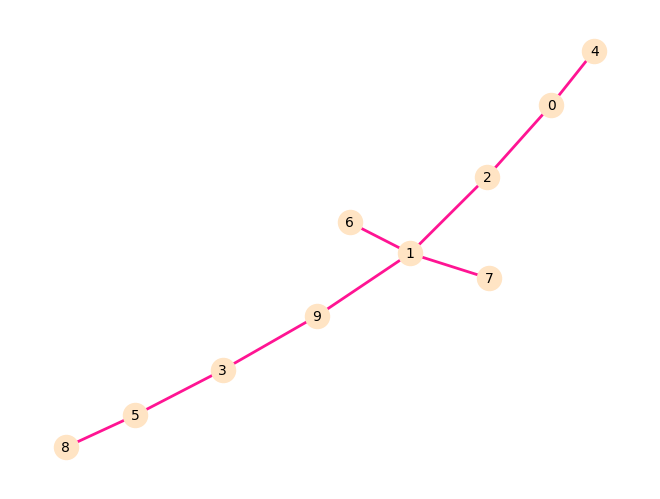

this is A_dict: 
{'0_2': [['t', 't'], ['-', 'c'], ['c', 'c'], ['-', 'a'], ['c', 'c'], ['c', 'c']], '0_4': [['-', 'g'], ['t', 'g'], ['c', 'c'], ['c', 'c'], ['c', 't']], '1_2': [['t', 'c'], ['c', 'g'], ['c', 't'], ['a', 'a'], ['c', 't'], ['c', 'c']], '1_9': [['c', 't'], ['g', 'g'], ['t', 't'], ['a', 't'], ['t', 't'], ['c', 't'], ['-', 'g']], '1_6': [['c', 't'], ['g', 'a'], ['t', 'a'], ['a', 'a'], ['-', 'g'], ['t', 't'], ['-', 'g'], ['c', 'c']], '1_7': [['c', 'c'], ['g', 'g'], ['t', 'c'], ['a', 'a'], ['t', 'c'], ['-', 'a'], ['-', 'g'], ['-', 'a'], ['c', 'c']], '3_9': [['t', '-'], ['g', 'g'], ['t', 't'], ['-', 'c'], ['t', 'c'], ['t', 't'], ['t', 'c'], ['g', 'g']], '3_5': [['g', 'g'], ['t', 'c'], ['c', 't'], ['c', 'a'], ['t', 'g'], ['c', 'c'], ['g', 'g']], '5_8': [['g', 'g'], ['c', 't'], ['t', 'c'], ['a', 'a'], ['-', 'g'], ['g', 'g'], ['c', 't'], ['-', 'a'], ['g', 'a']]}
Total cost of MSA:1236


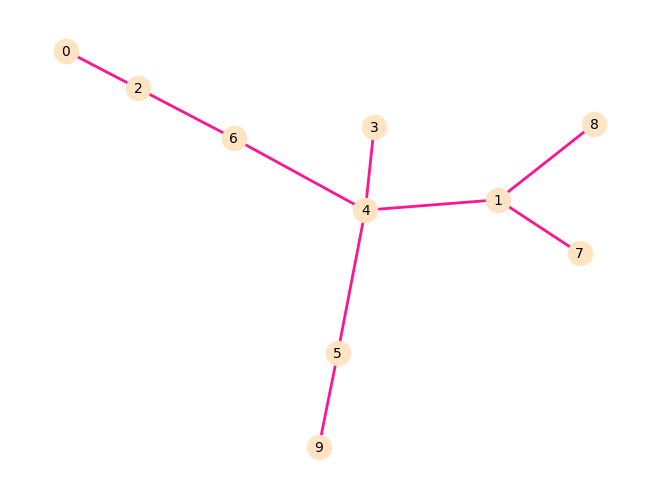

this is A_dict: 
{'2_6': [['c', '-'], ['c', 'c'], ['a', 'a'], ['g', 'g'], ['a', 't'], ['a', 'g'], ['t', 't'], ['c', 'g']], '0_2': [['c', 'g'], ['c', 't'], ['a', 'g'], ['g', 'g'], ['a', 'a'], ['a', 'a'], ['-', 'g'], ['t', 'a'], ['c', 'c']], '4_6': [['c', 'c'], ['a', '-'], ['g', 'g'], ['t', 'c'], ['g', 'a'], ['t', 'c'], ['g', 'g']], '4_5': [['c', '-'], ['g', 'a'], ['c', 'c'], ['a', 'a'], ['c', 'c'], ['g', 'c']], '1_4': [['c', 't'], ['g', 'c'], ['c', 'c'], ['a', 'a'], ['c', 'g'], ['g', 'a']], '3_4': [['c', 'a'], ['g', 'g'], ['c', 'c'], ['a', 'a'], ['-', 't'], ['c', 'c'], ['-', 'g'], ['g', 'g'], ['-', 'a']], '5_9': [['-', 'a'], ['a', 'a'], ['-', 't'], ['c', 't'], ['a', 'a'], ['c', 't'], ['-', 'a'], ['c', 'c']], '1_8': [['t', 't'], ['c', '-'], ['c', 't'], ['a', 'a'], ['g', 'a'], ['a', 'a']], '1_7': [['t', 't'], ['c', 'c'], ['c', 't'], ['a', 'g'], ['g', 'g'], ['-', 'a'], ['a', 'a'], ['-', 'g']]}
Total cost of MSA:1249


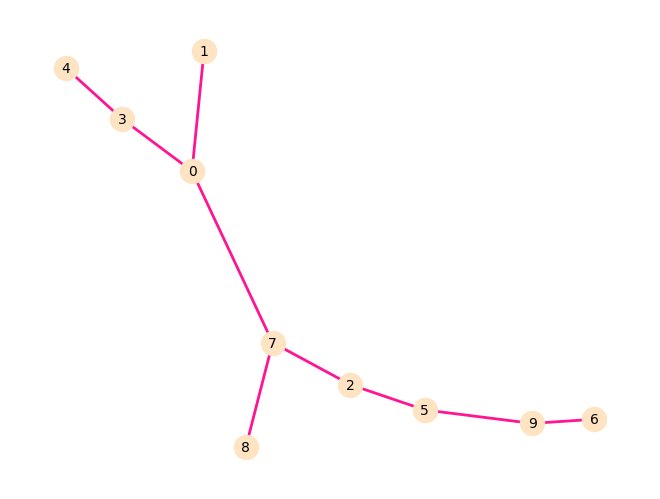

this is A_dict: 
{'3_4': [['-', 'c'], ['t', 't'], ['g', 'a'], ['t', 'c'], ['g', 'a'], ['g', 'a']], '0_3': [['c', 't'], ['t', 'c'], ['-', 'g'], ['a', 'a'], ['c', 'c'], ['a', 't'], ['a', 'a']], '0_7': [['t', 't'], ['c', 'c'], ['g', 'g'], ['a', 'a'], ['c', 't'], ['t', 't'], ['a', 'c']], '0_1': [['t', 'a'], ['c', 't'], ['g', 'a'], ['a', 't'], ['c', 'c'], ['t', 't'], ['a', 'a']], '2_7': [['t', '-'], ['c', 'c'], ['g', '-'], ['a', 'a'], ['t', 'c'], ['t', 'c'], ['c', 'c']], '7_8': [['t', 'c'], ['c', 't'], ['g', 'a'], ['a', 'a'], ['t', 't'], ['t', 't'], ['-', 'a'], ['c', 'c'], ['-', 't']], '2_5': [['c', 't'], ['a', 'c'], ['c', 'c'], ['c', 'a'], ['c', 't']], '5_9': [['t', 'g'], ['c', 'c'], ['c', 'c'], ['a', 'a'], ['t', 't']], '6_9': [['-', 'g'], ['g', 'g'], ['c', 't'], ['c', 't'], ['a', 'g'], ['t', 't']]}
Total cost of MSA:973


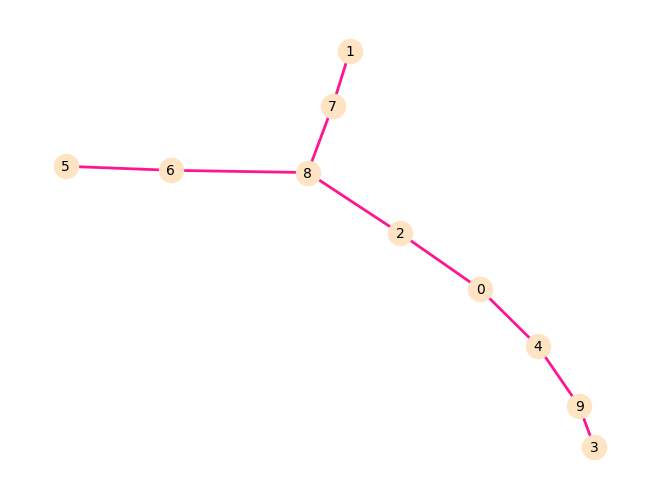

this is A_dict: 
{'1_7': [['c', 't'], ['g', 't'], ['a', 't'], ['c', 'c']], '7_8': [['-', 'a'], ['t', 'g'], ['t', 't'], ['t', 'c'], ['c', 'c']], '2_8': [['a', 'a'], ['g', 'g'], ['t', 't'], ['c', 'c'], ['-', 't'], ['-', 't'], ['c', 't']], '6_8': [['a', 'g'], ['g', 'g'], ['t', 't'], ['c', '-'], ['c', 'g']], '0_2': [['a', 'g'], ['g', 'c'], ['t', 'c'], ['c', 'c'], ['t', 't'], ['t', 'g'], ['t', 't']], '5_6': [['g', 't'], ['g', 'a'], ['t', 'c'], ['g', 'g'], ['-', 'a']], '0_4': [['g', 'a'], ['c', 'c'], ['c', 'c'], ['-', 'g'], ['c', 'c'], ['t', 'c'], ['g', 'g'], ['t', '-']], '4_9': [['a', 'a'], ['c', 'c'], ['c', 'c'], ['g', 'g'], ['c', '-'], ['c', 'g'], ['g', 'a']], '3_9': [['-', 't'], ['-', 't'], ['a', 'g'], ['c', 'c'], ['-', 't'], ['c', 't'], ['g', 'g'], ['g', 'g'], ['a', 'g']]}
Total cost of MSA:1275


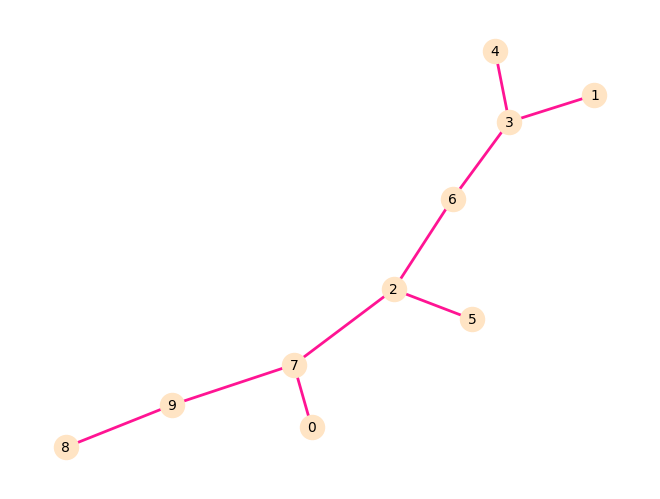

this is A_dict: 
{'3_4': [['c', 'c'], ['c', 'c'], ['a', 'c'], ['t', 't'], ['a', 'c'], ['g', 'g'], ['a', 'c'], ['c', 'c'], ['g', 'a']], '3_6': [['c', 'g'], ['c', 't'], ['a', 'a'], ['t', 't'], ['a', '-'], ['g', 'g'], ['a', 'g'], ['c', '-'], ['g', 'g']], '1_3': [['-', 'g'], ['c', 'c'], ['c', 'c'], ['a', 'g'], ['t', 'c'], ['a', 'a'], ['g', 't'], ['a', 'g'], ['c', 'c'], ['g', '-']], '2_6': [['g', 'a'], ['-', 't'], ['t', 't'], ['a', 'a'], ['t', 't'], ['g', '-'], ['g', 'a'], ['g', 'a']], '2_7': [['-', 'c'], ['a', 'a'], ['t', 't'], ['t', 'c'], ['a', '-'], ['t', 't'], ['a', 'g'], ['a', 'g']], '2_5': [['a', 'a'], ['t', 't'], ['t', 't'], ['a', 'c'], ['t', 't'], ['-', 'c'], ['a', 't'], ['a', 't']], '7_9': [['c', 't'], ['a', '-'], ['t', 'c'], ['c', 'c'], ['t', 't'], ['g', '-'], ['g', 'g']], '0_7': [['-', 'a'], ['-', 'g'], ['c', 'g'], ['a', 'a'], ['t', 'c'], ['c', 'c'], ['t', 't'], ['g', 'a'], ['g', 'g']], '8_9': [['t', '-'], ['c', 'c'], ['c', 'g'], ['t', 't'], ['g', 'g']]}
Total cost of MSA:1447


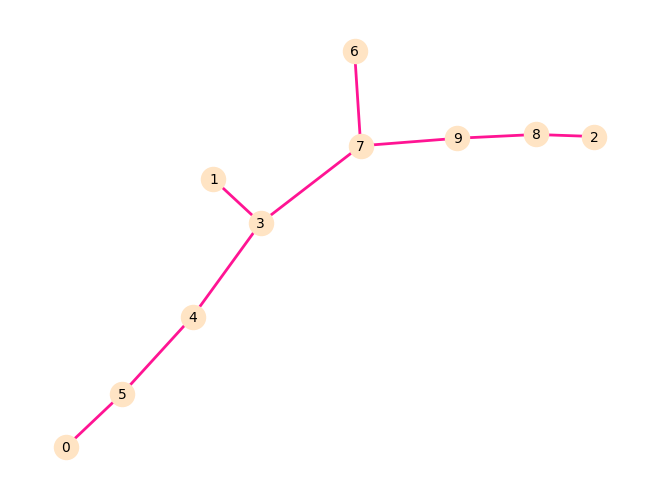

this is A_dict: 
{'2_8': [['a', 'a'], ['-', 't'], ['t', 't'], ['a', 'g'], ['g', 'g'], ['g', 'g'], ['t', 'c'], ['t', 't'], ['g', '-'], ['g', '-']], '8_9': [['a', 'a'], ['t', 'a'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['g', 'g'], ['c', '-'], ['t', '-']], '7_9': [['a', 'a'], ['a', 'a'], ['t', 'c'], ['g', '-'], ['g', 'g'], ['g', 't']], '3_7': [['a', 'a'], ['-', 'g'], ['a', 'g'], ['c', 'c'], ['g', 'g'], ['t', 'c']], '6_7': [['a', 'g'], ['a', 'g'], ['c', 't'], ['g', '-'], ['t', 't']], '3_4': [['a', 'g'], ['g', 'a'], ['g', 'g'], ['c', '-'], ['g', 'a'], ['c', 'c']], '1_3': [['a', 'a'], ['-', 't'], ['-', 'c'], ['g', 'a'], ['g', 'c'], ['c', 'c'], ['g', 'g'], ['c', 'c']], '4_5': [['g', 'g'], ['a', '-'], ['g', 't'], ['a', 'a'], ['c', 'c']], '0_5': [['g', 'c'], ['t', 't'], ['a', 'g'], ['-', 't'], ['c', 'c']]}
Total cost of MSA:1176


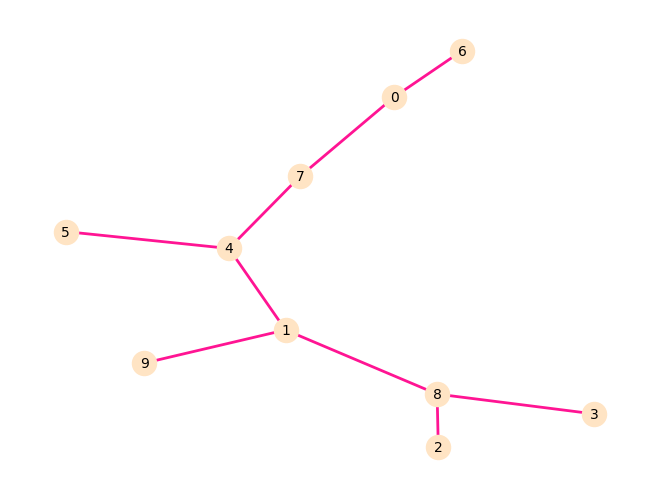

this is A_dict: 
{'0_7': [['t', 't'], ['g', 'g'], ['t', 't'], ['t', 't'], ['g', 'a'], ['-', 'c']], '0_6': [['t', 'c'], ['-', 'g'], ['g', 'g'], ['t', 'g'], ['t', 't'], ['g', 'a']], '4_7': [['t', '-'], ['g', 'g'], ['t', '-'], ['t', 'c'], ['a', 'a'], ['c', 'c']], '1_4': [['g', 'c'], ['c', 't'], ['a', 'a'], ['c', 'a']], '4_5': [['g', 'a'], ['-', 'c'], ['c', 'c'], ['a', 't'], ['c', 'c']], '1_8': [['c', 'c'], ['t', 'c'], ['a', 'a'], ['-', 'c'], ['a', 'a'], ['-', 'g']], '1_9': [['c', 'c'], ['-', 't'], ['t', 't'], ['a', 'g'], ['a', 'a'], ['-', 't']], '3_8': [['c', 'a'], ['c', 'c'], ['a', 'a'], ['c', 't'], ['-', 'g'], ['a', 'a'], ['g', 'a']], '2_8': [['-', 'g'], ['c', 't'], ['c', 'c'], ['-', 'g'], ['a', 'g'], ['c', 'c'], ['a', 'a'], ['g', 'a']]}
Total cost of MSA:1101


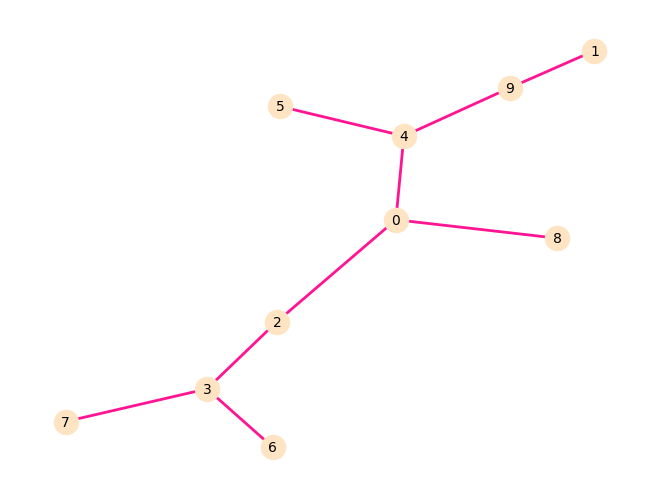

this is A_dict: 
{'1_9': [['g', 'a'], ['a', 'c'], ['a', 't'], ['g', 'g'], ['g', 'g'], ['g', 'a'], ['g', 'g'], ['a', 't']], '4_9': [['a', 't'], ['c', 'c'], ['t', 'c'], ['g', '-'], ['g', '-'], ['a', 'a'], ['g', 'g'], ['t', 't']], '0_4': [['t', 't'], ['c', '-'], ['c', '-'], ['a', 'a'], ['g', 'g'], ['t', 't']], '4_5': [['t', 't'], ['c', 't'], ['c', 'c'], ['-', 'a'], ['a', 'a'], ['-', 'c'], ['g', 'a'], ['t', 'c']], '0_2': [['t', 't'], ['a', 't'], ['g', 'g'], ['t', 't']], '0_8': [['-', 'c'], ['t', 't'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['-', 'g']], '2_3': [['-', 'a'], ['t', 'g'], ['t', 't'], ['g', 'g'], ['t', 'c']], '3_6': [['a', 'g'], ['g', 'a'], ['t', 't'], ['g', 'c'], ['c', 'c']], '3_7': [['a', 'a'], ['g', 'g'], ['-', 'a'], ['t', 't'], ['g', 'a'], ['c', '-']]}
Total cost of MSA:1171


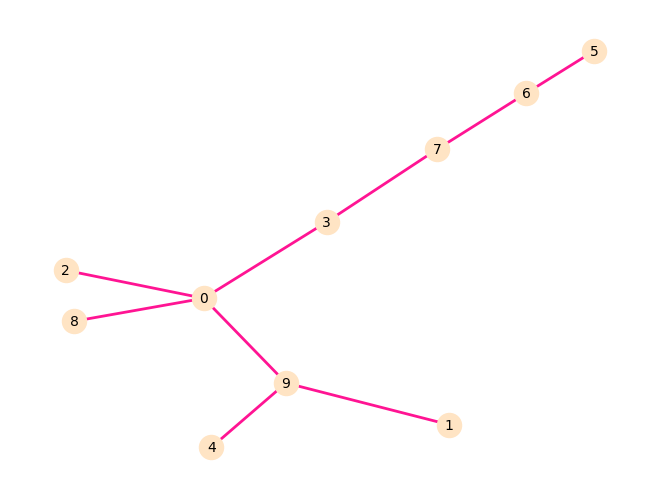

this is A_dict: 
{'1_9': [['g', 'c'], ['a', 'a'], ['a', 'a'], ['t', '-'], ['t', 't']], '4_9': [['c', 't'], ['a', 'a'], ['-', 't'], ['a', 'a'], ['t', 'c']], '0_9': [['-', 'a'], ['c', 'c'], ['-', 'a'], ['a', 'a'], ['a', 'a'], ['t', 't']], '0_3': [['a', 'g'], ['c', 'c'], ['a', 'g'], ['a', 'a'], ['a', 'g'], ['t', '-']], '0_2': [['a', 'a'], ['c', 't'], ['a', 'g'], ['-', 'c'], ['a', 'a'], ['-', 'c'], ['a', 'c'], ['t', 't']], '0_8': [['a', 'a'], ['c', 't'], ['a', 'a'], ['-', 't'], ['-', 'g'], ['a', 'g'], ['a', 'g'], ['t', 't'], ['-', 'a']], '3_7': [['g', 't'], ['c', 'c'], ['g', 'g'], ['a', 'a'], ['g', '-']], '6_7': [['t', 'c'], ['-', 'a'], ['-', 'g'], ['c', 'c'], ['g', 'g'], ['a', 'g']], '5_6': [['c', 't'], ['-', 'a'], ['a', 'a'], ['g', 'g'], ['c', 'c'], ['-', 'g'], ['-', 'a'], ['g', 'g'], ['g', 'g']]}
Total cost of MSA:1298


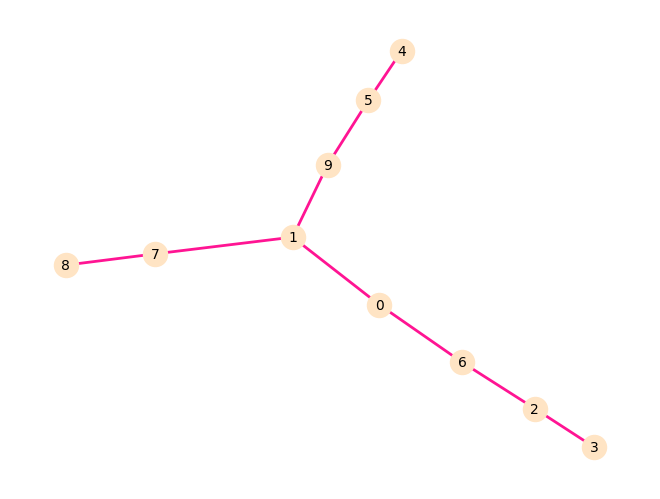

this is A_dict: 
{'1_7': [['c', 't'], ['t', 'g'], ['t', 'c'], ['g', 'g']], '0_1': [['c', '-'], ['t', 't'], ['t', 't'], ['g', 'g'], ['-', 'c']], '1_9': [['c', 'c'], ['-', 'g'], ['-', 'a'], ['t', 'c'], ['t', 't'], ['g', 'g']], '7_8': [['-', 'g'], ['t', 't'], ['-', 'a'], ['g', 'g'], ['-', 't'], ['c', 'c'], ['g', 'g']], '0_6': [['t', 'c'], ['t', 'c'], ['g', 'a'], ['-', 't'], ['c', 'c']], '5_9': [['c', 't'], ['g', 'g'], ['-', 'a'], ['a', 'a'], ['c', 'c'], ['t', 't'], ['g', 'c']], '2_6': [['-', 'a'], ['c', 't'], ['c', 't'], ['a', 'a'], ['t', 't'], ['-', 'a'], ['c', 'c']], '4_5': [['t', 'a'], ['g', 'a'], ['a', 'g'], ['a', 'a'], ['c', 'c'], ['t', '-'], ['c', 'c']], '2_3': [['-', 't'], ['a', 'a'], ['-', 'g'], ['t', 't'], ['t', 't'], ['a', 'a'], ['t', 't'], ['a', '-'], ['c', 'c']]}
Total cost of MSA:1256


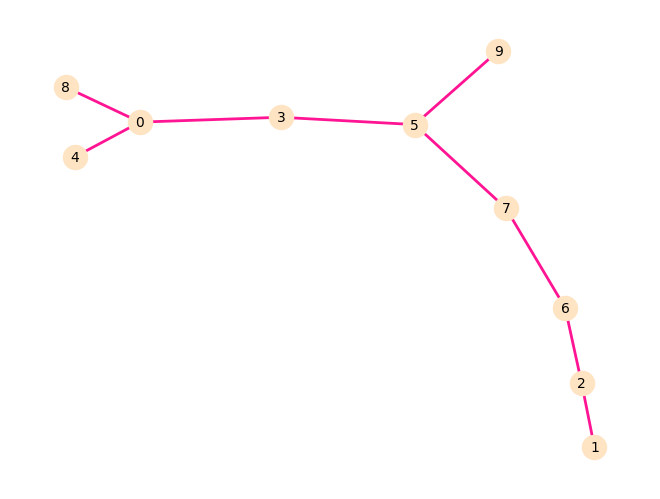

this is A_dict: 
{'5_9': [['g', 'g'], ['-', 'c'], ['a', 'a'], ['g', 'g'], ['c', 't']], '5_7': [['g', 'a'], ['a', 'g'], ['g', 'g'], ['c', 'g']], '3_5': [['g', 't'], ['a', 't'], ['g', 'g'], ['c', 'c'], ['-', 'a']], '6_7': [['a', 'a'], ['g', 'a'], ['-', 'c'], ['g', 'g'], ['g', 'g']], '0_3': [['t', 't'], ['t', 't'], ['g', 'a'], ['c', 't'], ['a', 'a'], ['-', 'c'], ['-', 't']], '2_6': [['-', 'g'], ['-', 't'], ['a', 'g'], ['a', 'a'], ['c', 'c'], ['g', 'g'], ['g', 'g']], '0_8': [['t', 't'], ['t', 't'], ['a', 'a'], ['t', 't'], ['a', 'a'], ['-', 'g'], ['-', 'g'], ['c', 'a'], ['t', 'g']], '0_4': [['-', 'a'], ['t', 't'], ['t', 'c'], ['a', 'c'], ['t', 't'], ['-', 'g'], ['a', 'a'], ['c', 'a'], ['t', 'c']], '1_2': [['g', 'c'], ['t', 'c'], ['g', 'c'], ['a', 'a'], ['c', 'c'], ['g', 'g'], ['g', 'g']]}
Total cost of MSA:1326


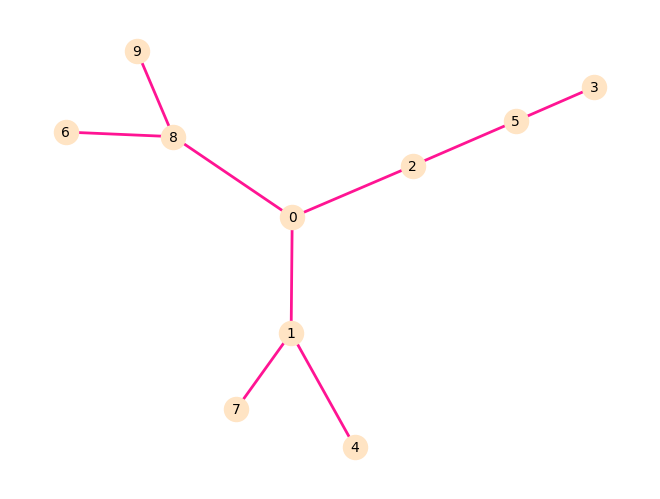

this is A_dict: 
{'2_5': [['t', 't'], ['a', 'g'], ['a', 'a'], ['c', '-'], ['c', 't'], ['c', 't']], '3_5': [['t', 'a'], ['a', 'g'], ['-', 'c'], ['a', 'a'], ['c', 'c'], ['c', 'c'], ['c', 't']], '0_2': [['t', 't'], ['g', 'c'], ['a', 'a'], ['t', 't'], ['t', 'g']], '0_8': [['t', '-'], ['c', 'c'], ['a', 'a'], ['t', 'c'], ['g', 'a']], '0_1': [['t', 'a'], ['c', 'c'], ['a', 't'], ['t', 't'], ['g', 'a']], '6_8': [['c', 't'], ['a', 'g'], ['c', 'c'], ['a', 'a'], ['-', 'c']], '8_9': [['c', 'g'], ['a', 'a'], ['c', 'c'], ['a', 'a'], ['-', 'g']], '1_4': [['a', 'a'], ['c', '-'], ['t', 't'], ['t', 't'], ['a', 'a']], '1_7': [['a', 'a'], ['c', 'c'], ['-', 'a'], ['t', 't'], ['t', 't'], ['a', 'a'], ['-', 'g']]}
Total cost of MSA:892


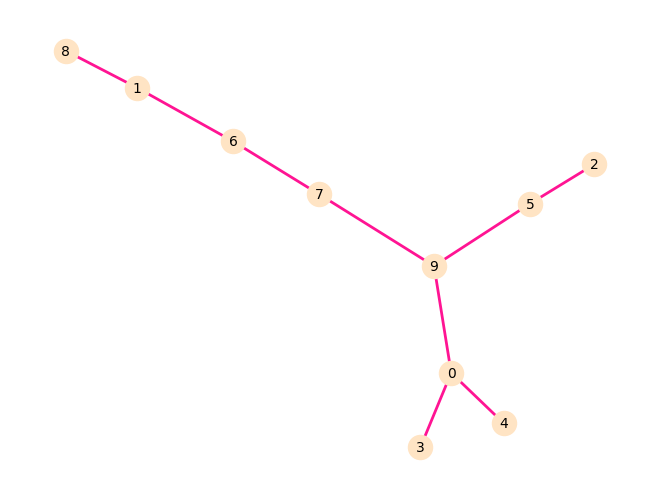

this is A_dict: 
{'0_4': [['a', '-'], ['a', '-'], ['t', 't'], ['a', 'c'], ['c', 'c'], ['c', 'c'], ['c', 'a'], ['c', 'c'], ['c', 't']], '0_9': [['t', '-'], ['c', 'g'], ['c', 'c'], ['c', 't'], ['a', 'a'], ['c', 'c'], ['t', '-']], '0_3': [['t', 'c'], ['c', 'c'], ['c', 't'], ['c', 't'], ['a', 'c'], ['c', 'c'], ['t', 'c'], ['-', 'a']], '7_9': [['g', 'g'], ['c', 'g'], ['t', 't'], ['a', 'g'], ['c', 't']], '5_9': [['g', 'a'], ['c', 't'], ['t', 'c'], ['a', 'a'], ['-', 'g'], ['c', 'c']], '6_7': [['g', 'c'], ['g', 'g'], ['t', 'a'], ['g', 'g'], ['t', 'g']], '2_5': [['a', 'g'], ['t', 'c'], ['c', 'c'], ['-', 'a'], ['-', 'a'], ['-', 'a'], ['a', 'a'], ['g', 'g'], ['c', 'c']], '1_6': [['c', 't'], ['g', '-'], ['a', 'a'], ['g', 'a'], ['g', 'a']], '1_8': [['t', 'c'], ['a', 'a'], ['-', 't'], ['-', 't'], ['a', 'g'], ['a', 'a']]}
Total cost of MSA:1309


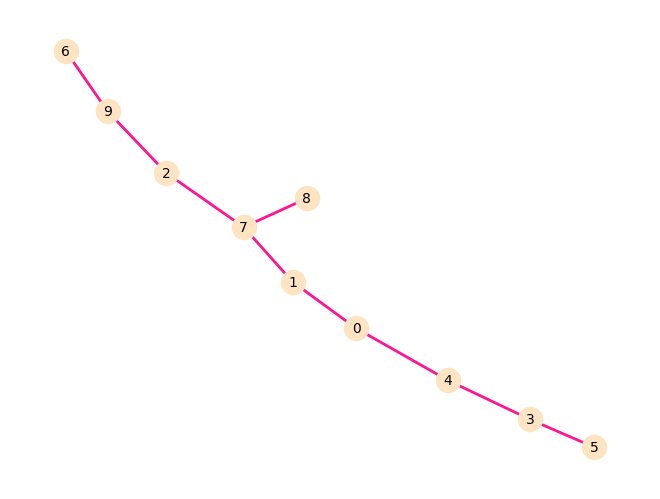

this is A_dict: 
{'0_4': [['a', 'a'], ['g', 'c'], ['a', 'g'], ['g', 'g'], ['g', 'g'], ['t', 't'], ['g', '-'], ['c', 'c'], ['t', 't']], '3_4': [['a', 'g'], ['g', 'g'], ['a', 't'], ['g', 'a'], ['g', 'a'], ['t', 't'], ['g', 'g'], ['c', 'g'], ['t', 't']], '0_1': [['a', '-'], ['c', 't'], ['g', 'g'], ['g', 'c'], ['g', 'g'], ['t', 'c'], ['c', 't'], ['-', 'a'], ['t', 't']], '3_5': [['g', 'g'], ['g', 't'], ['t', 't'], ['a', 't'], ['a', 'g'], ['t', '-'], ['g', 'a'], ['g', 'a'], ['t', 't']], '1_7': [['t', '-'], ['g', '-'], ['c', 'c'], ['g', '-'], ['c', 'c'], ['t', 't'], ['a', 'a'], ['t', 't'], ['-', 'g']], '2_7': [['c', '-'], ['c', 'c'], ['t', '-'], ['a', 'a'], ['t', 't'], ['g', 'c']], '7_8': [['-', 'c'], ['c', 'c'], ['c', 'c'], ['t', 't'], ['-', 'a'], ['a', 'a'], ['-', 't'], ['t', 't'], ['g', 'a']], '2_9': [['c', 'a'], ['a', 'a'], ['t', 'g'], ['c', 'c']], '6_9': [['a', 'a'], ['a', 'a'], ['-', 'c'], ['g', 'a'], ['c', 'c']]}
Total cost of MSA:1682


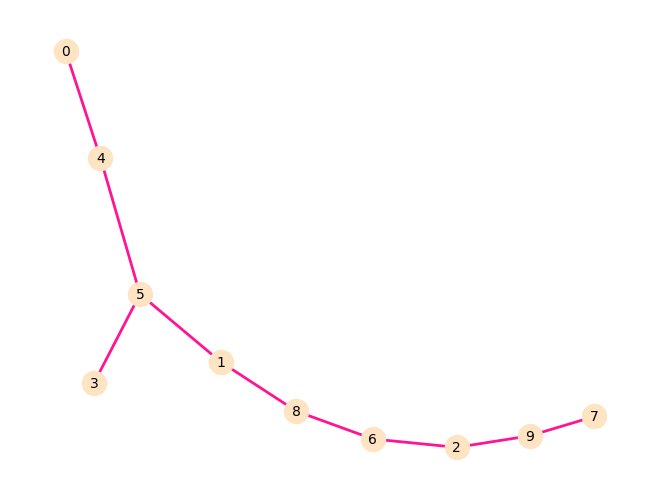

this is A_dict: 
{'2_6': [['-', 'a'], ['t', 't'], ['t', 't'], ['a', 'c'], ['t', 'c'], ['a', 'a']], '2_9': [['t', 't'], ['t', 'a'], ['a', 'g'], ['t', 'c'], ['a', '-']], '6_8': [['a', 'a'], ['t', 'c'], ['t', 'a'], ['c', 't'], ['c', 't'], ['a', 't']], '7_9': [['t', 'g'], ['a', 'g'], ['g', 'g'], ['-', 't'], ['c', 'c']], '1_8': [['a', '-'], ['c', 'c'], ['a', 'g'], ['t', 't'], ['t', 't'], ['-', 'a'], ['-', 'a'], ['t', 't']], '1_5': [['c', 't'], ['-', 'a'], ['g', 'g'], ['t', 't'], ['t', 't'], ['a', '-'], ['a', 'g'], ['t', 't']], '3_5': [['t', 'a'], ['a', 'a'], ['g', 'g'], ['-', 'a'], ['t', 'c'], ['t', 'c'], ['g', 'c'], ['t', 't']], '4_5': [['-', 'g'], ['t', 't'], ['-', 'c'], ['a', 'a'], ['g', 'g'], ['t', 'g'], ['t', 'a'], ['g', 'g'], ['t', 't']], '0_4': [['g', 'g'], ['t', '-'], ['c', 'g'], ['a', 'a'], ['g', 'a'], ['g', 'a'], ['a', 'g'], ['g', 'g'], ['t', 'a']]}
Total cost of MSA:1284


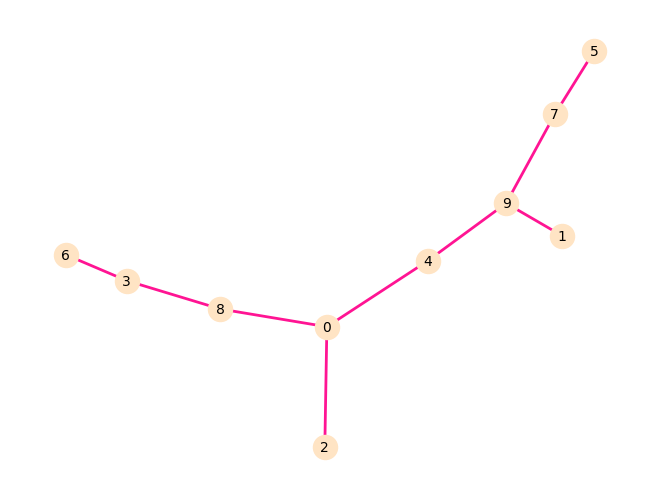

this is A_dict: 
{'1_9': [['-', 't'], ['c', 'c'], ['g', 'a'], ['a', 'g'], ['t', 'c'], ['a', '-'], ['g', 'g'], ['g', 'a'], ['g', 'c'], ['g', 'g']], '7_9': [['t', 't'], ['c', 't'], ['a', 'a'], ['g', '-'], ['c', 'c'], ['g', 'c'], ['a', 't'], ['c', 'c'], ['g', 'g']], '4_9': [['t', 't'], ['c', '-'], ['a', 'a'], ['g', 'g'], ['c', '-'], ['g', 'a'], ['a', 'g'], ['c', 'c'], ['g', 'c']], '5_7': [['t', 'g'], ['t', 'c'], ['a', 'a'], ['c', 'c'], ['c', 't'], ['t', 't'], ['-', 'g'], ['c', 't'], ['g', 't']], '0_4': [['t', 't'], ['a', '-'], ['g', 'g'], ['a', '-'], ['g', 'g'], ['c', 't'], ['c', 'c']], '0_2': [['t', 'c'], ['g', '-'], ['g', 'g'], ['t', 't'], ['c', 'c']], '0_8': [['t', 'g'], ['g', 'g'], ['g', 'c'], ['t', 't'], ['c', 't']], '3_8': [['g', 'g'], ['g', 'c'], ['c', 'c'], ['t', 'a'], ['t', 'c']], '3_6': [['g', 'g'], ['c', 'c'], ['-', 't'], ['-', 'g'], ['c', 'c'], ['a', 'a'], ['c', 'c'], ['-', 'a'], ['-', 'a']]}
Total cost of MSA:1493


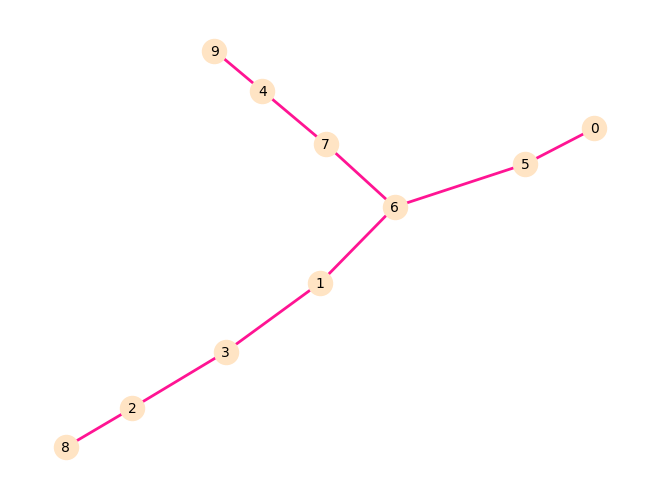

this is A_dict: 
{'2_8': [['t', '-'], ['t', 't'], ['a', '-'], ['c', 'c'], ['c', 'c'], ['c', 'c'], ['t', 'a']], '2_3': [['t', 't'], ['c', 'c'], ['c', 'g'], ['c', 'g'], ['a', 'a']], '1_3': [['-', 'g'], ['t', 't'], ['c', 'c'], ['g', '-'], ['g', 'g'], ['a', 'a']], '1_6': [['-', 't'], ['g', 'g'], ['t', 't'], ['c', 'c'], ['g', 'a'], ['a', 'c']], '5_6': [['-', 'c'], ['t', 't'], ['g', 'g'], ['t', 't'], ['c', '-'], ['a', 'a'], ['c', 'c']], '6_7': [['t', 't'], ['g', 'a'], ['t', 'g'], ['c', 'c'], ['a', '-'], ['c', 'c']], '0_5': [['c', 't'], ['t', 't'], ['g', 't'], ['t', 't'], ['-', 'g'], ['a', 'g'], ['-', 't'], ['c', 'c']], '4_7': [['t', 't'], ['-', 'g'], ['a', 'a'], ['g', 'g'], ['c', 't'], ['-', 'g'], ['c', 't']], '4_9': [['-', 'a'], ['t', 'c'], ['g', 'g'], ['a', 'a'], ['g', 'g'], ['t', 'a'], ['g', 'a'], ['t', 'g']]}
Total cost of MSA:1312


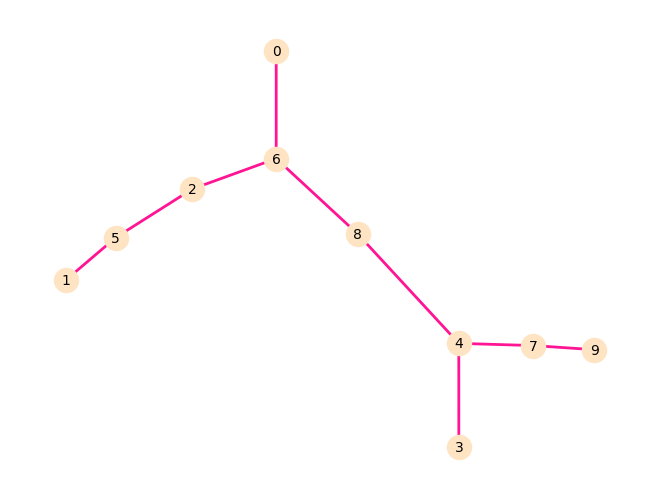

this is A_dict: 
{'0_6': [['-', 't'], ['a', 'a'], ['-', 'c'], ['a', 'a'], ['a', 'a'], ['a', 't']], '6_8': [['t', 'c'], ['a', 'g'], ['c', 't'], ['a', 'c'], ['a', 'a'], ['t', 'c']], '2_6': [['t', 'c'], ['a', 'g'], ['c', 'g'], ['a', 'a'], ['a', 'c'], ['t', 't']], '4_8': [['c', 't'], ['g', 't'], ['t', 't'], ['c', 'c'], ['a', 'a'], ['c', 'c']], '2_5': [['c', 'a'], ['g', 'g'], ['-', 'c'], ['g', 'g'], ['a', 'a'], ['c', 'c'], ['t', 'c']], '3_4': [['t', 't'], ['-', 'a'], ['t', 't'], ['-', 'a'], ['t', 't'], ['c', 'c'], ['a', 'a'], ['c', 'a']], '4_7': [['t', 't'], ['t', 'c'], ['t', 't'], ['-', 'a'], ['-', 'a'], ['c', 'c'], ['-', 't'], ['a', 'a'], ['c', 'c']], '1_5': [['a', 'g'], ['g', 't'], ['c', 'c'], ['g', 'g'], ['a', 'g'], ['c', 'g'], ['c', 'g']], '7_9': [['t', 'a'], ['c', 't'], ['t', 'g'], ['a', 'a'], ['a', 'a'], ['c', 'c'], ['t', 't'], ['a', 'a'], ['c', 'g']]}
Total cost of MSA:1224


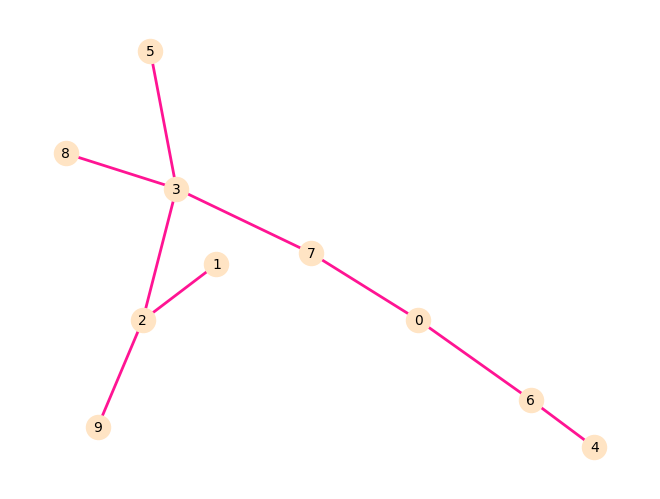

this is A_dict: 
{'4_6': [['a', 't'], ['g', 'g'], ['a', 'g'], ['c', '-'], ['g', 'a'], ['a', 'a'], ['t', 'c'], ['c', 'c'], ['a', 'c']], '0_6': [['t', 't'], ['g', 'a'], ['g', 'g'], ['a', '-'], ['a', 'g'], ['c', 'c'], ['c', 'c'], ['c', 'c']], '0_7': [['t', 'c'], ['a', 'c'], ['g', 'g'], ['g', 'a'], ['c', 'c'], ['c', 'a'], ['c', 'c']], '3_7': [['c', 't'], ['c', 'c'], ['g', '-'], ['a', 'a'], ['c', 'c'], ['a', 'a'], ['c', '-']], '3_8': [['t', 't'], ['c', 'c'], ['a', 'a'], ['c', 'c'], ['-', 't'], ['-', 'g'], ['a', 'a']], '3_5': [['t', 't'], ['c', '-'], ['a', 'g'], ['c', 'c'], ['a', 't']], '2_3': [['-', 'g'], ['t', 'c'], ['c', 'c'], ['a', 'g'], ['c', 'c'], ['a', '-']], '1_2': [['g', 'g'], ['c', 'c'], ['-', 'g'], ['c', 'g'], ['g', 'g'], ['c', 't']], '2_9': [['g', 'a'], ['c', 'c'], ['-', 't'], ['c', 't'], ['g', 't'], ['c', 't']]}
Total cost of MSA:1214


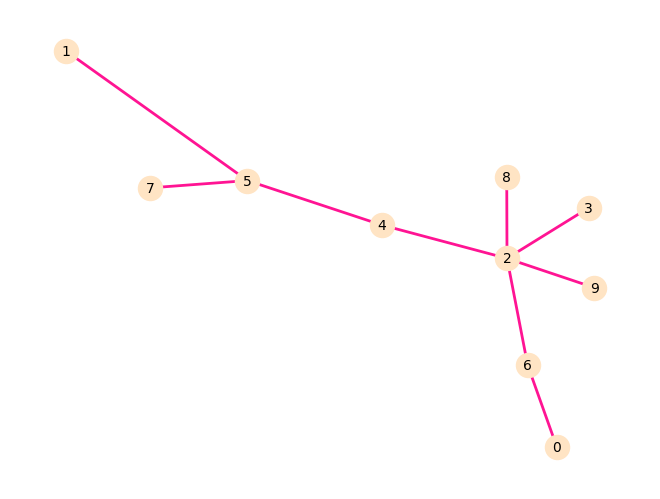

this is A_dict: 
{'1_5': [['c', 'c'], ['c', 'c'], ['t', 'c'], ['t', 't']], '5_7': [['-', 'a'], ['c', 't'], ['c', 't'], ['c', 'c'], ['t', 'c']], '4_5': [['c', 'g'], ['c', 't'], ['c', 'c'], ['t', 'g']], '2_4': [['g', 'g'], ['-', 'a'], ['t', 'c'], ['-', 'a'], ['-', 'a'], ['c', 'c'], ['g', 'a']], '2_3': [['g', 'a'], ['a', 'g'], ['c', 't'], ['a', 'c'], ['a', 'g'], ['c', 'c'], ['a', 'a'], ['-', 't']], '2_8': [['-', 'a'], ['g', 'g'], ['a', 'g'], ['c', 't'], ['a', 'g'], ['a', 'g'], ['-', 't'], ['c', 'c'], ['a', 'a']], '2_6': [['-', 'c'], ['g', 't'], ['a', 'a'], ['c', 'c'], ['a', 'c'], ['a', 'g'], ['c', 'c'], ['a', 'g']], '2_9': [['-', 'a'], ['g', 'a'], ['a', 'a'], ['c', 'g'], ['a', 'g'], ['a', 'a'], ['c', 'c'], ['a', '-']], '0_6': [['c', 't'], ['t', 't'], ['-', 'c'], ['a', 'g'], ['c', 't'], ['c', 't'], ['g', '-'], ['c', 'c'], ['g', 'g']]}
Total cost of MSA:1149


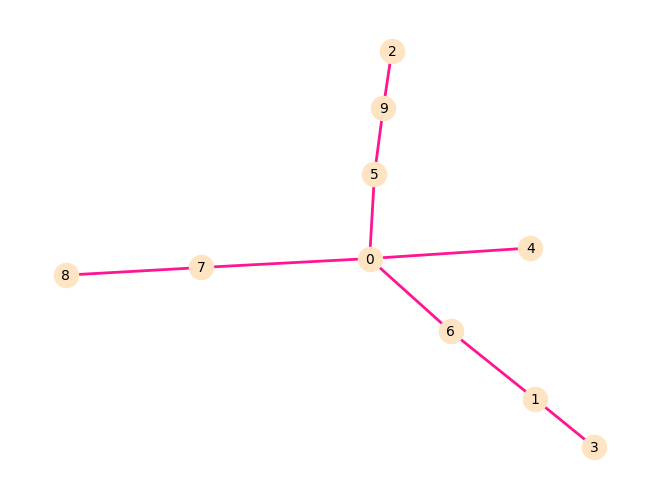

this is A_dict: 
{'7_8': [['g', 't'], ['a', 'a'], ['g', '-'], ['g', 'c'], ['c', 'c'], ['c', 't'], ['g', 'c'], ['t', 't'], ['c', 'c']], '0_7': [['t', 't'], ['a', 'a'], ['c', '-'], ['c', '-'], ['t', 't'], ['c', 'g'], ['t', 'g'], ['c', 't']], '0_4': [['t', 'c'], ['a', 'a'], ['t', '-'], ['g', 'g'], ['g', 'g'], ['t', 't'], ['-', 'a']], '0_5': [['t', 'c'], ['a', 'a'], ['t', 't'], ['g', '-'], ['g', 'g'], ['t', '-']], '0_6': [['t', 'c'], ['a', 't'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['-', 'c'], ['t', 'c']], '5_9': [['-', 'c'], ['-', 't'], ['c', 'c'], ['a', 'a'], ['t', 'a'], ['g', 'g']], '1_6': [['c', 'c'], ['t', 't'], ['t', 't'], ['g', 'g'], ['-', 'a'], ['g', 'a'], ['c', 'c'], ['-', 'a'], ['c', 'c']], '2_9': [['-', 'a'], ['c', 't'], ['t', 't'], ['c', 't'], ['a', 'g'], ['a', 'a'], ['g', 'a']], '1_3': [['c', 'c'], ['t', 't'], ['t', 'c'], ['-', 'g'], ['g', 'g'], ['a', 'g'], ['a', 'g'], ['c', 'c'], ['a', 'a'], ['c', '-']]}
Total cost of MSA:1482


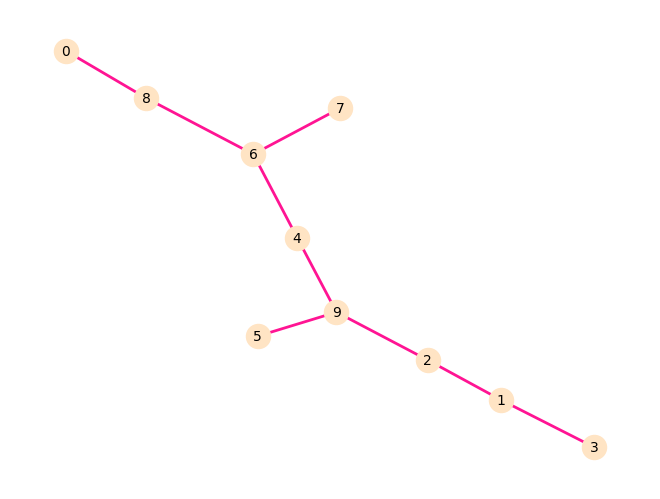

this is A_dict: 
{'1_3': [['c', 'c'], ['t', 'c'], ['t', 't'], ['c', 'c'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['t', 'a'], ['c', 't']], '1_2': [['c', 't'], ['t', 't'], ['t', 'a'], ['c', 't'], ['t', 't'], ['g', '-'], ['g', 't'], ['t', 't'], ['c', 'g']], '2_9': [['t', 't'], ['t', 'c'], ['a', 'a'], ['t', '-'], ['t', 'a'], ['t', 'g'], ['t', 'c'], ['g', 'g']], '4_9': [['t', '-'], ['c', 'c'], ['a', 'g'], ['a', 'g'], ['g', 't'], ['c', 'c'], ['g', 'g']], '5_9': [['-', 'g'], ['t', 'g'], ['c', 'c'], ['a', 'a'], ['a', 'a'], ['-', 'c'], ['g', 'g'], ['c', 'g'], ['g', 'a']], '4_6': [['c', 'c'], ['g', '-'], ['g', 'g'], ['t', 't'], ['c', 'c'], ['g', '-']], '6_7': [['c', 'c'], ['g', 'g'], ['t', 'a'], ['c', 'g']], '6_8': [['-', 'a'], ['c', 'c'], ['g', 'g'], ['t', 't'], ['c', '-']], '0_8': [['a', 'g'], ['c', 'a'], ['g', 'a'], ['t', 'c']]}
Total cost of MSA:1334


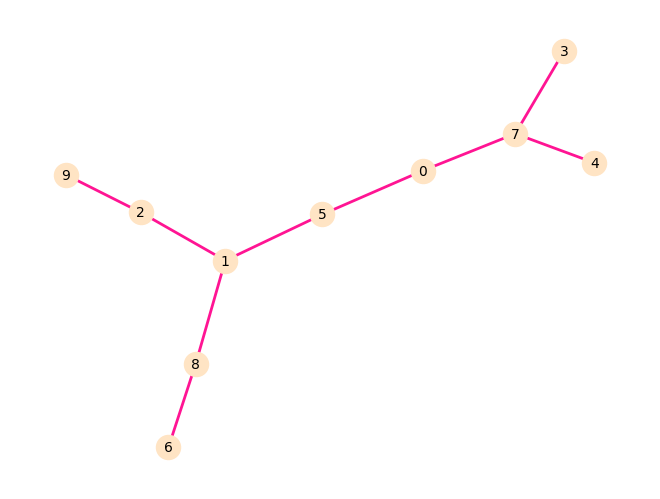

this is A_dict: 
{'0_5': [['a', 'a'], ['a', 'a'], ['a', 'g'], ['a', 't'], ['c', 'c'], ['a', 'g'], ['g', 'a'], ['-', 't']], '0_7': [['a', '-'], ['a', '-'], ['a', '-'], ['a', 'a'], ['c', 't'], ['a', 'a'], ['g', 'a']], '1_5': [['a', '-'], ['a', 'g'], ['g', 'g'], ['t', 'c'], ['c', 't'], ['g', 'g'], ['-', 'c'], ['a', 'a'], ['t', 'c']], '3_7': [['a', 't'], ['t', 'g'], ['a', 'g'], ['a', 'g']], '4_7': [['a', 'a'], ['t', 'a'], ['a', 'c'], ['a', 't']], '1_2': [['g', 't'], ['g', 'c'], ['c', 'c'], ['t', 't'], ['g', 'a'], ['c', 'c'], ['a', 't'], ['c', 'c']], '1_8': [['g', 'c'], ['g', 'g'], ['c', 'c'], ['t', 't'], ['-', 'c'], ['g', 'g'], ['c', 't'], ['a', 'c'], ['c', 't']], '2_9': [['t', 'c'], ['c', 'c'], ['-', 'g'], ['c', 't'], ['t', 'c'], ['a', 't'], ['c', 'c'], ['t', 't'], ['c', 'c']], '6_8': [['c', 'c'], ['g', 'g'], ['c', '-'], ['t', 't'], ['c', 'a'], ['g', 'g'], ['t', 'a'], ['c', 't'], ['t', 'c']]}
Total cost of MSA:1357


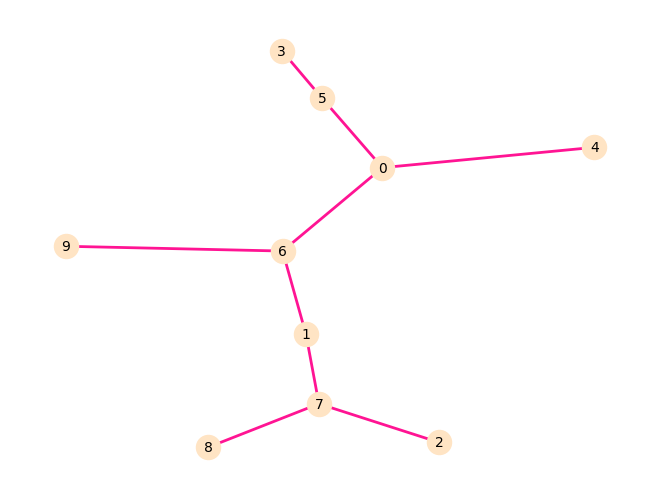

this is A_dict: 
{'1_6': [['t', 't'], ['g', 'a'], ['-', 'c'], ['g', 't'], ['t', 't']], '1_7': [['-', 'g'], ['t', 'g'], ['g', 'g'], ['g', 'g'], ['-', 'c'], ['t', 'c']], '0_6': [['t', 'c'], ['a', 'c'], ['c', 'c'], ['t', 't'], ['-', 'g'], ['t', 't']], '6_9': [['t', 't'], ['a', 'a'], ['c', 't'], ['t', 't'], ['-', 'a'], ['t', 'g']], '7_8': [['-', 't'], ['g', 'g'], ['g', 'g'], ['g', 'g'], ['-', 'c'], ['g', 'g'], ['c', 'a'], ['c', 't']], '2_7': [['-', 't'], ['g', 'g'], ['g', 'g'], ['-', 't'], ['-', 'a'], ['g', 'a'], ['g', 'a'], ['c', 'c'], ['c', 'c']], '0_4': [['c', 'c'], ['c', 'c'], ['-', 'a'], ['c', 'c'], ['t', 'g'], ['g', 'g'], ['t', 'c']], '0_5': [['c', 'c'], ['c', 't'], ['c', 't'], ['t', 'c'], ['g', '-'], ['t', 'c']], '3_5': [['-', 'g'], ['c', 'c'], ['t', 't'], ['-', 'c'], ['t', 't'], ['-', 'a'], ['-', 'c'], ['c', 'c'], ['c', 'c']]}
Total cost of MSA:1287


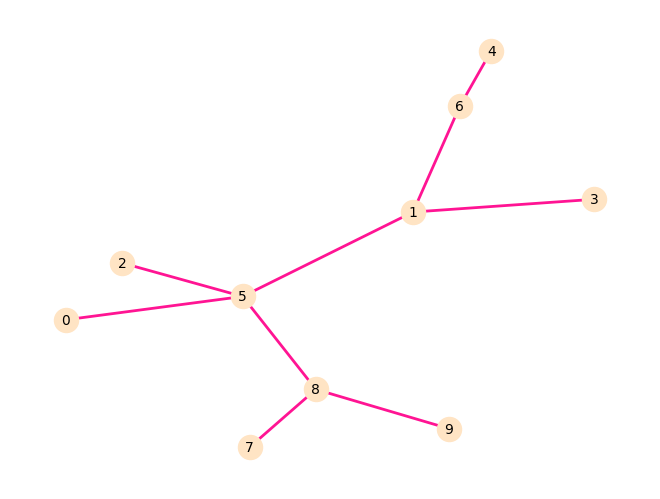

this is A_dict: 
{'1_6': [['a', 'a'], ['a', 'a'], ['a', 'a'], ['a', 't'], ['t', 'c']], '4_6': [['a', 'c'], ['a', 't'], ['a', 'g'], ['a', 'a'], ['t', 'a']], '1_5': [['a', 'g'], ['-', 't'], ['-', 'c'], ['a', 'a'], ['a', 'a'], ['t', 't'], ['c', 'c']], '1_3': [['a', 'c'], ['a', 'a'], ['a', 't'], ['t', 'c'], ['c', 't']], '5_8': [['-', 'c'], ['g', 'a'], ['t', 't'], ['c', 'c'], ['a', 'g'], ['a', 'g'], ['t', 't'], ['c', 't']], '0_5': [['g', 'a'], ['-', 't'], ['t', 't'], ['c', 't'], ['a', 'g'], ['a', 'a'], ['t', 'g'], ['c', 'c']], '2_5': [['g', '-'], ['t', 't'], ['c', 'c'], ['a', 'g'], ['a', 'g'], ['t', 'c'], ['c', 'c'], ['-', 'g'], ['-', 'g']], '7_8': [['c', 'c'], ['a', 't'], ['t', 't'], ['c', 't'], ['g', 't'], ['g', 'g'], ['t', 't'], ['t', 't'], ['-', 'g']], '8_9': [['-', 'a'], ['c', 'c'], ['a', 'a'], ['t', 'c'], ['c', 'c'], ['g', 'g'], ['g', 't'], ['t', 'c'], ['t', 'a']]}
Total cost of MSA:1204


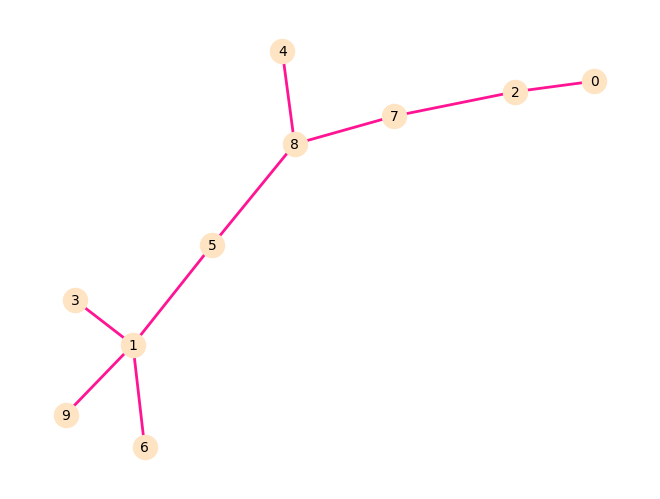

this is A_dict: 
{'1_3': [['-', 't'], ['a', 'a'], ['g', 'g'], ['c', 't'], ['a', 'a'], ['c', '-'], ['t', 't'], ['c', 'c'], ['a', '-'], ['a', '-']], '1_9': [['t', 'c'], ['a', '-'], ['g', '-'], ['t', 'c'], ['a', 'g'], ['t', 't'], ['c', 'c']], '1_5': [['-', 'c'], ['t', 't'], ['a', 'g'], ['g', 'g'], ['t', 't'], ['a', 't'], ['t', 'g'], ['c', 'c']], '1_6': [['t', 't'], ['a', 'g'], ['g', 'g'], ['-', 'a'], ['t', 'g'], ['a', 'g'], ['-', 't'], ['t', 't'], ['c', 'c']], '5_8': [['-', 'g'], ['c', 'c'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['t', '-'], ['t', 't'], ['g', 'g'], ['c', '-']], '7_8': [['g', 'g'], ['c', '-'], ['t', 't'], ['g', '-'], ['g', '-'], ['t', 't'], ['g', 'g']], '4_8': [['-', 'g'], ['g', 'g'], ['c', 't'], ['t', 't'], ['-', 'c'], ['-', 'a'], ['g', 'g'], ['g', 'g'], ['t', 't'], ['g', '-']], '2_7': [['g', 'g'], ['-', 'a'], ['t', 'c'], ['t', 't'], ['g', 'g']], '0_2': [['g', 'a'], ['a', 'a'], ['c', '-'], ['t', 'a'], ['g', 'g']]}
Total cost of MSA:1564


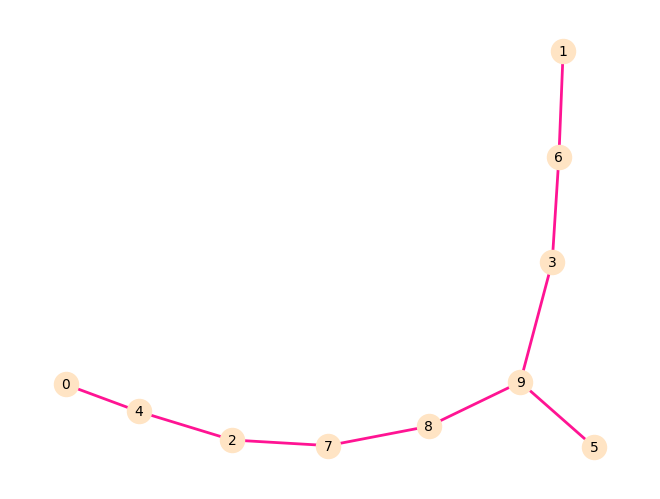

this is A_dict: 
{'0_4': [['t', 'c'], ['g', 'g'], ['t', 't'], ['c', 'c'], ['t', 'a'], ['a', 'a'], ['t', 'c'], ['a', '-'], ['t', 'c']], '2_4': [['c', '-'], ['g', 'g'], ['t', 'c'], ['c', 't'], ['a', 'a'], ['a', 'a'], ['c', 'c'], ['-', 'g'], ['c', 'c']], '2_7': [['-', 'c'], ['g', 'g'], ['c', 'c'], ['t', '-'], ['a', 'g'], ['a', 'c'], ['c', 'c'], ['g', 'g'], ['c', 'c']], '7_8': [['c', 'c'], ['g', 'a'], ['c', 'c'], ['g', '-'], ['c', 't'], ['c', 't'], ['g', 'g'], ['c', 'g']], '8_9': [['c', 't'], ['a', 'a'], ['c', '-'], ['t', '-'], ['t', '-'], ['g', 'g'], ['g', 'g']], '5_9': [['t', 'c'], ['a', 't'], ['g', 'g'], ['g', 't']], '3_9': [['-', 'a'], ['t', 't'], ['a', 'g'], ['g', 'g'], ['g', 'a'], ['-', 't']], '3_6': [['a', 'a'], ['t', 'a'], ['g', 'g'], ['-', 'c'], ['g', 'g'], ['a', 't'], ['t', 'c']], '1_6': [['a', 'g'], ['a', 'a'], ['g', 'a'], ['c', 't'], ['g', 'c'], ['t', 't'], ['c', 'c']]}
Total cost of MSA:1341


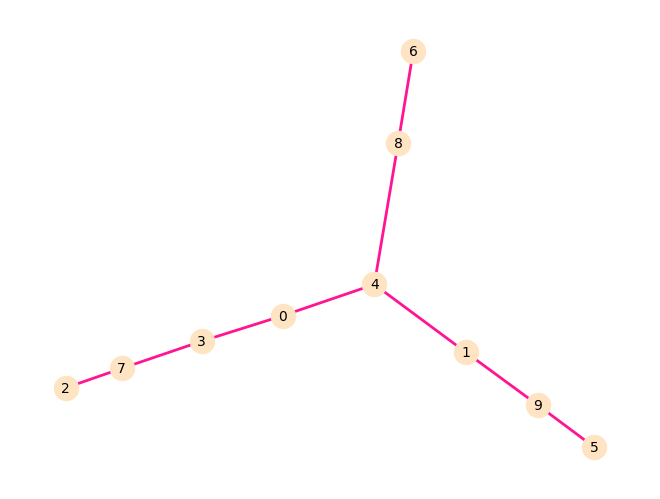

this is A_dict: 
{'0_4': [['c', '-'], ['t', 'a'], ['c', 'c'], ['t', 'c'], ['t', 't'], ['t', 't']], '0_3': [['c', 'c'], ['t', 't'], ['c', '-'], ['t', 'a'], ['t', 'g'], ['t', 't']], '4_8': [['a', 'a'], ['c', 'a'], ['c', 'c'], ['t', 't'], ['t', 'c']], '1_4': [['a', 'g'], ['c', 't'], ['c', 'c'], ['t', '-'], ['t', 't']], '3_7': [['-', 'a'], ['c', 'c'], ['t', 't'], ['a', 'a'], ['-', 'g'], ['g', 'g'], ['t', 'c']], '6_8': [['a', 'c'], ['a', 'a'], ['c', 't'], ['t', 't'], ['c', 'g']], '1_9': [['g', 'a'], ['t', 't'], ['c', 'g'], ['t', 't'], ['-', 'a']], '2_7': [['a', 'a'], ['c', 'c'], ['t', 'a'], ['a', 'a'], ['-', 'c'], ['g', 'g'], ['g', 'a'], ['c', 'a']], '5_9': [['a', 'g'], ['t', 't'], ['g', 'g'], ['-', 'c'], ['t', 'c'], ['a', 'a'], ['-', 't']]}
Total cost of MSA:1224


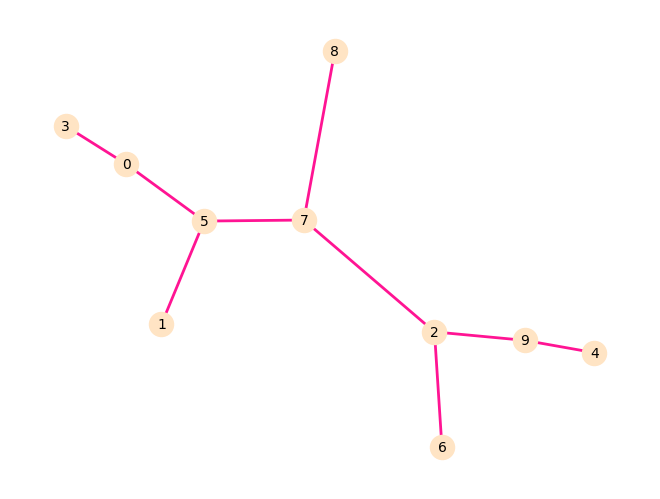

this is A_dict: 
{'1_5': [['a', 'g'], ['a', 'a'], ['a', 'g'], ['t', 't'], ['t', 'a'], ['c', 'c'], ['t', 'a']], '5_7': [['g', 'g'], ['a', 'a'], ['g', '-'], ['t', 't'], ['a', '-'], ['c', '-'], ['a', 'g']], '0_5': [['g', 'g'], ['-', 'c'], ['-', 'c'], ['a', 'g'], ['g', 'g'], ['t', 't'], ['a', '-'], ['c', 't'], ['a', 'a']], '7_8': [['g', 'a'], ['a', 'g'], ['t', 'c'], ['g', 'g']], '2_7': [['g', 'c'], ['a', 'a'], ['t', 'c'], ['g', 'g']], '0_3': [['g', 'g'], ['c', 'c'], ['-', 'g'], ['-', 't'], ['c', 'c'], ['g', 'g'], ['g', 'a'], ['t', 'g'], ['t', 't'], ['a', '-']], '2_6': [['c', 'c'], ['-', 'g'], ['-', 'a'], ['a', 'a'], ['c', 'c'], ['g', 'c']], '2_9': [['-', 'c'], ['-', 't'], ['c', 'c'], ['a', 'a'], ['c', 'c'], ['-', 'g'], ['g', 'g']], '4_9': [['c', 't'], ['t', 't'], ['c', 't'], ['-', 'g'], ['a', 'a'], ['c', 't'], ['g', 'g'], ['-', 'a'], ['g', 'a']]}
Total cost of MSA:1339


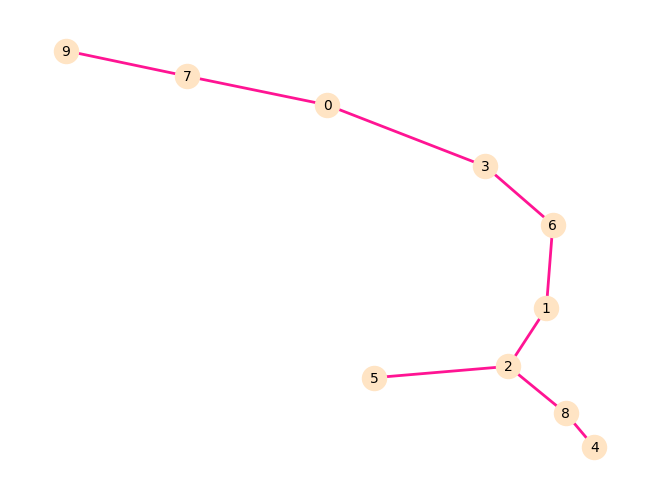

this is A_dict: 
{'0_3': [['t', 'a'], ['g', 'g'], ['g', 'g'], ['t', 't']], '0_7': [['t', 'c'], ['g', 't'], ['g', 'a'], ['t', 'c']], '3_6': [['a', 'g'], ['g', 'a'], ['g', 'g'], ['t', 'a']], '7_9': [['-', 'a'], ['c', 't'], ['t', 't'], ['a', 'a'], ['-', 't'], ['c', 'c']], '1_6': [['g', 'g'], ['a', 'a'], ['g', 'c'], ['a', 'a']], '1_2': [['g', 'a'], ['a', 'a'], ['c', 'c'], ['-', 'g'], ['-', 'g'], ['a', 'a']], '2_5': [['a', 'a'], ['a', 'g'], ['c', 't'], ['g', 'g'], ['-', 'a'], ['-', 'c'], ['g', 'g'], ['a', 'g']], '2_8': [['a', 'a'], ['-', 't'], ['-', 'c'], ['a', 'a'], ['c', 't'], ['g', 'a'], ['g', 'a'], ['a', 'a']], '4_8': [['-', 'g'], ['a', 'a'], ['t', 'g'], ['c', 'c'], ['a', 'a'], ['t', 'c'], ['a', 't'], ['a', 't'], ['a', 'a']]}
Total cost of MSA:1161


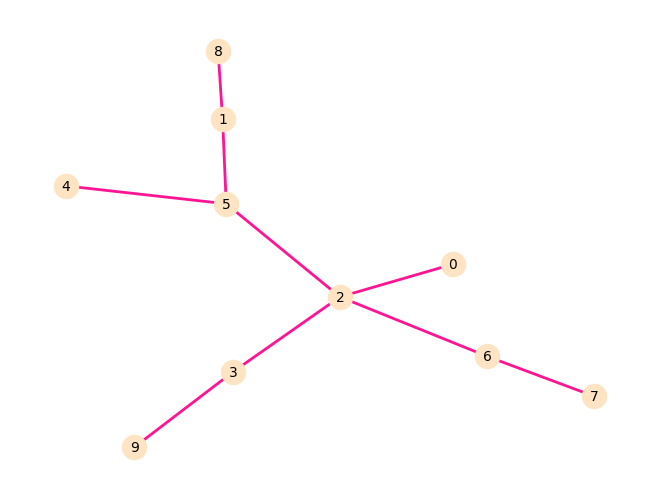

this is A_dict: 
{'1_5': [['a', 'g'], ['t', '-'], ['a', 'a'], ['g', 'a'], ['t', 't'], ['t', 't'], ['t', 'g']], '1_8': [['a', '-'], ['t', 't'], ['a', 'a'], ['g', '-'], ['t', 'c'], ['t', 'c'], ['t', 't']], '4_5': [['g', 'a'], ['a', 'g'], ['a', 'a'], ['t', '-'], ['t', 't'], ['g', 'g']], '2_5': [['g', 'g'], ['a', 'c'], ['a', 'g'], ['t', 't'], ['t', 'g'], ['g', 'g']], '2_3': [['g', 'c'], ['c', 't'], ['g', 'g'], ['t', '-'], ['g', 'g'], ['g', 'g']], '2_6': [['g', 't'], ['c', 'c'], ['g', 'g'], ['-', 'c'], ['t', 't'], ['g', 'g'], ['g', 'a']], '0_2': [['g', 'g'], ['c', 't'], ['g', 'c'], ['t', 'c'], ['g', 'g'], ['g', 'c']], '3_9': [['c', 'c'], ['t', 't'], ['g', 't'], ['g', 'g'], ['g', 'a']], '6_7': [['-', 'a'], ['t', 'c'], ['c', 't'], ['g', 'g'], ['-', 't'], ['c', 'c'], ['t', 't'], ['g', 'g'], ['a', 'g']]}
Total cost of MSA:1072


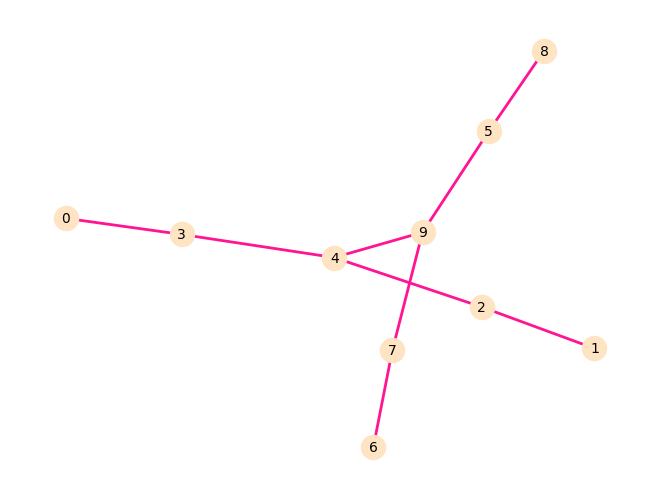

this is A_dict: 
{'3_4': [['c', 't'], ['t', 't'], ['a', 'a'], ['c', 't'], ['-', 'a'], ['-', 'g']], '0_3': [['c', 'a'], ['t', 'a'], ['a', 'c'], ['c', 'c']], '2_4': [['t', 't'], ['t', 'c'], ['-', 'g'], ['a', 'g'], ['t', 't'], ['a', 'a'], ['g', 't']], '4_9': [['-', 'g'], ['-', 'a'], ['t', 't'], ['t', 't'], ['a', 'a'], ['t', 'g'], ['a', 'a'], ['g', 'a']], '1_2': [['t', 't'], ['c', 'c'], ['g', 't'], ['g', 'c'], ['t', 't'], ['a', 'a'], ['-', 'c'], ['t', 't']], '7_9': [['g', 'g'], ['a', 'a'], ['t', 't'], ['-', 'g'], ['t', 't'], ['a', 'c'], ['g', 't'], ['a', 'a'], ['a', 'g']], '5_9': [['-', 'c'], ['g', 'g'], ['a', 'a'], ['t', 'c'], ['t', 'a'], ['a', 'a'], ['g', 'a'], ['a', 'c'], ['a', 'a']], '6_7': [['g', 'a'], ['a', 'g'], ['t', 't'], ['g', '-'], ['t', 't'], ['c', 'c'], ['t', 'c'], ['a', 'a'], ['g', 't']], '5_8': [['c', 'c'], ['g', 'a'], ['a', 'a'], ['c', 't'], ['a', 'c'], ['a', 'g'], ['a', 'a'], ['c', 'c'], ['a', '-']]}
Total cost of MSA:1290


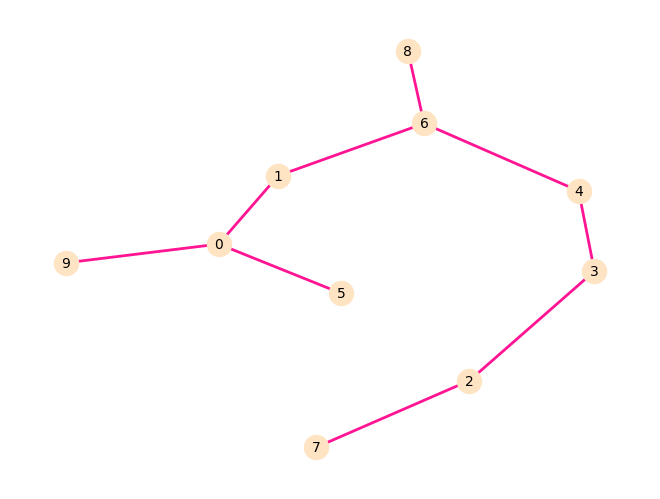

this is A_dict: 
{'2_3': [['g', 'a'], ['t', '-'], ['t', 't'], ['c', 'c'], ['c', 'c']], '2_7': [['-', 't'], ['g', 'g'], ['t', 't'], ['t', 'c'], ['c', 'c'], ['c', 't']], '3_4': [['a', 'c'], ['t', 'g'], ['c', 'c'], ['c', 'g']], '4_6': [['c', 'c'], ['g', 'g'], ['c', 't'], ['-', 'a'], ['-', 'g'], ['g', 'g']], '6_8': [['c', 'c'], ['g', 'g'], ['-', 'c'], ['t', 't'], ['a', 'a'], ['g', 'a'], ['g', 'a'], ['-', 'c']], '1_6': [['c', 'g'], ['g', 'g'], ['t', 'a'], ['a', 'a'], ['g', 'g'], ['-', 'c'], ['g', 'g']], '0_1': [['g', 'a'], ['-', 'c'], ['g', 'g'], ['a', 'a'], ['a', 'c'], ['g', 'g'], ['-', 'c'], ['c', 'c'], ['g', 'a']], '0_5': [['a', 'g'], ['c', 'g'], ['g', 'g'], ['a', 't'], ['c', 't'], ['g', 'g'], ['c', 'c'], ['c', 'a'], ['a', 'a']], '0_9': [['a', 'a'], ['c', '-'], ['g', 'a'], ['a', 'a'], ['c', 'c'], ['g', 'g'], ['c', 'g'], ['c', 'g'], ['a', 'a'], ['-', 't']]}
Total cost of MSA:1379


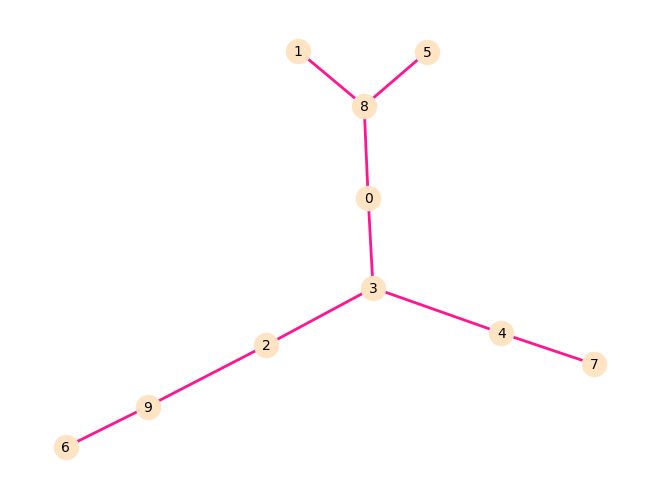

this is A_dict: 
{'6_9': [['-', 'a'], ['t', 'a'], ['t', 'a'], ['c', 't'], ['t', 't'], ['g', 'g']], '2_9': [['a', 'a'], ['a', 'a'], ['a', 'g'], ['t', 'a'], ['t', 'c'], ['g', 'a']], '2_3': [['a', 'a'], ['a', 'g'], ['-', 't'], ['-', 't'], ['g', 'g'], ['a', 'a'], ['c', 'c'], ['a', 'a'], ['-', 't']], '3_4': [['-', 'a'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['t', 't'], ['g', 'g'], ['a', 'g'], ['c', 'c'], ['a', 'g'], ['t', '-']], '0_3': [['a', 't'], ['g', 'a'], ['t', 't'], ['t', 't'], ['g', 't'], ['a', 'a'], ['c', 'g'], ['a', 'g'], ['t', 't']], '4_7': [['a', 'c'], ['a', 't'], ['g', 'g'], ['t', 't'], ['t', 'c'], ['g', 'g'], ['g', 'c'], ['c', 'c'], ['g', 'a']], '0_8': [['t', 'g'], ['a', 'g'], ['t', 'c'], ['t', 'g'], ['t', 'c'], ['a', 'a'], ['g', 'g'], ['g', 'g'], ['t', 't']], '1_8': [['g', 'a'], ['-', 'c'], ['g', 'g'], ['c', 'c'], ['g', 'c'], ['c', 'c'], ['a', 'a'], ['g', '-'], ['g', 'g'], ['t', 't']], '5_8': [['-', 't'], ['g', 'g'], ['g', 'a'], ['c', 'c'], ['g', 'g'], ['c', '-'], ['a', 'a'], ['

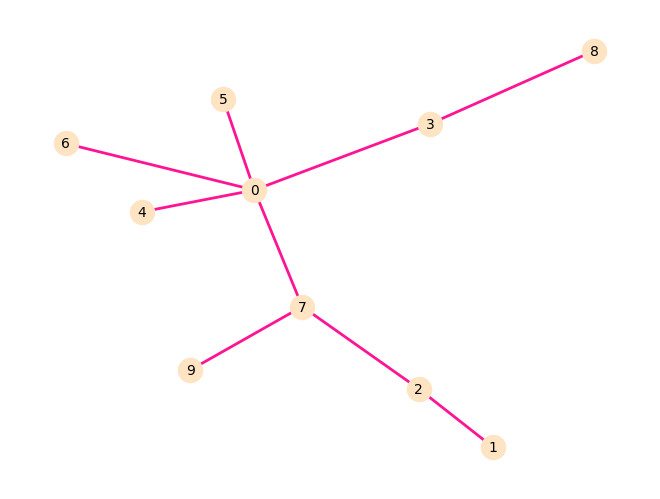

this is A_dict: 
{'1_2': [['c', 'g'], ['t', 't'], ['c', 'c'], ['t', '-'], ['t', '-'], ['t', 't'], ['a', 'a'], ['c', 'g']], '2_7': [['g', 'g'], ['t', 'c'], ['-', 'a'], ['c', 't'], ['t', 't'], ['a', 'c'], ['g', 'g']], '7_9': [['g', 'g'], ['c', 't'], ['a', 'a'], ['-', 'g'], ['t', 't'], ['t', 't'], ['-', 'c'], ['c', 'c'], ['g', 'g']], '0_7': [['g', '-'], ['c', 'c'], ['a', 'a'], ['t', 'g'], ['t', 'a'], ['c', 'c'], ['g', 'g']], '0_5': [['c', '-'], ['a', 'a'], ['g', 'g'], ['a', 'a'], ['c', '-'], ['g', 'g']], '0_6': [['c', 'g'], ['a', 'a'], ['g', 'g'], ['a', 'a'], ['c', 'c'], ['-', 'a'], ['g', 'g']], '0_3': [['c', 't'], ['a', 'a'], ['g', 'g'], ['a', '-'], ['c', 'c'], ['g', '-']], '0_4': [['c', 'c'], ['a', 'a'], ['g', 'a'], ['-', 'c'], ['-', 't'], ['a', 'a'], ['c', 'c'], ['-', 't'], ['g', 'c']], '3_8': [['-', 'c'], ['t', 'c'], ['a', 'a'], ['g', 'g'], ['c', 'c']]}
Total cost of MSA:1242


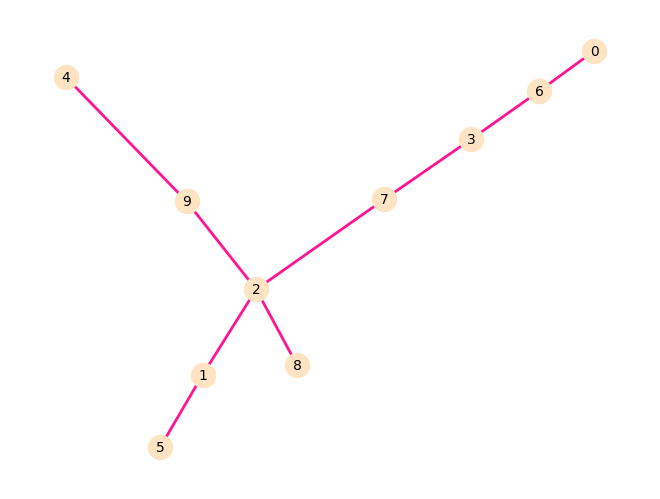

this is A_dict: 
{'3_7': [['t', '-'], ['g', 'g'], ['g', 'g'], ['g', 't'], ['g', 'g']], '3_6': [['t', 't'], ['-', 'c'], ['g', 'g'], ['g', 'a'], ['g', 'a'], ['g', 't']], '2_7': [['g', 'g'], ['g', 't'], ['t', 't'], ['g', 'g']], '0_6': [['t', 'c'], ['c', 'c'], ['g', 'g'], ['a', 'a'], ['-', 'c'], ['a', 'a'], ['-', 'c'], ['t', 'c']], '2_9': [['-', 'c'], ['g', 'g'], ['t', 't'], ['t', 't'], ['g', '-']], '2_8': [['-', 'a'], ['-', 'g'], ['g', 'g'], ['t', 't'], ['t', 't'], ['g', 'a']], '1_2': [['-', 'c'], ['-', 'c'], ['g', 'g'], ['t', 't'], ['-', 'c'], ['t', 't'], ['g', 'g']], '4_9': [['c', 'c'], ['g', 'g'], ['t', 'c'], ['t', 't']], '1_5': [['c', 'c'], ['c', 't'], ['g', 'c'], ['t', 't'], ['c', 'c'], ['-', 't'], ['t', 't'], ['g', 'a']]}
Total cost of MSA:931


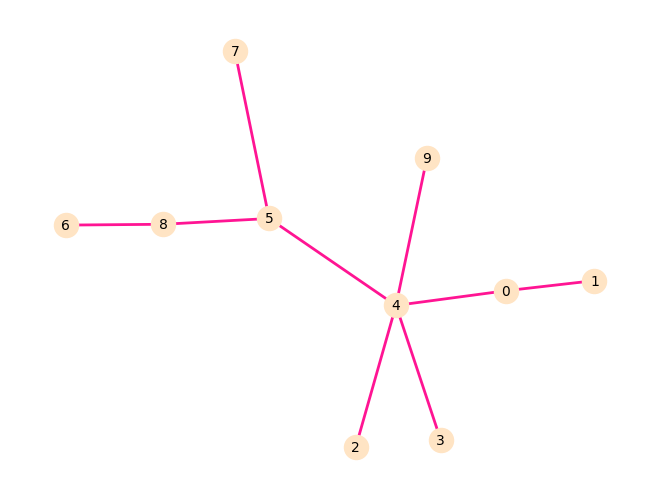

this is A_dict: 
{'0_1': [['g', 'g'], ['g', 'a'], ['g', 'a'], ['a', 'g'], ['-', 'c'], ['g', 't'], ['t', 't'], ['a', 'a']], '0_4': [['g', '-'], ['g', '-'], ['g', 'g'], ['a', '-'], ['g', 'g'], ['t', 't'], ['a', 'g']], '4_9': [['g', 't'], ['g', 'g'], ['t', 'g'], ['g', 'a']], '2_4': [['g', 'a'], ['g', 'a'], ['t', 't'], ['-', 'a'], ['-', 'a'], ['g', 'g']], '4_5': [['-', 'c'], ['g', 'a'], ['g', 'c'], ['t', 't'], ['g', 'a']], '3_4': [['g', 'g'], ['g', 'g'], ['-', 'c'], ['t', 't'], ['-', 'c'], ['g', 'g'], ['-', 'a']], '5_7': [['c', 'c'], ['a', '-'], ['c', 'c'], ['t', 't'], ['a', 'c']], '5_8': [['c', 't'], ['a', 't'], ['c', 'c'], ['-', 'g'], ['t', 'c'], ['a', 'g']], '6_8': [['t', 't'], ['t', 't'], ['c', 'c'], ['-', 'a'], ['g', 'a'], ['c', 'c'], ['g', 'g'], ['-', 'c']]}
Total cost of MSA:1206


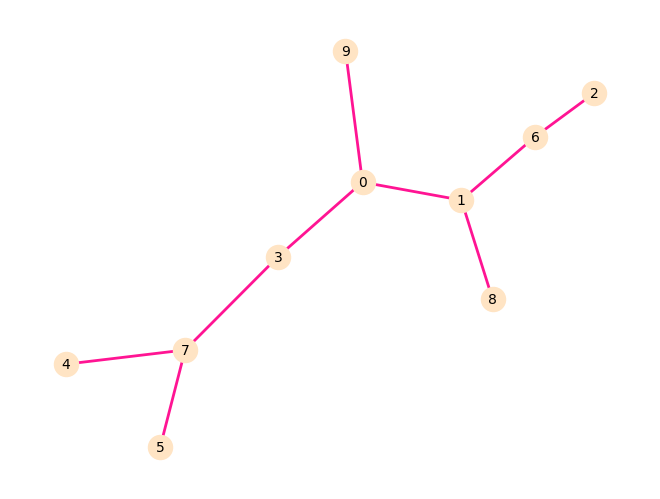

this is A_dict: 
{'0_1': [['a', 'a'], ['a', 'g'], ['c', 'c'], ['t', 'c'], ['-', 'a'], ['-', 'a']], '0_9': [['a', 'g'], ['a', 'g'], ['c', 'c'], ['-', 'g'], ['t', 't'], ['-', 'c']], '0_3': [['-', 't'], ['a', 't'], ['a', 'a'], ['c', 'c'], ['t', '-']], '1_6': [['a', 'a'], ['-', 'c'], ['g', 'a'], ['c', 'g'], ['c', 't'], ['a', 'a'], ['a', 'g']], '1_8': [['a', 'g'], ['-', 't'], ['g', 'a'], ['-', 'c'], ['c', 'c'], ['c', 'c'], ['a', 'a'], ['a', 'a'], ['-', 'c']], '3_7': [['t', 't'], ['t', 't'], ['a', 'c'], ['c', 'c'], ['-', 'g']], '2_6': [['-', 't'], ['-', 'a'], ['a', 'a'], ['c', 'c'], ['a', 'a'], ['g', 'a'], ['t', 't'], ['a', '-'], ['g', 'g']], '4_7': [['t', 'c'], ['t', 't'], ['c', 't'], ['c', 'c'], ['g', 'g']], '5_7': [['-', 'g'], ['-', 'g'], ['t', 't'], ['t', 't'], ['-', 'c'], ['c', 'c'], ['-', 'g'], ['c', 'c'], ['g', 'g']]}
Total cost of MSA:1390


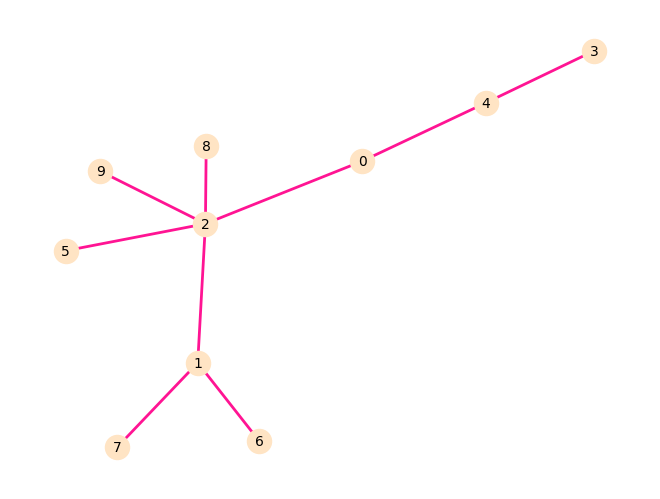

this is A_dict: 
{'3_4': [['a', 'a'], ['t', 't'], ['g', '-'], ['a', 'c'], ['a', 'a'], ['t', 't'], ['t', 't'], ['t', 'c'], ['g', 'g']], '0_4': [['a', 'a'], ['t', 't'], ['c', 't'], ['a', 'g'], ['t', 'g'], ['t', 't'], ['c', '-'], ['g', 'a']], '0_2': [['a', 'a'], ['t', 'c'], ['t', 'a'], ['g', 'g'], ['g', 'a'], ['t', 't'], ['a', '-']], '2_5': [['a', 'g'], ['c', 't'], ['a', 'g'], ['g', 'g'], ['a', 'c'], ['t', 't']], '1_2': [['a', '-'], ['c', 'c'], ['a', 'g'], ['g', 't'], ['a', 'a'], ['t', 't']], '2_9': [['-', 'g'], ['a', 'a'], ['c', 'c'], ['a', 'a'], ['-', 'c'], ['g', 't'], ['a', 'a'], ['t', 't']], '2_8': [['a', 'c'], ['c', 't'], ['a', 'a'], ['g', 'g'], ['-', 'a'], ['a', 'a'], ['t', 'g']], '1_7': [['c', 'c'], ['-', 'a'], ['g', 'a'], ['t', 't'], ['a', 'g'], ['t', 'c']], '1_6': [['c', 't'], ['g', 't'], ['t', 'c'], ['a', 'c'], ['t', 't']]}
Total cost of MSA:1077


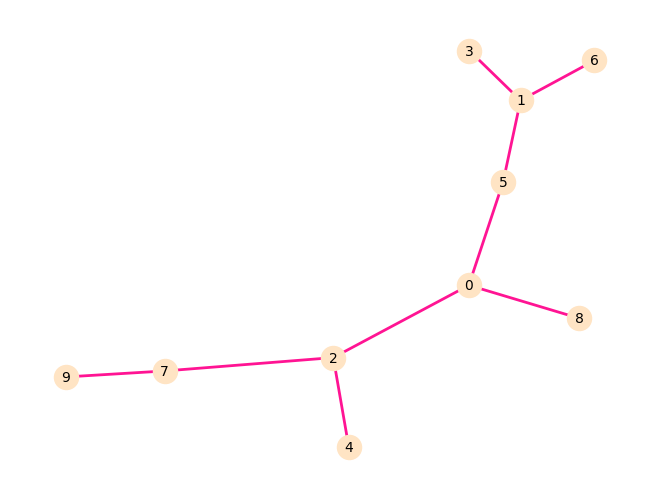

this is A_dict: 
{'1_3': [['g', 'a'], ['t', 'c'], ['t', 'c'], ['t', 'g'], ['t', 'c'], ['a', '-'], ['a', 'g'], ['a', 'a'], ['t', 'c']], '1_5': [['a', 'a'], ['c', '-'], ['c', '-'], ['g', 'g'], ['c', 't'], ['g', 'g'], ['a', 'a'], ['c', '-']], '1_6': [['a', '-'], ['c', '-'], ['c', 'c'], ['g', 'g'], ['c', 'c'], ['g', 'g'], ['a', 'g'], ['-', 'c'], ['c', 'c'], ['-', 't']], '0_5': [['a', 'a'], ['g', 'c'], ['t', 't'], ['g', '-'], ['a', 'a']], '0_2': [['a', 't'], ['c', 'c'], ['t', 'g'], ['a', 'a']], '0_8': [['-', 'g'], ['a', 'a'], ['c', 'c'], ['t', 'c'], ['a', '-']], '2_4': [['t', 't'], ['c', 'c'], ['g', 'a'], ['a', 't']], '2_7': [['t', 't'], ['c', 't'], ['-', 'g'], ['g', 'g'], ['a', 'g']], '7_9': [['-', 'c'], ['-', 't'], ['-', 'a'], ['t', 't'], ['-', 'c'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['g', 'g']]}
Total cost of MSA:1384


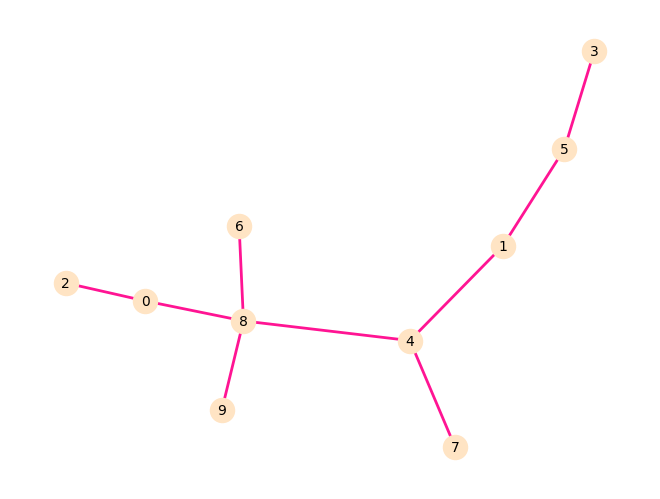

this is A_dict: 
{'0_2': [['g', 't'], ['g', 'a'], ['a', 'a'], ['a', 'a'], ['t', 't'], ['c', 'c'], ['t', '-'], ['t', 'a']], '0_8': [['t', '-'], ['a', 'a'], ['a', 't'], ['a', 'g'], ['t', 'c'], ['c', 't'], ['a', 'g']], '4_8': [['a', 'a'], ['t', 'c'], ['g', 'g'], ['c', 'c'], ['t', '-'], ['g', 'g']], '6_8': [['a', 'c'], ['t', 't'], ['g', 'c'], ['c', 't'], ['t', 't'], ['-', 'a'], ['g', 'g']], '8_9': [['a', 'a'], ['t', 'c'], ['g', 'g'], ['c', 't'], ['t', 't'], ['-', 'g'], ['-', 'a'], ['-', 'a'], ['g', 'g']], '1_4': [['a', 'a'], ['c', 't'], ['g', 'a'], ['c', 'c'], ['g', 'a'], ['-', 't']], '4_7': [['a', 'g'], ['c', 'c'], ['g', 'c'], ['c', 'c'], ['g', 't']], '1_5': [['a', '-'], ['t', 'c'], ['a', 'g'], ['c', 't'], ['a', 'a'], ['t', 'c']], '3_5': [['c', 'g'], ['g', 'g'], ['t', 't'], ['a', 'g'], ['c', 'a']]}
Total cost of MSA:1082


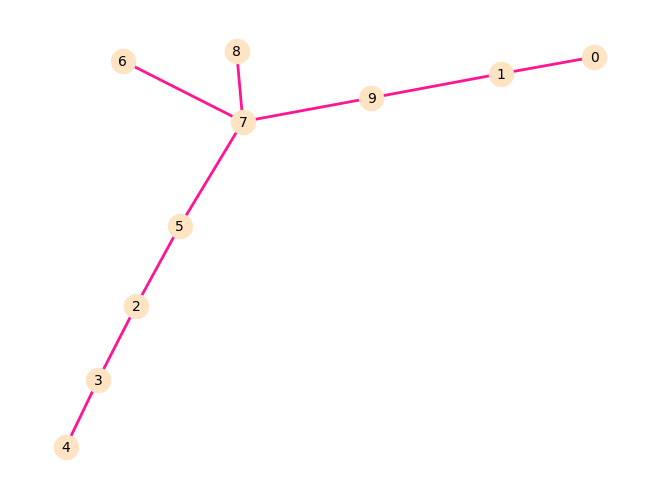

this is A_dict: 
{'3_4': [['g', 'g'], ['-', 't'], ['a', 'a'], ['t', 't'], ['g', 'g'], ['-', 't'], ['c', 'c'], ['g', 'a'], ['a', 'g']], '2_3': [['-', 'c'], ['g', 'c'], ['a', 'a'], ['t', 't'], ['g', 'g'], ['c', '-'], ['g', 'g'], ['a', 'g']], '2_5': [['c', 't'], ['c', 'g'], ['a', 'a'], ['t', 't'], ['g', '-'], ['g', '-'], ['g', 'g']], '5_7': [['t', 't'], ['g', 'g'], ['a', 'a'], ['-', 't'], ['t', 't'], ['g', 'c']], '6_7': [['t', 't'], ['g', 'g'], ['a', 'g'], ['t', 'c'], ['t', 't'], ['c', 't']], '7_9': [['-', 't'], ['t', 't'], ['g', 't'], ['a', 'a'], ['t', 't'], ['t', 'c'], ['c', 'c']], '7_8': [['-', 'a'], ['t', 't'], ['g', 'a'], ['a', 'a'], ['-', 't'], ['t', 't'], ['t', 't'], ['c', 't']], '1_9': [['t', 't'], ['t', 'c'], ['t', 't'], ['a', 'a'], ['t', '-'], ['c', 'c'], ['c', 't']], '0_1': [['t', 'c'], ['c', 'a'], ['t', 't'], ['-', 'a'], ['a', 'a'], ['c', 'c'], ['t', 't']]}
Total cost of MSA:1207


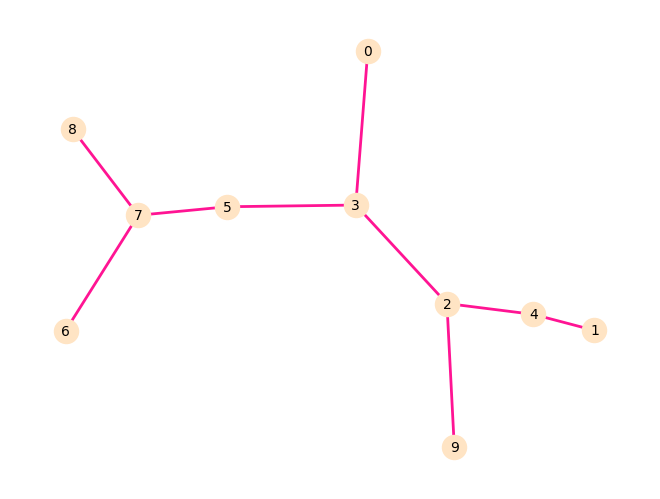

this is A_dict: 
{'1_4': [['c', 'c'], ['a', 'a'], ['t', 'a'], ['t', 'c'], ['t', 'c'], ['a', 'a'], ['g', '-'], ['g', 'g'], ['a', '-']], '2_4': [['c', '-'], ['a', 'a'], ['a', 'g'], ['c', 'c'], ['c', 't'], ['a', '-'], ['g', 'g']], '2_3': [['a', 'c'], ['g', 'g'], ['c', 'c'], ['t', 'g'], ['g', 'a']], '2_9': [['a', 'a'], ['g', 'c'], ['c', 'c'], ['t', 'c'], ['g', 't']], '3_5': [['c', 'c'], ['g', 'c'], ['c', 't'], ['g', 'g'], ['a', 'a']], '0_3': [['-', 't'], ['c', 'c'], ['g', 'g'], ['c', 'c'], ['-', 'g'], ['g', 'g'], ['a', 'a']], '5_7': [['c', '-'], ['c', 't'], ['t', 't'], ['g', 'a'], ['a', 'a'], ['-', 'c']], '6_7': [['-', 'a'], ['t', 't'], ['t', 'c'], ['a', 'a'], ['a', 'a'], ['c', 'c']], '7_8': [['t', '-'], ['t', 'g'], ['a', 'a'], ['a', 'a'], ['c', 'c']]}
Total cost of MSA:1080


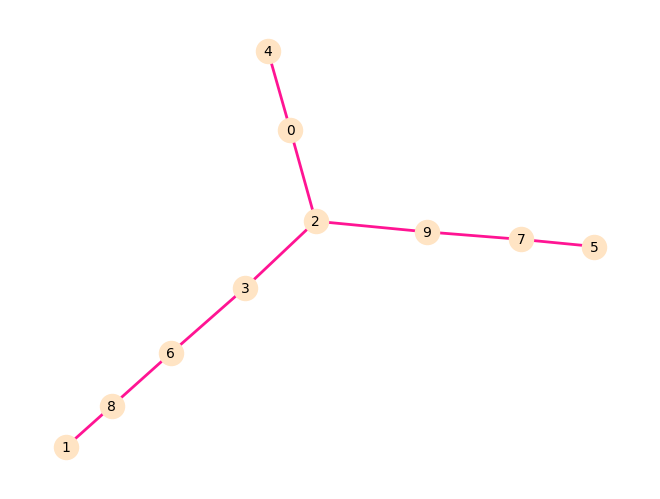

this is A_dict: 
{'1_8': [['g', 'a'], ['t', 't'], ['t', 't'], ['c', '-'], ['g', 'g'], ['c', '-'], ['a', 'a'], ['a', 'a'], ['t', 't'], ['-', 'g']], '6_8': [['a', 'a'], ['t', 'g'], ['t', 'c'], ['g', 'g'], ['a', '-'], ['a', 'g'], ['t', 'c'], ['g', 'g']], '3_6': [['a', 'g'], ['g', 'g'], ['c', 'c'], ['g', 'a'], ['g', 't'], ['c', 'c'], ['g', 'a']], '2_3': [['g', '-'], ['g', 'g'], ['c', 't'], ['a', 'g'], ['t', 't'], ['c', 'c'], ['a', '-']], '2_9': [['g', 'a'], ['t', 't'], ['g', 'g'], ['t', 'g'], ['c', 't']], '0_2': [['-', 't'], ['g', 'g'], ['t', 'c'], ['g', 'g'], ['t', '-'], ['c', 'c']], '7_9': [['a', 'a'], ['-', 'c'], ['t', 't'], ['g', 'g'], ['g', 'g'], ['t', '-']], '0_4': [['t', 'c'], ['g', 'g'], ['c', 't'], ['g', 'c'], ['c', 't']], '5_7': [['-', 't'], ['a', 'a'], ['-', 't'], ['c', 'c'], ['t', 'c'], ['g', 'g'], ['g', 'g']]}
Total cost of MSA:1068


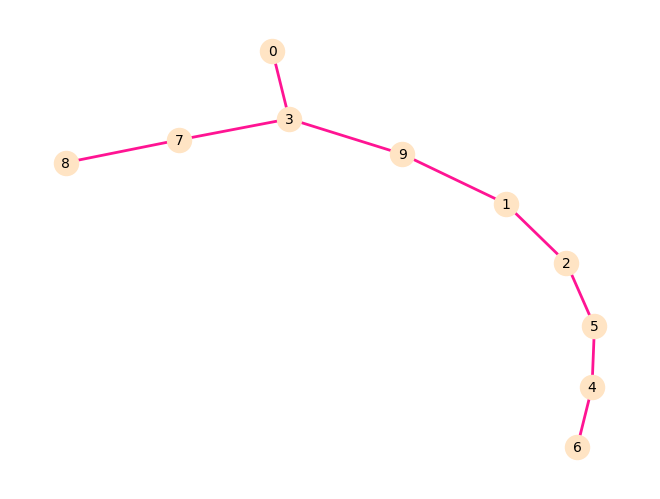

this is A_dict: 
{'2_5': [['a', '-'], ['a', 't'], ['g', 'g'], ['t', 't'], ['a', 'g'], ['g', 'c'], ['c', 'c'], ['c', 'c']], '4_5': [['a', 'c'], ['a', 'a'], ['g', 't'], ['t', 'c'], ['a', 'a'], ['g', 'g'], ['c', 'c'], ['c', 'g']], '1_2': [['t', '-'], ['g', '-'], ['t', 't'], ['g', 'g'], ['c', '-'], ['c', 'c'], ['c', 'c']], '4_6': [['-', 'a'], ['c', 'c'], ['a', 'a'], ['t', 'c'], ['c', 'c'], ['a', 'a'], ['g', 'g'], ['c', '-'], ['g', 'g']], '1_9': [['t', 'c'], ['-', 'a'], ['g', 'a'], ['c', 't'], ['c', 'c']], '3_9': [['c', '-'], ['a', 'a'], ['a', 't'], ['t', 't'], ['c', 't']], '0_3': [['a', 'a'], ['-', 't'], ['t', 't'], ['-', 'c'], ['t', 't'], ['t', 't']], '3_7': [['a', 'c'], ['t', 't'], ['t', 't'], ['t', 'c'], ['-', 'g']], '7_8': [['c', 'c'], ['t', 'c'], ['t', 't'], ['c', '-'], ['g', 'g']]}
Total cost of MSA:1372


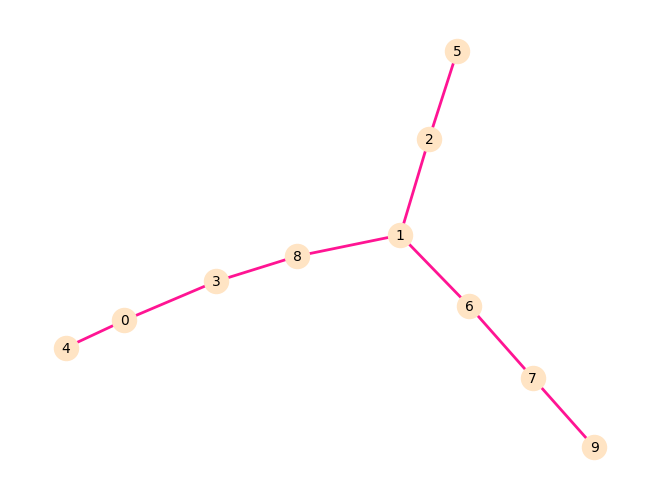

this is A_dict: 
{'1_8': [['a', 'a'], ['g', 'g'], ['t', 't'], ['-', 'g'], ['t', 'c'], ['g', 'g'], ['-', 't'], ['g', 'a']], '1_2': [['a', 'g'], ['g', 'g'], ['t', '-'], ['t', 'g'], ['g', 'g'], ['g', 't']], '1_6': [['-', 't'], ['a', 'a'], ['g', 'g'], ['t', 'c'], ['t', 't'], ['g', 'c'], ['g', 't']], '3_8': [['a', 'a'], ['-', 'c'], ['g', 'g'], ['t', 'a'], ['g', 'g'], ['c', 'g'], ['g', 'c'], ['t', 't'], ['a', 'a']], '2_5': [['g', 'a'], ['g', 'a'], ['g', 'a'], ['g', 'c'], ['t', 'c']], '6_7': [['t', 't'], ['a', 't'], ['g', 'g'], ['c', '-'], ['t', 't'], ['c', 'a'], ['t', 't']], '0_3': [['a', 'g'], ['c', 'c'], ['g', 'g'], ['a', 'a'], ['g', 'g'], ['g', 'a'], ['c', 'a'], ['t', 'c'], ['a', 'a']], '7_9': [['t', 't'], ['-', 'c'], ['t', 't'], ['g', 'g'], ['t', 't'], ['a', 'c'], ['t', 't']], '0_4': [['-', 't'], ['g', 'c'], ['c', 'c'], ['g', 'a'], ['a', 'g'], ['g', 'g'], ['a', 'g'], ['a', 'a'], ['c', 'c'], ['a', '-']]}
Total cost of MSA:1294


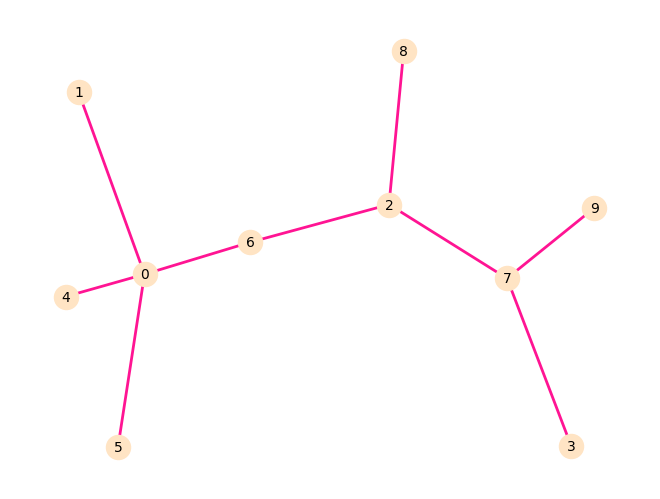

this is A_dict: 
{'0_5': [['c', 'c'], ['g', '-'], ['a', 'a'], ['g', '-'], ['t', 'c'], ['g', 'a'], ['g', 'g'], ['t', 't'], ['g', 'a']], '0_1': [['c', 'c'], ['a', 'a'], ['c', 'c'], ['-', 't'], ['-', 't'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['a', 'a']], '0_4': [['-', 'a'], ['c', 'c'], ['a', 'a'], ['c', 't'], ['-', 'a'], ['a', 'a'], ['g', 'a'], ['t', 'c'], ['a', 'g']], '0_6': [['c', '-'], ['a', 'g'], ['c', 'c'], ['a', 'g'], ['g', 'a'], ['t', 'c'], ['a', '-']], '2_6': [['g', 'g'], ['c', 'c'], ['g', 'g'], ['a', 'a'], ['-', 'c'], ['-', 'c'], ['c', 'c']], '2_7': [['g', '-'], ['c', '-'], ['g', 'g'], ['a', 'a'], ['c', 'c'], ['c', 'c'], ['c', 't']], '2_8': [['-', 't'], ['-', 'c'], ['g', 't'], ['c', 'c'], ['g', 'a'], ['a', 'a'], ['c', 'c'], ['c', 'c'], ['c', 't']], '3_7': [['g', 't'], ['a', 'a'], ['c', 'c'], ['c', 'c'], ['t', '-']], '7_9': [['g', 'a'], ['a', 'g'], ['-', 't'], ['c', 'c'], ['c', 't'], ['t', 't']]}
Total cost of MSA:1351


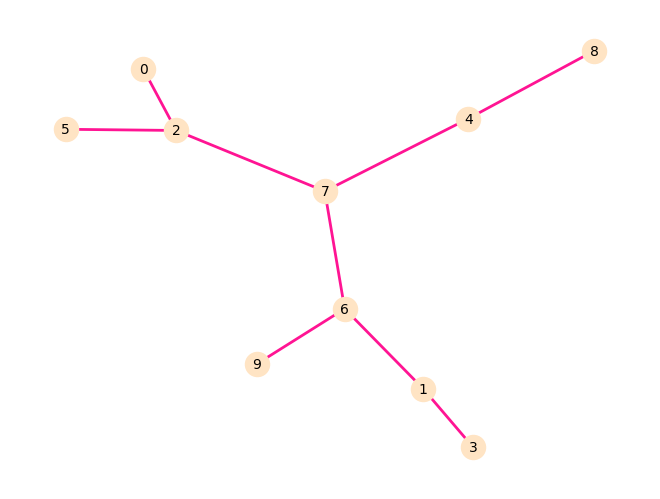

this is A_dict: 
{'0_2': [['t', 't'], ['c', 'c'], ['c', 'g'], ['t', 't'], ['a', 'g'], ['c', '-'], ['c', '-'], ['a', 'a'], ['g', '-']], '2_7': [['t', 't'], ['c', 'c'], ['g', '-'], ['t', 'c'], ['g', 'g'], ['a', '-']], '2_5': [['-', 'g'], ['-', 'g'], ['t', 't'], ['c', 't'], ['g', 'a'], ['t', 'g'], ['g', 'g'], ['a', 'a']], '4_7': [['t', 'c'], ['c', 'c'], ['c', 't'], ['g', 't']], '6_7': [['t', 'c'], ['-', 'a'], ['-', 'g'], ['c', 'c'], ['c', 'c'], ['g', 'g']], '4_8': [['c', 'g'], ['c', 'c'], ['t', 't'], ['t', 'c']], '6_9': [['c', 't'], ['a', 'g'], ['g', 'g'], ['c', 'g'], ['c', 't'], ['g', 'a']], '1_6': [['-', 'a'], ['c', 't'], ['a', 'a'], ['-', 'c'], ['g', 'g'], ['c', 'c'], ['c', 't'], ['g', 'g']], '1_3': [['a', 'a'], ['-', 'g'], ['t', 'c'], ['a', 'a'], ['c', 'a'], ['g', 'g'], ['c', 't'], ['t', 't'], ['g', '-']]}
Total cost of MSA:1241


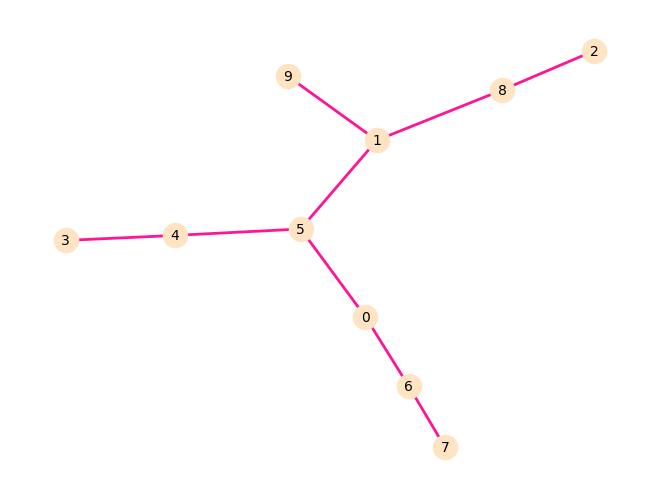

this is A_dict: 
{'1_9': [['t', 't'], ['a', 'g'], ['t', 't'], ['t', 'a']], '1_5': [['t', 't'], ['-', 'g'], ['a', 'a'], ['t', 'g'], ['t', 't']], '1_8': [['-', 'c'], ['t', 't'], ['-', 'c'], ['a', 'a'], ['t', 'c'], ['t', 't']], '0_5': [['t', 'c'], ['g', 'g'], ['a', 'a'], ['g', '-'], ['t', 'c']], '4_5': [['-', 'g'], ['-', 'a'], ['t', 'c'], ['g', 'g'], ['a', 'a'], ['-', 't'], ['g', 'g'], ['-', 'a'], ['t', 't']], '2_8': [['c', 't'], ['t', 't'], ['c', 't'], ['-', 'a'], ['a', 'a'], ['c', 'c'], ['t', 'a']], '0_6': [['c', 'g'], ['g', 't'], ['a', 'g'], ['c', 'c']], '3_4': [['g', 'g'], ['a', 'a'], ['c', 'g'], ['g', 't'], ['a', 'a'], ['t', 'c'], ['g', 'a'], ['a', 'g'], ['t', 'g']], '6_7': [['g', 'g'], ['-', 'c'], ['t', 't'], ['g', 'c'], ['c', 'c']]}
Total cost of MSA:1147


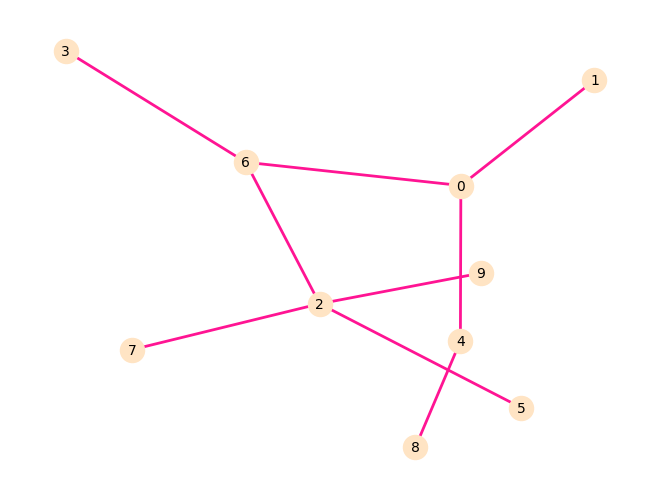

this is A_dict: 
{'2_5': [['c', 'c'], ['g', 'g'], ['g', 'g'], ['-', 't'], ['g', 't'], ['g', 'g']], '2_6': [['c', 't'], ['g', 'g'], ['g', 'a'], ['t', 't'], ['t', 't'], ['g', '-']], '2_7': [['c', 't'], ['g', 't'], ['g', 'g'], ['t', 't'], ['t', 't'], ['-', 'c'], ['g', 'a']], '2_9': [['c', 't'], ['g', 'a'], ['g', 'g'], ['t', 'c'], ['-', 'a'], ['-', 'a'], ['t', 'c'], ['g', 'g']], '3_6': [['t', 't'], ['g', 'g'], ['a', '-'], ['t', 't'], ['t', 'c']], '0_6': [['-', 'a'], ['t', 't'], ['g', 'g'], ['a', 'a'], ['t', '-'], ['t', 't']], '0_1': [['a', 'a'], ['-', 'c'], ['t', 't'], ['g', 'g'], ['a', 'c'], ['t', 't']], '0_4': [['a', 'g'], ['t', 't'], ['g', 'c'], ['a', 'a'], ['t', 't'], ['-', 'c']], '4_8': [['g', 'a'], ['t', 't'], ['-', 'c'], ['-', 'a'], ['c', 'c'], ['-', 'a'], ['a', 'a'], ['t', 't'], ['c', 't']]}
Total cost of MSA:1107


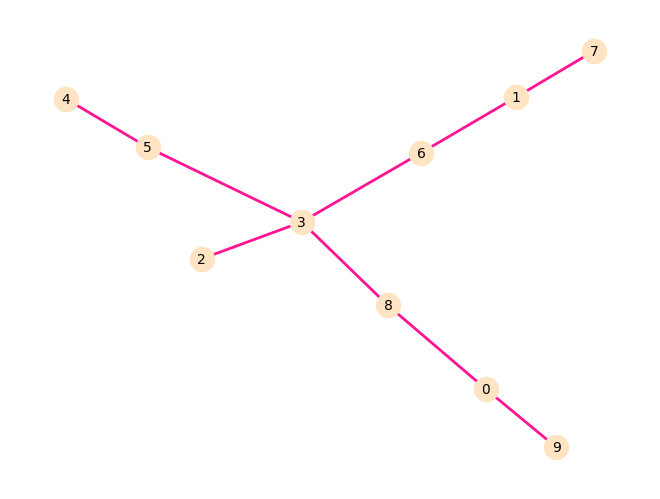

this is A_dict: 
{'4_5': [['a', 't'], ['a', 'a'], ['t', 't'], ['t', 't'], ['-', 'c'], ['t', 't'], ['a', 'a'], ['c', '-'], ['c', 'c'], ['a', '-']], '3_5': [['t', 't'], ['a', 'a'], ['t', 't'], ['t', 'g'], ['c', 'c'], ['t', '-'], ['a', 'a'], ['c', 'c']], '3_6': [['t', 't'], ['a', 'g'], ['t', 't'], ['g', 'g'], ['c', 'a'], ['a', 'a'], ['-', 't'], ['c', 't']], '2_3': [['t', 't'], ['a', '-'], ['t', 't'], ['g', 'g'], ['-', 'c'], ['c', 'c'], ['a', 'g'], ['c', 'g']], '3_8': [['t', 'c'], ['a', 'a'], ['t', '-'], ['g', 'a'], ['c', '-'], ['a', 'g'], ['c', 't']], '1_6': [['t', 'c'], ['g', 'c'], ['t', 'c'], ['g', 'g'], ['a', 't'], ['a', 't'], ['t', 't'], ['t', 't']], '0_8': [['c', 'a'], ['a', 'g'], ['a', 'a'], ['g', 'c'], ['t', 't']], '1_7': [['-', 't'], ['c', 'c'], ['c', 'c'], ['c', 'c'], ['g', 'a'], ['t', 't'], ['t', 'a'], ['t', 'c'], ['t', 'g']], '0_9': [['-', 'g'], ['a', 'g'], ['g', 'g'], ['a', 'g'], ['c', 't'], ['t', 't'], ['-', 'g']]}
Total cost of MSA:1323


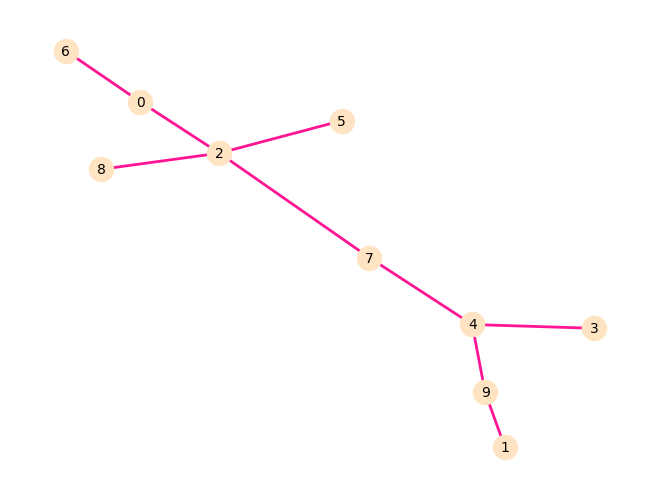

this is A_dict: 
{'0_6': [['g', 'g'], ['g', 'g'], ['g', 't'], ['g', 'a'], ['a', 'a'], ['g', 'g'], ['c', '-']], '0_2': [['g', '-'], ['g', 't'], ['t', 'c'], ['a', 'c'], ['a', 'g'], ['g', 'g']], '2_7': [['t', 't'], ['c', 'c'], ['c', 'c'], ['g', '-'], ['g', 'g']], '2_5': [['t', 'a'], ['c', 'c'], ['c', 'c'], ['g', 'a'], ['g', 't']], '2_8': [['-', 'g'], ['t', 'c'], ['c', 'c'], ['-', 't'], ['c', 't'], ['g', 'g'], ['g', 'g'], ['-', 'c']], '4_7': [['t', 'c'], ['-', 'a'], ['-', 'a'], ['c', 'c'], ['c', 'c'], ['g', 'g']], '4_9': [['c', 'c'], ['a', 'a'], ['a', 'a'], ['c', 't'], ['-', 'g'], ['c', 'c'], ['g', 'c']], '3_4': [['-', 'c'], ['-', 't'], ['c', 'c'], ['a', 'a'], ['a', 'g'], ['c', 'c'], ['c', 't'], ['g', 'c']], '1_9': [['c', 'c'], ['a', 'g'], ['a', 'a'], ['-', 'c'], ['t', 't'], ['g', 'g'], ['c', 'c'], ['c', 'a']]}
Total cost of MSA:1246


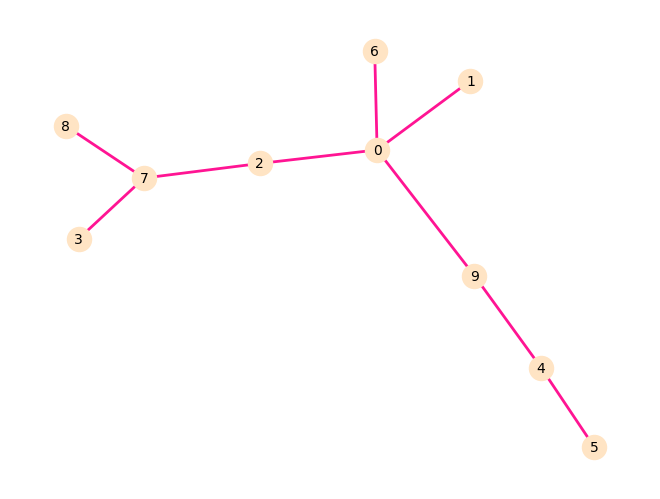

this is A_dict: 
{'0_1': [['t', '-'], ['c', 'c'], ['c', 'c'], ['g', 'g'], ['-', 'c']], '0_9': [['c', 'c'], ['c', 't'], ['g', 't'], ['c', 't']], '0_6': [['-', 'g'], ['c', 'c'], ['c', 'c'], ['-', 'a'], ['g', 'g'], ['c', 'g']], '0_2': [['-', 'c'], ['c', 'c'], ['c', 'c'], ['-', 't'], ['-', 'a'], ['g', 'a'], ['c', 'c']], '4_9': [['-', 'a'], ['c', 'c'], ['-', 'a'], ['t', 't'], ['t', 't'], ['t', 'a']], '2_7': [['c', 'c'], ['c', 't'], ['c', 'a'], ['t', 'a'], ['a', 't'], ['a', 'a'], ['c', 'c']], '4_5': [['-', 't'], ['a', 'a'], ['-', 'g'], ['c', 't'], ['a', 'g'], ['t', 't'], ['t', 't'], ['a', 'a']], '7_8': [['c', 'a'], ['t', 't'], ['a', 'a'], ['-', 'g'], ['a', 'a'], ['t', 't'], ['-', 'a'], ['a', 'a'], ['c', 'c']], '3_7': [['c', 't'], ['t', 't'], ['-', 'a'], ['a', 'a'], ['a', 'a'], ['-', 'g'], ['t', 'c'], ['a', 'g'], ['c', 't']]}
Total cost of MSA:1253


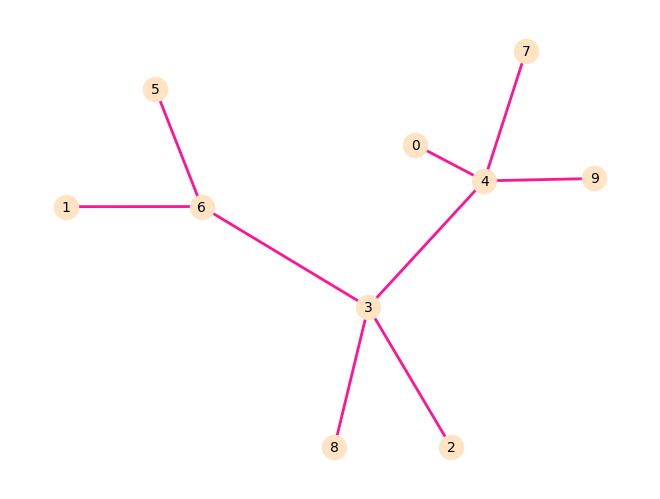

this is A_dict: 
{'2_3': [['c', 'a'], ['t', 't'], ['c', 'c'], ['t', 'a']], '3_6': [['a', 'a'], ['t', 't'], ['c', 'a'], ['a', 'a'], ['-', 'c']], '3_8': [['a', 't'], ['t', 'c'], ['c', 't'], ['-', 'g'], ['a', 'a']], '3_4': [['-', 'c'], ['-', 'g'], ['a', 'a'], ['-', 'g'], ['t', 't'], ['c', 'c'], ['a', 'a']], '1_6': [['a', 'a'], ['t', 't'], ['a', 'g'], ['a', 't'], ['c', 't']], '5_6': [['a', 'a'], ['t', 'c'], ['-', 'g'], ['-', 'g'], ['a', 'a'], ['a', 'a'], ['-', 'g'], ['c', 'c']], '4_7': [['c', 'a'], ['g', 'g'], ['a', 'a'], ['-', 't'], ['g', 'g'], ['t', 't'], ['c', 'g'], ['a', 'g']], '4_9': [['c', 'c'], ['-', 't'], ['g', 'a'], ['a', 'a'], ['g', 'c'], ['t', 't'], ['c', 'c'], ['a', 't']], '0_4': [['c', '-'], ['g', 'g'], ['a', 'a'], ['g', 'g'], ['-', 't'], ['t', 't'], ['-', 'c'], ['c', 'c'], ['a', 'c']]}
Total cost of MSA:1228


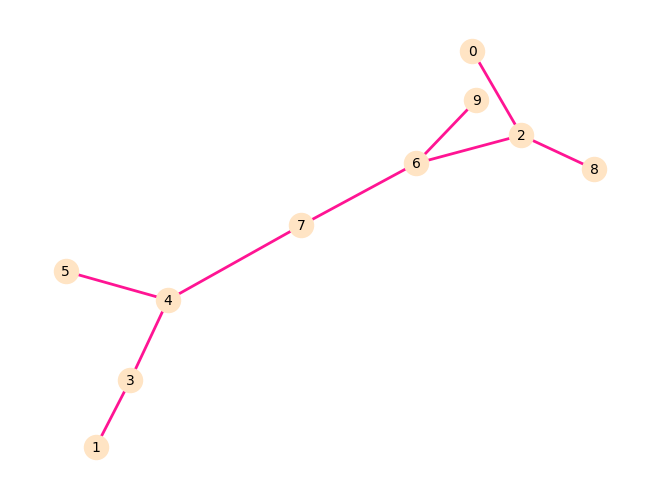

this is A_dict: 
{'0_2': [['g', 'c'], ['t', 't'], ['t', 't'], ['g', 't'], ['a', 'a'], ['a', 'a'], ['g', 'g'], ['a', '-'], ['t', 't']], '2_6': [['c', 'g'], ['t', 't'], ['t', 't'], ['t', 't'], ['a', 't'], ['a', 'a'], ['g', 'g'], ['t', '-']], '2_8': [['c', 'c'], ['t', 'c'], ['t', 't'], ['t', 't'], ['a', 'c'], ['a', 'c'], ['g', 'c'], ['t', 'c'], ['-', 'g']], '6_7': [['g', '-'], ['t', 't'], ['t', 'a'], ['t', 't'], ['t', 'c'], ['a', 'a'], ['g', 'a']], '6_9': [['g', 'g'], ['t', 'c'], ['t', 'c'], ['t', 't'], ['-', 'g'], ['t', 'a'], ['a', 'a'], ['g', 'a']], '4_7': [['t', 't'], ['a', 'a'], ['t', 'g'], ['c', 'c'], ['a', 't'], ['a', 'a']], '4_5': [['t', '-'], ['a', 'a'], ['g', 'g'], ['c', 'c'], ['t', '-'], ['a', 'g']], '3_4': [['t', 'c'], ['a', 'g'], ['g', 'g'], ['-', 'a'], ['c', 'g'], ['t', 't'], ['a', 'c']], '1_3': [['-', 'g'], ['c', 'c'], ['g', 'a'], ['-', 'c'], ['g', 'g'], ['a', 't'], ['g', 'g'], ['t', 't'], ['c', 't']]}
Total cost of MSA:1301


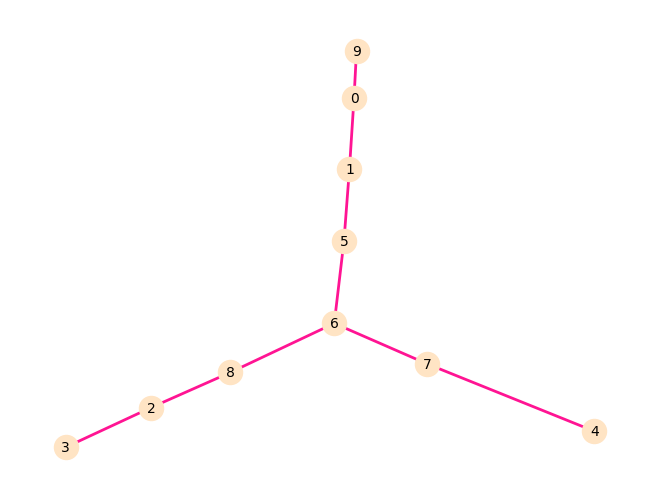

this is A_dict: 
{'0_1': [['-', 'c'], ['-', 'a'], ['g', 'a'], ['c', 'c'], ['a', 'a'], ['g', 'g']], '1_5': [['g', 'c'], ['c', 't'], ['a', 'g'], ['g', 't']], '0_9': [['c', 'c'], ['-', 'a'], ['-', 'g'], ['a', 'a'], ['a', 'a'], ['c', 'c'], ['-', 't'], ['a', 't'], ['g', 'g']], '5_6': [['-', 'a'], ['c', 'c'], ['t', 't'], ['g', 'a'], ['t', 't'], ['-', 'c']], '6_8': [['a', 'a'], ['c', 't'], ['-', 'a'], ['t', 'c'], ['a', 'a'], ['t', 't'], ['c', 't']], '6_7': [['a', 'c'], ['c', 'c'], ['t', 'c'], ['a', 't'], ['t', 't'], ['c', 'c']], '2_8': [['a', 'a'], ['t', '-'], ['a', 'a'], ['c', 'a'], ['a', 'g'], ['t', 't'], ['-', 'g'], ['t', 't']], '4_7': [['c', 'c'], ['c', 'c'], ['c', 'c'], ['t', 't'], ['t', 't'], ['c', 't']], '2_3': [['a', '-'], ['a', 'a'], ['a', 'g'], ['g', 'g'], ['t', 't'], ['g', 'g'], ['t', 'c']]}
Total cost of MSA:1210


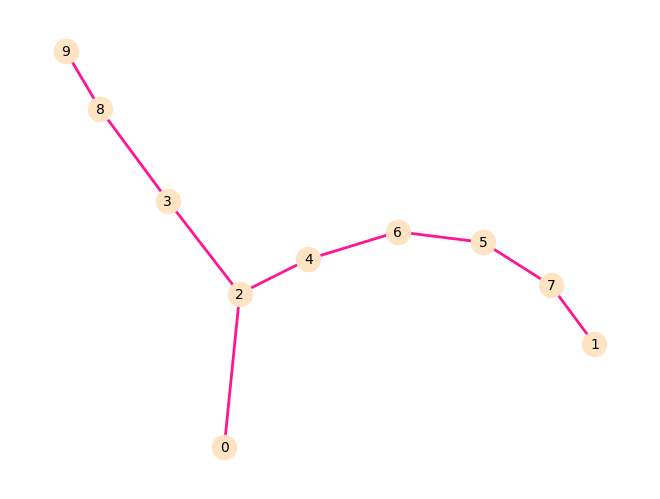

this is A_dict: 
{'2_3': [['t', '-'], ['a', 'a'], ['a', 'a'], ['g', 'g'], ['g', 'g'], ['a', 't']], '0_2': [['t', 't'], ['a', 'g'], ['a', 'g'], ['g', 'a'], ['g', 'a'], ['a', 'a'], ['-', 'c']], '2_4': [['t', 'c'], ['a', 'g'], ['a', 'a'], ['g', '-'], ['g', 'c'], ['a', 'a']], '3_8': [['a', 'a'], ['a', 'g'], ['g', 'a'], ['g', 'g'], ['-', 't'], ['t', 't']], '4_6': [['c', 't'], ['g', 'g'], ['a', '-'], ['c', 'c'], ['a', 'a']], '8_9': [['a', 'g'], ['-', 'c'], ['g', 'c'], ['a', 'a'], ['-', 'c'], ['-', 't'], ['g', 'g'], ['t', 'c'], ['t', 'c']], '5_6': [['t', 'c'], ['g', 'g'], ['c', 'c'], ['-', 'g'], ['a', 'a']], '5_7': [['c', 'c'], ['g', '-'], ['c', 't'], ['g', 'g'], ['a', 'g']], '1_7': [['-', 'a'], ['-', 't'], ['c', 't'], ['t', 't'], ['g', 'a'], ['g', 'g']]}
Total cost of MSA:1238


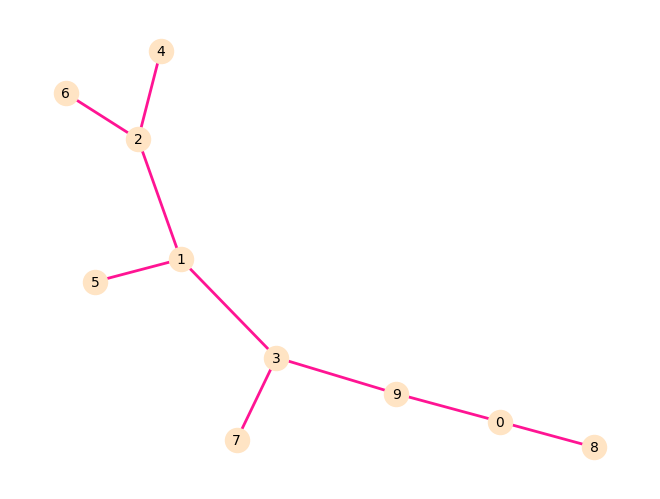

this is A_dict: 
{'0_8': [['a', 't'], ['g', 'g'], ['g', 'c'], ['c', 'g'], ['g', 'g'], ['a', 'a'], ['g', 'g'], ['a', 'a'], ['a', 'a']], '0_9': [['a', 'a'], ['g', '-'], ['g', 't'], ['c', 'c'], ['g', 'g'], ['a', 'a'], ['g', 'g'], ['a', '-'], ['a', 'c']], '3_9': [['a', 'a'], ['t', '-'], ['c', 'c'], ['g', 'a'], ['a', 'c'], ['g', 'g'], ['c', '-']], '3_7': [['-', 't'], ['a', 'a'], ['c', 't'], ['a', 'g'], ['c', '-'], ['g', 'g']], '1_3': [['a', 'a'], ['c', 'g'], ['a', 'a'], ['-', 't'], ['c', 'c'], ['g', 't']], '1_2': [['a', 'g'], ['g', 'g'], ['-', 'a'], ['a', 'a'], ['t', 'c'], ['c', 'c'], ['-', 'a'], ['t', 't']], '1_5': [['a', 'a'], ['g', 'g'], ['-', 't'], ['a', 'a'], ['-', 'g'], ['t', 't'], ['-', 'a'], ['c', 't'], ['t', 'c']], '2_4': [['g', 'g'], ['g', 'g'], ['-', 'c'], ['a', 'a'], ['a', 't'], ['c', 'c'], ['c', 'c'], ['a', 'a'], ['t', 'g']], '2_6': [['g', 'c'], ['g', 'c'], ['a', 'a'], ['a', 'a'], ['c', 't'], ['c', 't'], ['a', 'g'], ['-', 'c'], ['t', 't']]}
Total cost of MSA:1599


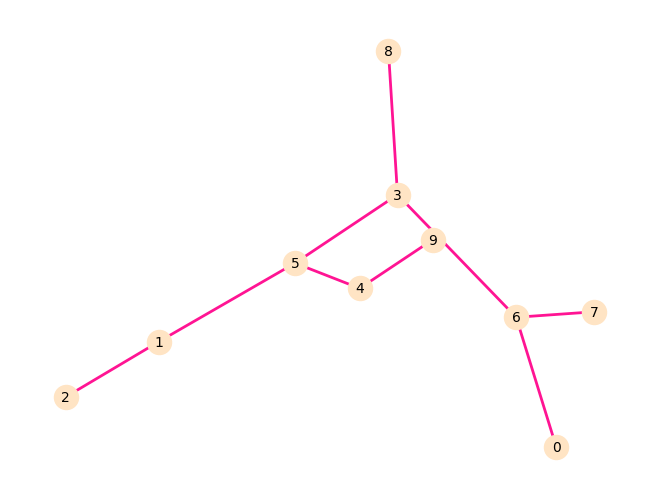

this is A_dict: 
{'1_5': [['g', 'a'], ['g', 'g'], ['-', 'c'], ['g', 'g'], ['t', 't']], '1_2': [['g', 'g'], ['g', 'a'], ['g', 'a'], ['t', 't'], ['-', 'a']], '3_5': [['a', 't'], ['g', 'a'], ['c', 'c'], ['g', 't'], ['t', 'c']], '4_5': [['a', 'g'], ['-', 'c'], ['-', 'c'], ['g', 'a'], ['c', 'c'], ['g', 'a'], ['t', 't']], '3_6': [['t', 'c'], ['a', 'a'], ['c', 'c'], ['t', 't'], ['-', 'g'], ['-', 'g'], ['c', 'c']], '3_8': [['-', 'c'], ['t', 't'], ['a', 'a'], ['-', 'g'], ['c', 't'], ['t', 't'], ['c', 't']], '4_9': [['g', 'a'], ['c', 'c'], ['c', 't'], ['a', 'c'], ['c', 'c'], ['a', 't'], ['t', 't'], ['-', 'g']], '0_6': [['c', 'c'], ['a', 'a'], ['c', 'c'], ['-', 'g'], ['-', 'g'], ['t', 't'], ['g', 'g'], ['g', 'a'], ['c', 't']], '6_7': [['c', 't'], ['-', 'g'], ['a', 'a'], ['c', 'c'], ['-', 't'], ['t', 't'], ['g', 'a'], ['g', 't'], ['c', 'c']]}
Total cost of MSA:1211


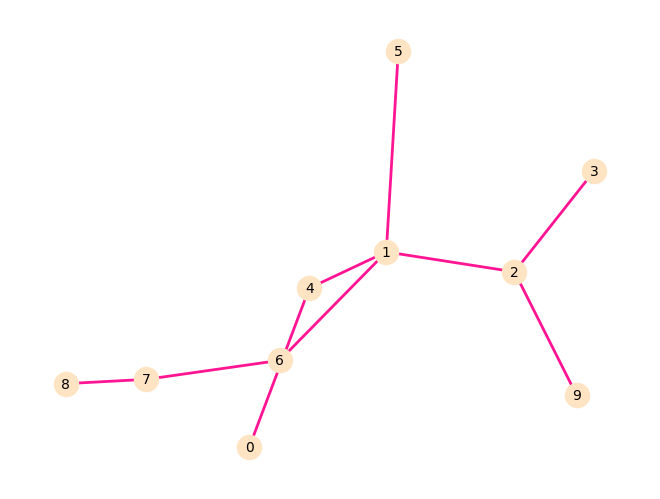

this is A_dict: 
{'0_4': [['g', '-'], ['g', 'c'], ['g', 'a'], ['t', 't'], ['t', 't'], ['t', 't'], ['t', 't'], ['a', 'c']], '1_4': [['c', 'c'], ['a', 'a'], ['t', 't'], ['t', 'a'], ['t', 'c'], ['t', 'g'], ['c', 'a']], '1_2': [['c', 't'], ['a', '-'], ['t', 't'], ['a', 'a'], ['c', '-'], ['g', 'g'], ['a', 'g']], '1_6': [['c', 'g'], ['a', 'a'], ['t', '-'], ['a', 'a'], ['c', 'g'], ['g', 'g'], ['a', 'a']], '1_5': [['c', 'c'], ['-', 't'], ['a', 'a'], ['t', 'c'], ['a', 'g'], ['-', 'c'], ['c', 'c'], ['g', 'a'], ['a', 'a']], '2_3': [['t', '-'], ['t', 'g'], ['a', 'a'], ['g', 'g'], ['g', 'c']], '2_9': [['t', 't'], ['t', 't'], ['-', 'c'], ['a', 'a'], ['g', 'a'], ['g', 'g'], ['-', 't'], ['-', 't']], '6_7': [['g', 'g'], ['a', 'a'], ['a', 'a'], ['-', 'c'], ['g', 'c'], ['g', 'g'], ['a', 'a']], '7_8': [['g', 'g'], ['a', 'g'], ['a', 't'], ['c', 'c'], ['c', 't'], ['g', 'g'], ['a', 'g'], ['-', 't']]}
Total cost of MSA:1276


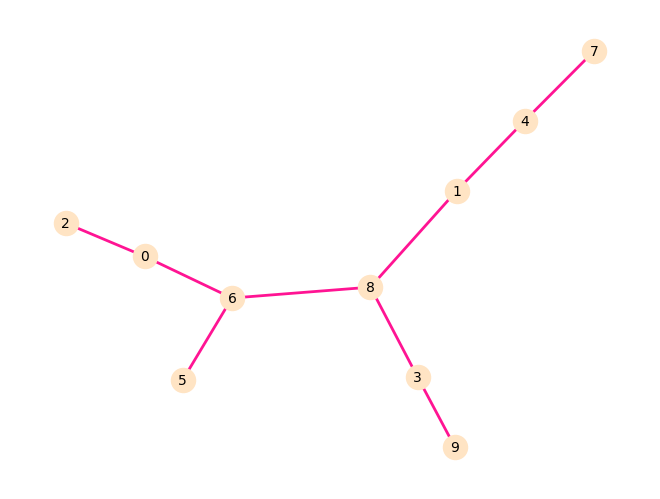

this is A_dict: 
{'0_2': [['a', 'a'], ['g', '-'], ['g', 'g'], ['c', 'c'], ['c', 't'], ['t', 'a'], ['t', 't'], ['c', 't']], '0_6': [['a', '-'], ['g', 't'], ['c', 'c'], ['t', 't'], ['a', 'a'], ['t', 'g'], ['t', 'c']], '6_8': [['t', 't'], ['c', 'a'], ['t', 't'], ['a', 'a'], ['g', '-'], ['c', 'c']], '5_6': [['t', '-'], ['c', 'g'], ['t', 't'], ['a', 'g'], ['g', 'g'], ['c', 'c']], '1_8': [['t', 't'], ['a', 'g'], ['t', 't'], ['a', 'c'], ['c', 'g']], '3_8': [['-', 't'], ['t', 't'], ['a', 'a'], ['t', 'c'], ['a', 'g'], ['c', 't'], ['-', 'a']], '1_4': [['-', 'c'], ['t', 't'], ['g', 't'], ['t', 't'], ['c', 't'], ['-', 'a'], ['g', 'g']], '3_9': [['-', 'g'], ['t', 't'], ['t', 'g'], ['a', 'a'], ['-', 'c'], ['c', 'c'], ['g', 'g'], ['t', 'g'], ['a', 'a']], '4_7': [['c', 'c'], ['t', 'c'], ['t', 't'], ['t', 'c'], ['t', 'c'], ['a', 'g'], ['g', 'a']]}
Total cost of MSA:1179


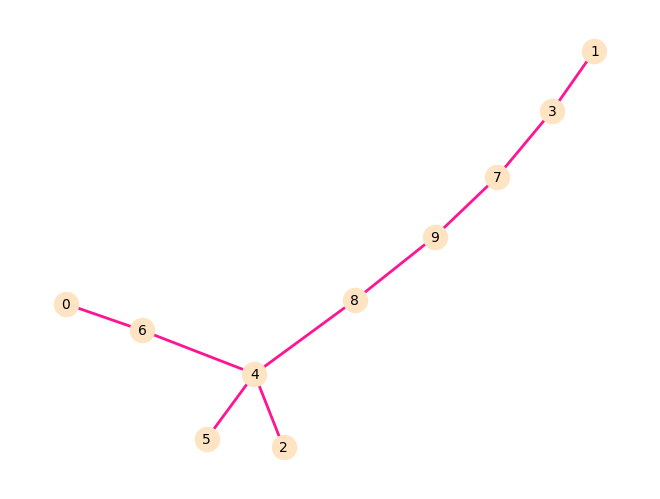

this is A_dict: 
{'1_3': [['t', 'c'], ['t', 't'], ['c', 'c'], ['a', 'a'], ['c', '-'], ['a', 'a'], ['c', 't'], ['a', 'a'], ['g', '-']], '3_7': [['c', 'g'], ['t', 't'], ['c', 'c'], ['a', 'g'], ['a', 'g'], ['t', 't'], ['-', 'a'], ['a', 'a']], '7_9': [['g', 'g'], ['t', 'c'], ['c', 'c'], ['g', '-'], ['g', '-'], ['t', 't'], ['a', 'a'], ['a', 'c']], '8_9': [['g', 'g'], ['c', '-'], ['c', 't'], ['t', 't'], ['a', '-'], ['c', 'c']], '4_8': [['g', 'a'], ['t', 't'], ['-', 'g'], ['t', 't'], ['c', 't']], '4_6': [['a', 'g'], ['t', 'a'], ['g', 'g'], ['t', 't'], ['t', 't']], '4_5': [['a', 't'], ['t', 'c'], ['g', 't'], ['t', 't'], ['t', 't']], '2_4': [['a', 'c'], ['t', 't'], ['g', 'g'], ['t', 'c'], ['-', 'g'], ['t', 'c']], '0_6': [['-', 'g'], ['g', 'g'], ['a', 'a'], ['g', 'g'], ['-', 'a'], ['t', 't'], ['t', 't']]}
Total cost of MSA:1063


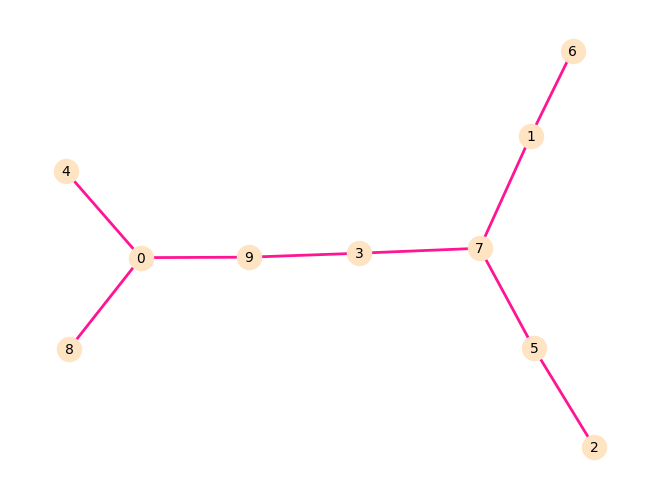

this is A_dict: 
{'2_5': [['a', 'a'], ['a', 'g'], ['a', 't'], ['a', 'a'], ['g', 'c'], ['c', 'c'], ['g', 'g'], ['g', 'g'], ['t', 't']], '5_7': [['a', 't'], ['a', 'a'], ['a', 'a'], ['a', 'g'], ['g', 'a'], ['c', 'c'], ['g', '-'], ['g', 'a'], ['t', '-']], '3_7': [['t', 't'], ['a', 'a'], ['a', 'a'], ['g', 'g'], ['-', 't'], ['a', 'g'], ['c', 't'], ['a', 'g']], '1_7': [['-', 'g'], ['t', 't'], ['a', 'g'], ['a', 'g'], ['g', 'c'], ['a', 't'], ['c', 'c'], ['a', 'a']], '3_9': [['t', 't'], ['a', '-'], ['a', '-'], ['g', 'g'], ['t', 't'], ['g', 'g'], ['t', 't'], ['g', 'a']], '1_6': [['g', 'g'], ['t', 't'], ['g', 't'], ['g', 't'], ['c', 'c'], ['-', 'a'], ['t', 'a'], ['c', 'c'], ['a', 'g']], '0_9': [['t', '-'], ['g', 'g'], ['t', 't'], ['g', 'a'], ['t', 't'], ['a', '-']], '0_4': [['g', 'g'], ['t', 'a'], ['a', 'a'], ['t', 'g']], '0_8': [['-', 'a'], ['g', 'g'], ['t', 't'], ['a', '-'], ['t', 't']]}
Total cost of MSA:1366


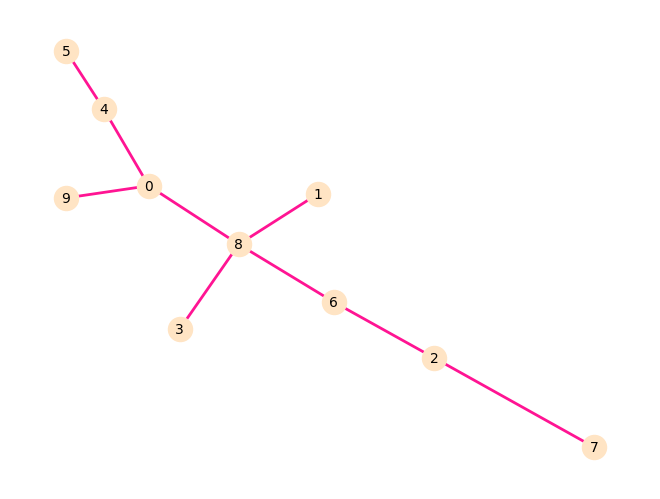

this is A_dict: 
{'2_7': [['g', 'g'], ['g', 'g'], ['t', 'c'], ['c', 'c']], '2_6': [['g', '-'], ['g', 'g'], ['t', 't'], ['c', 'c'], ['-', 'g']], '6_8': [['g', 't'], ['t', 't'], ['c', 'a'], ['g', 'g'], ['-', 't']], '3_8': [['-', 'a'], ['t', 'c'], ['t', 't'], ['a', 'a'], ['g', 'g'], ['t', 't']], '1_8': [['t', 't'], ['t', 'g'], ['a', 'a'], ['g', 'g'], ['t', 'a']], '0_8': [['-', 't'], ['t', 't'], ['t', 't'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['-', 'g'], ['-', 'a'], ['-', 'c']], '0_4': [['t', '-'], ['t', 't'], ['t', 'c'], ['a', 'g'], ['g', 'a'], ['t', 't'], ['-', 'g'], ['g', 'g'], ['a', 'a'], ['c', 'c']], '0_9': [['t', 'c'], ['t', 't'], ['t', 'c'], ['a', 'g'], ['g', 't'], ['t', 'c'], ['g', 'a'], ['a', 'a'], ['c', 't']], '4_5': [['t', 't'], ['-', 'g'], ['c', 'c'], ['g', 'a'], ['a', 'a'], ['t', '-'], ['g', 'g'], ['g', 'g'], ['a', 'a'], ['c', 'g']]}
Total cost of MSA:1286


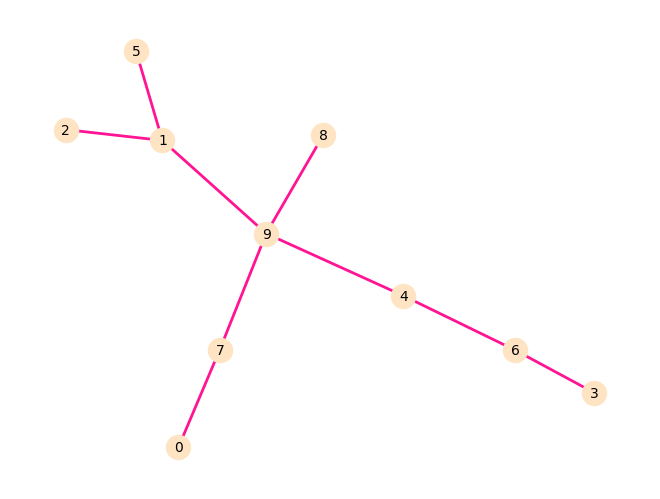

this is A_dict: 
{'1_5': [['g', 'a'], ['g', 'g'], ['a', 'c'], ['a', 't'], ['a', 'a'], ['g', 'c'], ['a', 'a'], ['a', 'c'], ['t', 'a']], '1_2': [['a', '-'], ['g', 'g'], ['c', 't'], ['t', 'c'], ['a', 'g'], ['c', 'c'], ['-', 't'], ['a', 'a'], ['c', 'c'], ['a', 'g']], '1_9': [['a', 'g'], ['g', 'a'], ['c', 'c'], ['t', '-'], ['a', '-'], ['c', 'c'], ['a', '-'], ['c', 'c'], ['a', 'a']], '4_9': [['g', 'a'], ['a', 'g'], ['c', 't'], ['c', 'c'], ['c', 't'], ['a', 't']], '8_9': [['g', '-'], ['a', 'a'], ['c', 't'], ['c', 'a'], ['c', 'c'], ['a', 'g']], '7_9': [['g', 'c'], ['a', 'c'], ['c', 't'], ['c', 't'], ['c', 'c'], ['a', 'a'], ['-', 'c']], '4_6': [['-', 'c'], ['-', 'a'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['c', 'c'], ['t', 't'], ['t', 'a']], '0_7': [['c', 't'], ['c', 'c'], ['-', 'a'], ['t', 't'], ['t', 't'], ['c', 'c'], ['-', 't'], ['a', 't'], ['c', 't']], '3_6': [['c', 'c'], ['a', 't'], ['a', 'a'], ['g', 'a'], ['t', 't'], ['-', 'g'], ['c', 'c'], ['t', 'c'], ['a', 'c']]}
Total cost of MSA:1402


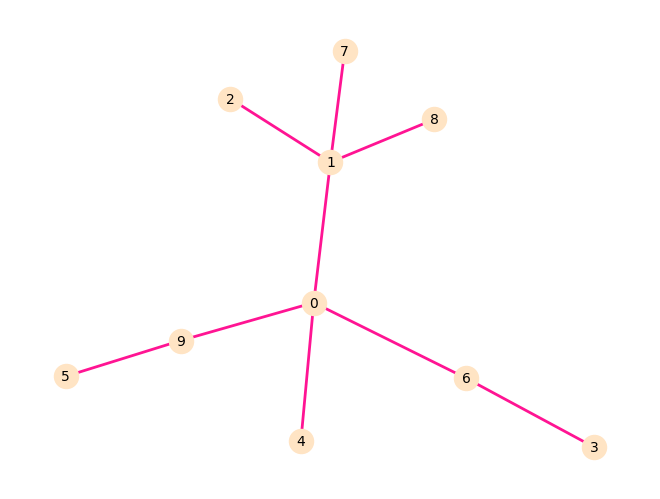

this is A_dict: 
{'1_2': [['g', 'g'], ['-', 'c'], ['g', 'g'], ['t', 't'], ['c', 'g'], ['c', 'c'], ['t', '-'], ['c', 'c']], '1_7': [['g', '-'], ['c', 'c'], ['g', 'a'], ['t', 'c'], ['g', 'g'], ['c', 'c'], ['c', 'c'], ['-', 't']], '0_1': [['g', 'g'], ['c', 'c'], ['g', '-'], ['t', 't'], ['g', 'a'], ['c', '-'], ['c', '-']], '1_8': [['g', 'g'], ['c', 'a'], ['g', 'g'], ['t', 'c'], ['-', 'a'], ['g', 'a'], ['c', 't'], ['c', 't']], '0_4': [['g', 'g'], ['c', 'a'], ['t', 't'], ['a', 'g']], '0_6': [['g', '-'], ['c', 'c'], ['t', 'c'], ['a', 'a'], ['-', 't']], '0_9': [['-', 'a'], ['g', 'a'], ['c', 't'], ['-', 'a'], ['t', 't'], ['-', 'a'], ['a', 'a']], '3_6': [['c', 't'], ['c', 'c'], ['-', 'g'], ['a', 'g'], ['t', 't']], '5_9': [['a', 'a'], ['-', 'c'], ['a', 'a'], ['t', 'c'], ['a', 'g'], ['t', 'c'], ['-', 'g'], ['a', 'a'], ['a', 'a']]}
Total cost of MSA:1181


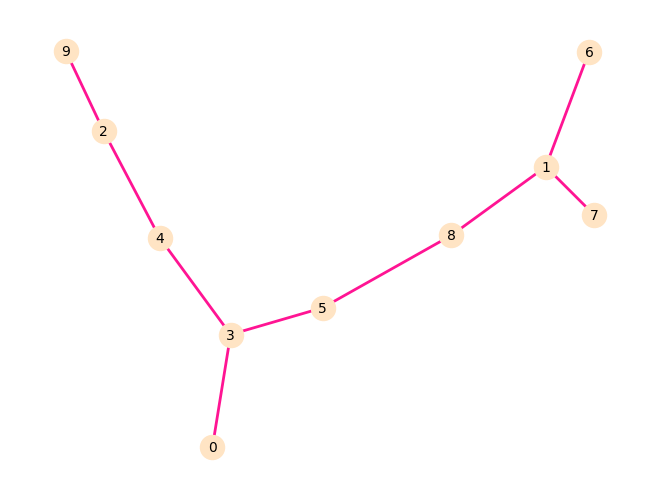

this is A_dict: 
{'2_4': [['c', 't'], ['c', 'g'], ['t', 'c'], ['t', 't'], ['c', 'c'], ['c', 'a']], '2_9': [['c', 'c'], ['c', 't'], ['t', 'c'], ['t', 'c'], ['-', 'a'], ['-', 'a'], ['c', 'c'], ['c', 'c'], ['-', 'g']], '3_4': [['t', 't'], ['g', 'a'], ['c', 'c'], ['t', 'c'], ['-', 'a'], ['c', 'g'], ['a', 'a']], '3_5': [['t', 'c'], ['a', '-'], ['c', 'c'], ['c', 'c'], ['a', '-'], ['g', 'g'], ['a', 'a']], '0_3': [['t', 'g'], ['a', 'a'], ['c', 'c'], ['-', 'a'], ['c', 'c'], ['a', 't'], ['g', 'g'], ['a', 'a'], ['-', 'c']], '5_8': [['c', '-'], ['c', 'c'], ['c', 'c'], ['g', 'g'], ['a', 'a']], '1_8': [['c', 't'], ['c', 'g'], ['g', 'g'], ['a', 'g']], '1_6': [['t', 'g'], ['g', 'a'], ['g', 'c'], ['g', 'g']], '1_7': [['-', 'a'], ['-', 'g'], ['t', 'a'], ['g', 'g'], ['g', 'g'], ['-', 'a'], ['g', 'g']]}
Total cost of MSA:1139


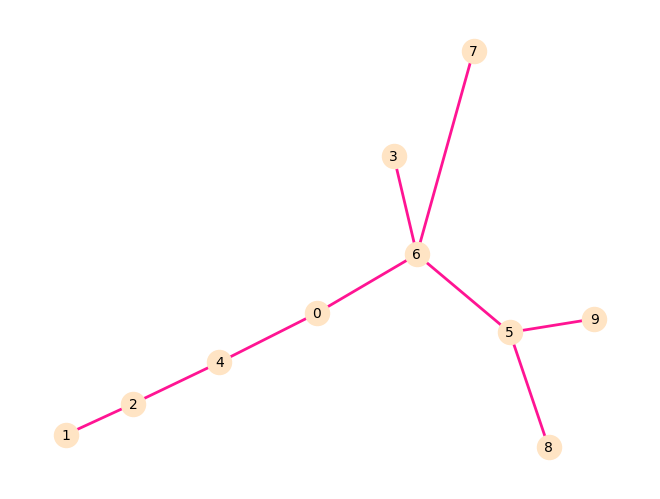

this is A_dict: 
{'1_2': [['t', 'c'], ['g', 'a'], ['t', 'c'], ['-', 'g'], ['c', 'c'], ['t', 'c'], ['a', 'a'], ['c', '-'], ['a', 'a'], ['g', 'a']], '2_4': [['c', 'c'], ['a', 'a'], ['c', '-'], ['g', 'g'], ['c', 'a'], ['c', 'c'], ['a', 'a'], ['a', 'c'], ['a', 'g']], '0_4': [['c', 't'], ['a', 't'], ['g', 'g'], ['a', 'g'], ['c', 'c'], ['a', 'g'], ['c', 'c'], ['g', '-']], '0_6': [['t', 'a'], ['t', 't'], ['g', '-'], ['g', 'g'], ['c', 't'], ['g', 'g'], ['c', '-']], '6_7': [['a', 'a'], ['t', 't'], ['g', 'g'], ['t', 't'], ['g', '-']], '5_6': [['a', 'a'], ['-', 'g'], ['t', 'c'], ['g', 't'], ['t', 't'], ['g', 'g'], ['-', 'a']], '3_6': [['-', 'g'], ['a', 'a'], ['t', 't'], ['-', 'a'], ['g', 'g'], ['t', 't'], ['g', 'g'], ['-', 'a'], ['-', 't']], '5_9': [['a', '-'], ['g', '-'], ['c', 'c'], ['t', 'c'], ['t', 'c'], ['g', 'g'], ['a', 'a']], '5_8': [['a', 'a'], ['-', 't'], ['g', 't'], ['c', 'c'], ['t', 't'], ['t', 't'], ['g', 't'], ['a', 'a']]}
Total cost of MSA:1404


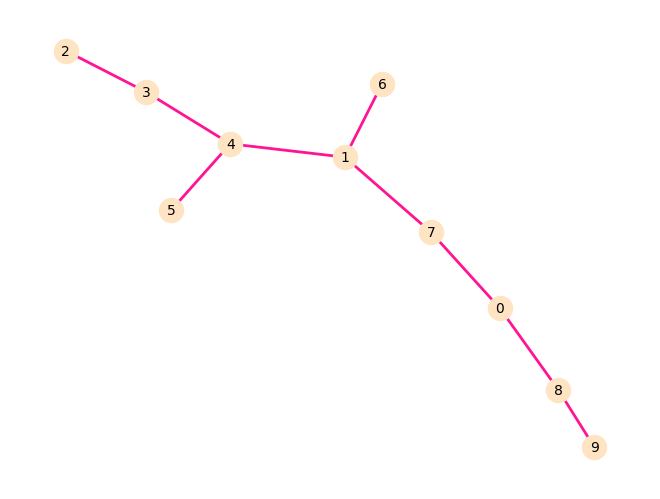

this is A_dict: 
{'1_6': [['g', 'g'], ['a', 'a'], ['g', 'g'], ['g', 'g'], ['t', '-'], ['c', 'c'], ['c', 'g'], ['t', 'c']], '1_4': [['g', 'g'], ['a', 'a'], ['g', 'g'], ['g', 'c'], ['c', 't'], ['g', 'a'], ['c', 't']], '1_7': [['g', 'g'], ['a', 'g'], ['g', 'g'], ['g', 'a'], ['c', 't'], ['g', 'g'], ['c', '-']], '4_5': [['g', 'g'], ['a', 'g'], ['g', 't'], ['c', 'c'], ['t', 't'], ['a', 'a'], ['t', 'c']], '3_4': [['g', 'a'], ['a', 'c'], ['g', 'g'], ['c', 'c'], ['t', 't'], ['a', 'a'], ['t', '-']], '0_7': [['g', '-'], ['g', 'g'], ['g', 'g'], ['a', '-'], ['t', 'c'], ['g', 'g']], '2_3': [['-', 't'], ['a', 'a'], ['c', 't'], ['g', 'g'], ['c', 'c'], ['t', 't'], ['a', 'g']], '0_8': [['g', 't'], ['g', 'g'], ['c', 'c'], ['g', 'g'], ['-', 'a']], '8_9': [['-', 'c'], ['t', 'c'], ['g', 'g'], ['-', 'a'], ['-', 't'], ['c', 'c'], ['g', 'g'], ['a', 'a']]}
Total cost of MSA:945


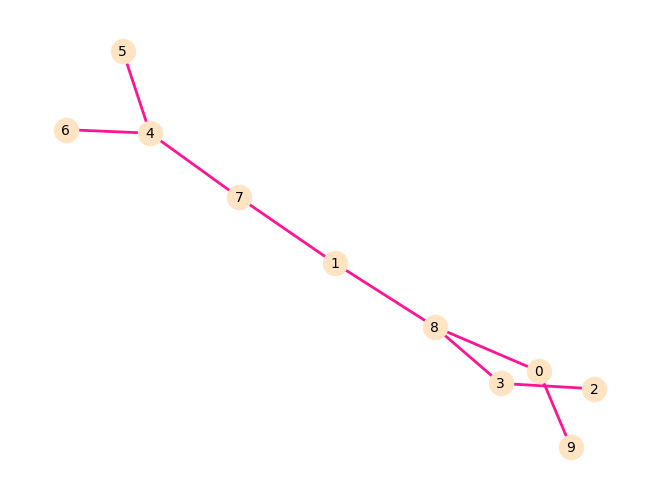

this is A_dict: 
{'4_5': [['c', 't'], ['t', 'g'], ['t', 't'], ['c', 't'], ['c', 't']], '4_7': [['t', 't'], ['-', 'c'], ['g', 'a'], ['t', 'c'], ['t', 'g'], ['t', 't']], '4_6': [['-', 'g'], ['t', 'a'], ['g', 'g'], ['t', 'c'], ['t', 't'], ['-', 'g'], ['t', 't']], '1_7': [['t', 't'], ['c', 'c'], ['a', 'g'], ['c', '-'], ['g', 'a'], ['t', '-']], '1_8': [['t', 'c'], ['c', 't'], ['-', 'a'], ['g', 'g'], ['a', 'a'], ['-', 'g']], '0_8': [['-', 'g'], ['c', 'c'], ['t', 'c'], ['a', 'g'], ['g', 'g'], ['a', 'a'], ['g', 'a']], '3_8': [['c', 'c'], ['t', 't'], ['a', 't'], ['g', 'g'], ['a', 'a'], ['-', 't'], ['-', 'g'], ['g', 'g']], '0_9': [['-', 'a'], ['g', 'a'], ['c', 'g'], ['c', 'g'], ['g', 'g'], ['g', 'g'], ['a', 'a'], ['a', 'a']], '2_3': [['c', 'g'], ['t', 't'], ['t', 'a'], ['g', 'a'], ['a', 'a'], ['-', 't'], ['t', 't'], ['g', 't'], ['g', 'g']]}
Total cost of MSA:1387


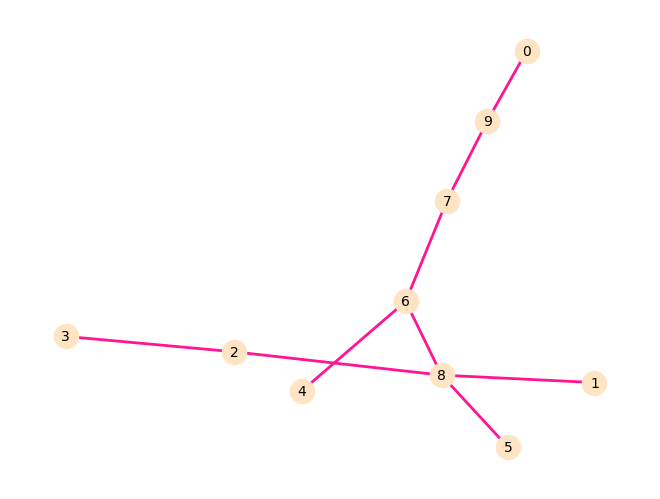

this is A_dict: 
{'0_9': [['g', 'g'], ['c', 't'], ['g', 'g'], ['t', '-'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['t', 'a'], ['a', 'g']], '7_9': [['g', '-'], ['t', 't'], ['g', 'g'], ['a', 'g'], ['g', 'a'], ['t', '-'], ['a', 'g'], ['g', 'a']], '6_7': [['t', '-'], ['g', 'g'], ['g', 't'], ['a', 'a'], ['g', 'g'], ['a', '-']], '4_6': [['g', 'a'], ['t', 'c'], ['a', 'g'], ['g', 't']], '6_8': [['-', 'c'], ['-', 'c'], ['g', 'g'], ['t', 't'], ['a', 'g'], ['g', 'g'], ['-', 'c']], '2_8': [['c', 'c'], ['c', 'a'], ['g', 'a'], ['t', 'c'], ['g', 'c'], ['g', 'a'], ['c', 'c']], '5_8': [['c', 'a'], ['c', 't'], ['g', 'a'], ['t', 't'], ['g', 'a'], ['-', 'c'], ['g', 'g'], ['c', 't']], '1_8': [['c', 'c'], ['c', 'c'], ['g', 't'], ['t', 't'], ['g', 'c'], ['g', 't'], ['c', 'a']], '2_3': [['c', 'c'], ['a', 'g'], ['a', 'a'], ['c', 'a'], ['c', 't'], ['a', 'a'], ['-', 'c'], ['c', 'c']]}
Total cost of MSA:1189


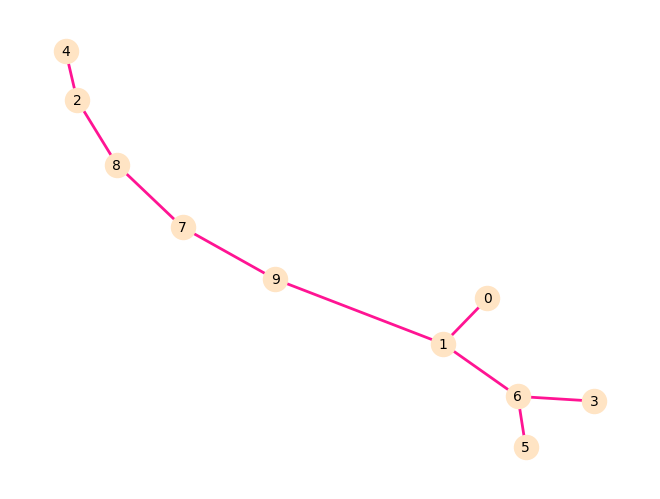

this is A_dict: 
{'2_8': [['-', 'g'], ['g', 'g'], ['t', 'a'], ['t', 't'], ['t', 't']], '2_4': [['-', 'c'], ['-', 't'], ['g', 'g'], ['t', 't'], ['-', 'a'], ['t', 't'], ['t', 't']], '7_8': [['g', 'c'], ['g', 'g'], ['a', 'a'], ['t', 't'], ['t', 't'], ['-', 'g']], '7_9': [['c', 'c'], ['g', 'g'], ['a', 'a'], ['t', '-'], ['t', 't'], ['g', '-']], '1_9': [['c', 'c'], ['g', 'a'], ['a', 'a'], ['t', 'c']], '0_1': [['-', 'c'], ['c', 'c'], ['a', 't'], ['a', 'g'], ['c', 'c']], '1_6': [['-', 'g'], ['c', 'c'], ['-', 'a'], ['a', 'a'], ['a', 'a'], ['c', 'a']], '5_6': [['g', 'g'], ['c', 'c'], ['a', 'g'], ['a', 'a'], ['-', 'c'], ['-', 'c'], ['a', 'g'], ['-', 'c'], ['a', 'a']], '3_6': [['g', 'g'], ['c', 'c'], ['-', 't'], ['-', 't'], ['a', 'a'], ['a', 'a'], ['-', 'c'], ['a', 'a'], ['a', 't']]}
Total cost of MSA:1117


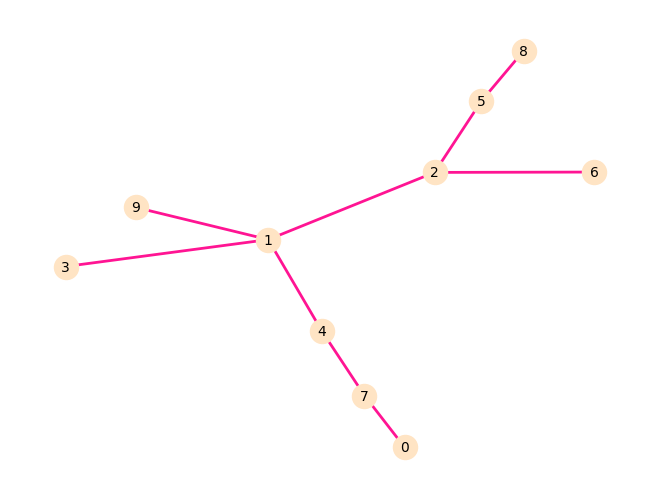

this is A_dict: 
{'0_7': [['c', 'g'], ['a', 'g'], ['t', 't'], ['c', 't'], ['g', 'g'], ['c', '-'], ['c', 't'], ['c', 't']], '4_7': [['g', '-'], ['g', 'a'], ['t', '-'], ['t', 't'], ['g', '-'], ['t', 't'], ['t', 't']], '1_4': [['a', 't'], ['t', 't'], ['t', 't'], ['t', 'a']], '1_3': [['t', 'c'], ['-', 'g'], ['t', 't'], ['t', 'c'], ['a', 'a']], '1_2': [['t', 't'], ['t', 'c'], ['t', 't'], ['-', 'g'], ['a', 'g'], ['-', 'c']], '1_9': [['t', 'g'], ['t', 'g'], ['t', 'a'], ['a', 'a']], '2_5': [['t', 'g'], ['c', 'c'], ['t', 't'], ['-', 'c'], ['g', 't'], ['g', 'g'], ['c', 'c']], '2_6': [['-', 'a'], ['t', 't'], ['c', 'a'], ['t', 't'], ['g', 'g'], ['g', 'a'], ['c', 'c'], ['-', 't']], '5_8': [['g', 'g'], ['-', 'a'], ['c', 'c'], ['-', 'g'], ['t', 't'], ['c', 't'], ['t', 't'], ['g', 'a'], ['c', 'a']]}
Total cost of MSA:1269


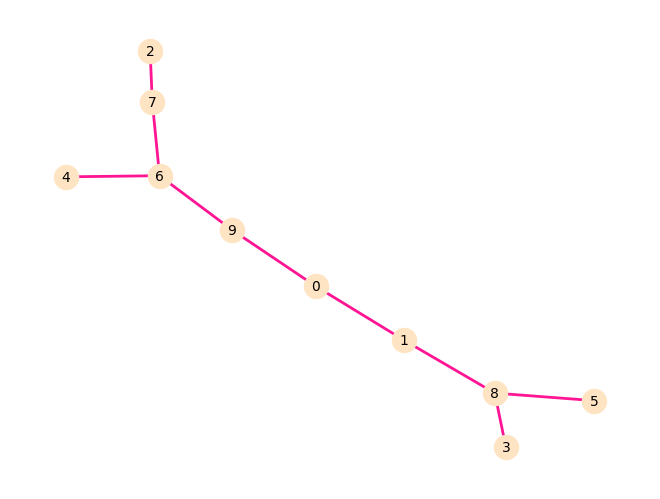

this is A_dict: 
{'4_6': [['t', '-'], ['c', 'a'], ['t', 't'], ['t', 'c'], ['a', '-'], ['t', 't']], '6_7': [['a', 'a'], ['t', 't'], ['-', 'a'], ['-', 'a'], ['c', 't'], ['t', 't']], '6_9': [['a', 'a'], ['t', 't'], ['c', 't'], ['-', 'g'], ['-', 'g'], ['t', 'g']], '2_7': [['a', 'a'], ['-', 'g'], ['t', 't'], ['a', 'a'], ['a', 'g'], ['-', 't'], ['-', 't'], ['t', 't'], ['t', 't']], '0_9': [['a', 'g'], ['t', 'g'], ['t', 'a'], ['g', 'g'], ['g', 'a'], ['g', 'g']], '0_1': [['g', 'a'], ['g', 'g'], ['a', 'g'], ['-', 't'], ['g', 't'], ['a', 'a'], ['g', 'g']], '1_8': [['a', 'a'], ['g', 'a'], ['g', 'g'], ['t', 'a'], ['t', 'c'], ['a', 'a'], ['-', 't'], ['g', 'g']], '5_8': [['a', 'a'], ['a', 'a'], ['g', 'g'], ['a', 'g'], ['c', 't'], ['a', 'a'], ['t', 'a'], ['g', 'g'], ['-', 'a']], '3_8': [['a', 'g'], ['a', 'a'], ['g', '-'], ['a', 'a'], ['c', 'c'], ['a', 'g'], ['t', 'c'], ['g', 'c']]}
Total cost of MSA:1458


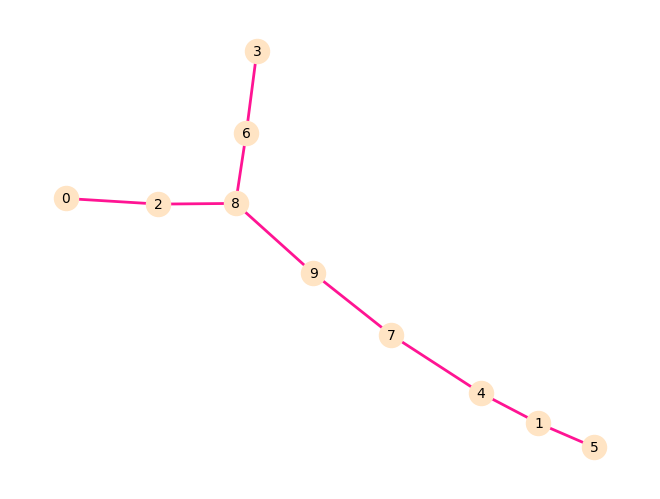

this is A_dict: 
{'0_2': [['g', 'a'], ['t', 't'], ['a', 'a'], ['c', 'c'], ['c', 'c'], ['g', 'g'], ['g', 'g'], ['a', '-']], '2_8': [['a', 'a'], ['t', '-'], ['a', 'g'], ['c', 'c'], ['c', 'c'], ['g', '-'], ['g', '-']], '8_9': [['a', 'g'], ['g', 'c'], ['c', 't'], ['c', 'c']], '6_8': [['a', 'g'], ['g', 'g'], ['c', 't'], ['-', 'g'], ['c', 'c'], ['-', 'a']], '7_9': [['g', 'c'], ['c', 't'], ['t', 't'], ['c', 't']], '3_6': [['g', 'g'], ['g', 'a'], ['t', 't'], ['g', 'g'], ['c', 't'], ['a', 'g']], '4_7': [['c', 'c'], ['t', 'c'], ['t', 't'], ['t', 't'], ['-', 'g']], '1_4': [['c', 't'], ['c', 'c'], ['-', 'a'], ['t', 't'], ['t', 't'], ['g', 'a'], ['-', 'c'], ['-', 't']], '1_5': [['t', '-'], ['c', 'c'], ['a', 'g'], ['t', 't'], ['t', 't'], ['a', 'g'], ['-', 't'], ['c', 't'], ['t', 't']]}
Total cost of MSA:1061


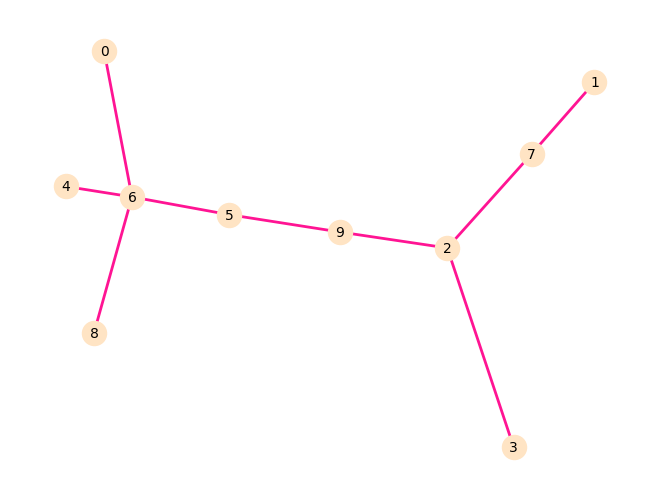

this is A_dict: 
{'4_6': [['c', 'c'], ['a', '-'], ['a', 'a'], ['t', 'c'], ['c', 'a'], ['t', 'g'], ['t', 't'], ['c', 'g'], ['c', 'c']], '0_6': [['c', 'c'], ['a', 't'], ['c', 't'], ['a', 'a'], ['g', 'g'], ['t', 'c'], ['g', 'g'], ['-', 't'], ['c', 't']], '6_8': [['-', 't'], ['c', 'c'], ['a', 'a'], ['c', 'g'], ['a', 'g'], ['g', 'a'], ['t', 't'], ['g', 'a'], ['c', 'c']], '5_6': [['c', 't'], ['a', 'a'], ['c', 'a'], ['a', 'a'], ['g', 'g'], ['t', '-'], ['g', 'g'], ['c', '-']], '5_9': [['t', 't'], ['a', 'a'], ['a', 'c'], ['a', 'a'], ['g', '-'], ['g', 'a']], '2_9': [['t', 't'], ['a', 'a'], ['c', 't'], ['a', '-'], ['a', 't']], '2_3': [['t', 't'], ['a', 'c'], ['t', 't'], ['t', 't']], '2_7': [['-', 'c'], ['t', 'c'], ['a', 'a'], ['t', 't'], ['t', 't'], ['-', 'a']], '1_7': [['c', 't'], ['-', 'g'], ['c', 't'], ['a', 'a'], ['t', 'c'], ['t', 'c'], ['a', 'g']]}
Total cost of MSA:1265


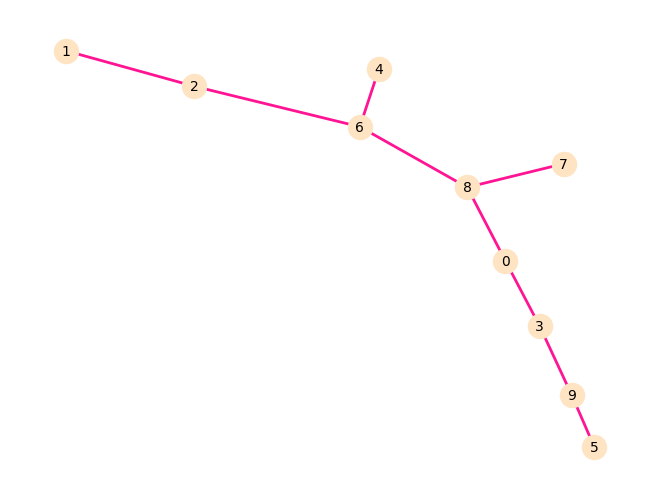

this is A_dict: 
{'0_8': [['t', 'c'], ['c', 'c'], ['t', 'c'], ['g', 'g'], ['t', 't'], ['c', '-'], ['t', 'g'], ['a', 'g'], ['c', 't']], '0_3': [['t', 'g'], ['c', 't'], ['t', 't'], ['g', 'g'], ['t', 'c'], ['c', 'g'], ['t', 'c'], ['a', 'c'], ['c', 'c']], '6_8': [['c', '-'], ['c', '-'], ['c', '-'], ['g', 'g'], ['t', 't'], ['g', 'a'], ['g', 'g'], ['t', 't']], '7_8': [['c', 'c'], ['c', 'a'], ['c', 'c'], ['g', 'g'], ['t', 'c'], ['g', 'a'], ['-', 't'], ['g', 'g'], ['t', 'a']], '3_9': [['g', 'a'], ['t', 'c'], ['t', 'g'], ['g', 'g'], ['c', 'c'], ['g', '-'], ['c', 'c'], ['c', 'c'], ['c', 't']], '2_6': [['g', 'a'], ['t', 'g'], ['a', 'a'], ['g', 'a'], ['t', 't']], '4_6': [['g', 't'], ['t', 't'], ['a', 'a'], ['g', 't'], ['t', 't'], ['-', 'g']], '5_9': [['a', 'a'], ['c', '-'], ['g', 'g'], ['g', 'g'], ['c', 'c'], ['-', 'a'], ['c', 'g'], ['c', 'c'], ['t', 't'], ['-', 'g']], '1_2': [['a', 'g'], ['g', 'g'], ['a', 't'], ['a', 'a'], ['t', 'c']]}
Total cost of MSA:1276


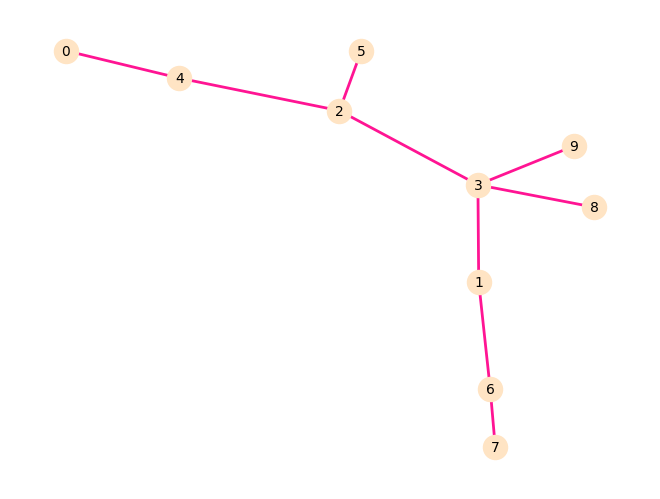

this is A_dict: 
{'0_4': [['t', 't'], ['c', 'c'], ['t', 't'], ['c', '-'], ['g', 'g'], ['g', 'c'], ['a', 'a'], ['t', '-']], '2_4': [['t', '-'], ['c', 'c'], ['t', 't'], ['g', 'a'], ['c', 'c'], ['a', 't']], '2_3': [['c', 'g'], ['t', 't'], ['a', 'a'], ['c', 'g'], ['t', 'c']], '2_5': [['c', 't'], ['-', 'a'], ['t', 't'], ['-', 'c'], ['a', 'g'], ['c', 'c'], ['t', 't']], '1_3': [['g', 'g'], ['t', '-'], ['a', 'a'], ['g', 'g'], ['c', 'g']], '3_8': [['g', 'g'], ['t', 't'], ['-', 'g'], ['-', 'g'], ['a', 'a'], ['g', 'a'], ['c', 't']], '3_9': [['-', 'g'], ['-', 'a'], ['g', 'g'], ['t', 't'], ['a', 'a'], ['g', 'c'], ['c', 'c']], '1_6': [['g', 'g'], ['a', 'g'], ['g', 'a'], ['g', 'a']], '6_7': [['g', 'a'], ['-', 'c'], ['g', 'g'], ['-', 't'], ['a', 'a'], ['a', 'g']]}
Total cost of MSA:1073


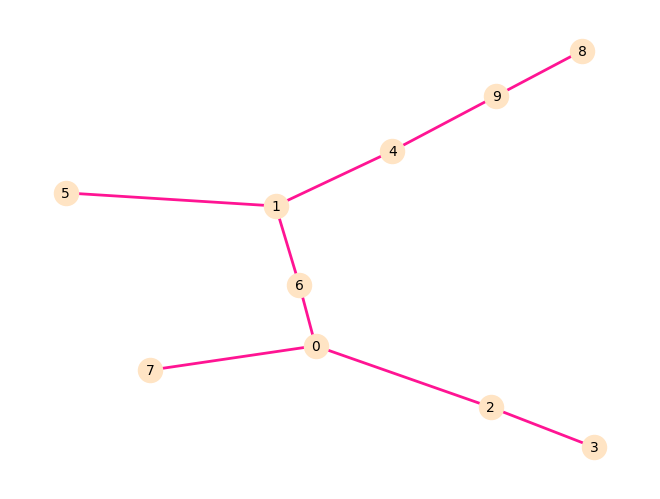

this is A_dict: 
{'0_2': [['g', 'g'], ['t', 't'], ['c', 'c'], ['t', 't'], ['-', 'c'], ['t', 't'], ['c', 'c'], ['-', 't']], '0_6': [['g', 'c'], ['t', 't'], ['-', 'a'], ['c', 'c'], ['t', 't'], ['t', 'c'], ['c', 'a']], '0_7': [['-', 't'], ['g', 'g'], ['t', 'c'], ['c', 't'], ['t', 't'], ['-', 'a'], ['-', 'a'], ['t', 'c'], ['c', 'c']], '2_3': [['g', 'g'], ['t', 't'], ['c', 'c'], ['t', 'g'], ['c', 'c'], ['t', 'c'], ['c', 'a'], ['t', 't'], ['-', 'a']], '1_6': [['c', 'c'], ['t', '-'], ['a', 'a'], ['c', '-'], ['t', 't'], ['c', 'c'], ['a', 'a']], '1_4': [['c', '-'], ['a', 'a'], ['t', 't'], ['c', 't'], ['-', 'g'], ['-', 'a'], ['a', 'a']], '1_5': [['c', 'a'], ['a', 'g'], ['t', 't'], ['-', 'a'], ['c', 'c'], ['a', 'a'], ['-', 't']], '4_9': [['a', 'c'], ['t', 'c'], ['t', 'g'], ['g', 'g'], ['a', 'a'], ['a', 'g']], '8_9': [['c', 'c'], ['-', 't'], ['c', 't'], ['g', 'g'], ['g', 'a'], ['a', 'a'], ['-', 'g'], ['g', 'g']]}
Total cost of MSA:1533


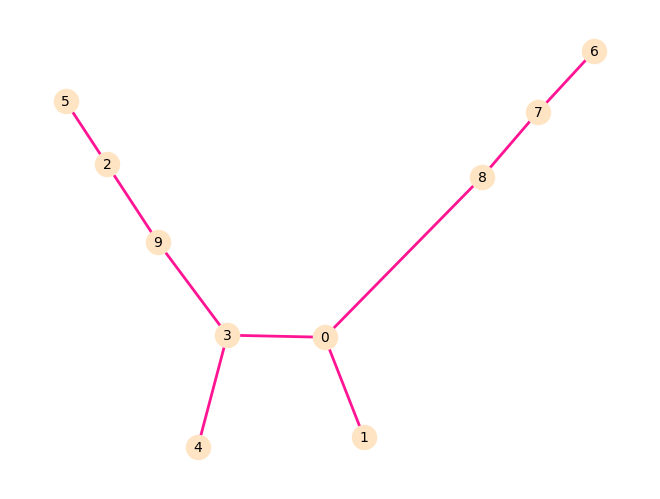

this is A_dict: 
{'0_1': [['a', 'c'], ['g', 't'], ['g', 'g'], ['g', 'g']], '0_8': [['c', 'c'], ['t', 't'], ['g', 'g'], ['g', 'a']], '0_3': [['c', 'a'], ['t', 't'], ['g', 'c'], ['g', 'g']], '7_8': [['c', 'c'], ['t', 't'], ['g', 'g'], ['-', 'c'], ['a', 'a'], ['-', 't'], ['-', 'c']], '3_4': [['-', 'a'], ['-', 'c'], ['a', 'a'], ['t', 't'], ['c', 'c'], ['g', 'a']], '3_9': [['a', 'a'], ['t', 'c'], ['c', 'c'], ['-', 't'], ['g', 'g'], ['-', 'c']], '6_7': [['c', 'c'], ['t', 'g'], ['g', 'a'], ['c', 'c'], ['a', 'g'], ['t', 'c'], ['c', 'c']], '2_9': [['a', 'g'], ['-', 't'], ['c', 'c'], ['c', 't'], ['t', 't'], ['g', 'g'], ['c', 'c'], ['-', 'g'], ['-', 'g']], '2_5': [['g', '-'], ['t', 't'], ['c', 'c'], ['t', 't'], ['t', 't'], ['-', 'g'], ['g', 'g'], ['c', 'c'], ['g', 't'], ['g', 'c']]}
Total cost of MSA:1159
[1160, 1018, 1332, 1355, 1345, 1438, 1067, 1399, 1169, 1272, 1217, 1417, 1206, 1236, 1179, 1140, 1324, 1273, 1290, 1451, 1236, 1249, 973, 1275, 1459, 1176, 1101, 1171, 1298, 1194, 1326, 907, 130

In [103]:
costs_new_gradual=[]
costs_new_one_by_one=[]
costs_old=[]

for random_pile in random_sequences_collection:
    cost=new_assembly(random_pile,score_matrix,gap_cost)[4]
    costs_new_gradual.append(cost)
for random_pile in random_sequences_collection:
    cost=new_sp_approxi_combi(random_pile,score_matrix,gap_cost)[0]
    costs_new_one_by_one.append(cost)
for random_pile in random_sequences_collection:
    cost=sp_approx(random_pile,score_matrix,gap_cost)[0]
    costs_old.append(cost)
print(costs_new_gradual)
print(costs_new_one_by_one)
print(costs_old)
costs_new_gradual=np.array(costs_new_gradual)
costs_new_one_by_one=np.array(costs_new_one_by_one)
costs_old=np.array(costs_old)
differences_obo_old=np.subtract(costs_new_one_by_one,costs_old)
differences_gradual_old=np.subtract(costs_new_gradual,costs_old)
differences_gradual_obo=np.subtract(costs_new_gradual,costs_new_one_by_one)
print(differences_obo_old, differences_gradual_obo,differences_gradual_obo)

In [105]:
count_diff_obo_old=(np.count_nonzero(differences_obo_old<0),len(differences_obo_old[differences_obo_old == 0])) #times one by one was better or equal than old
count_diff_gradual_old=(np.count_nonzero(differences_gradual_old<0),len(differences_gradual_old[differences_gradual_old == 0])) #times gradual was better or equal than old
count_diff_gradual_obo=(np.count_nonzero(differences_gradual_obo<0),len(differences_gradual_obo[differences_gradual_obo == 0])) #times gradual was better or equal than one by one
print(count_diff_obo_old,count_diff_gradual_old,count_diff_gradual_obo)

(11, 0) (12, 0) (18, 53)


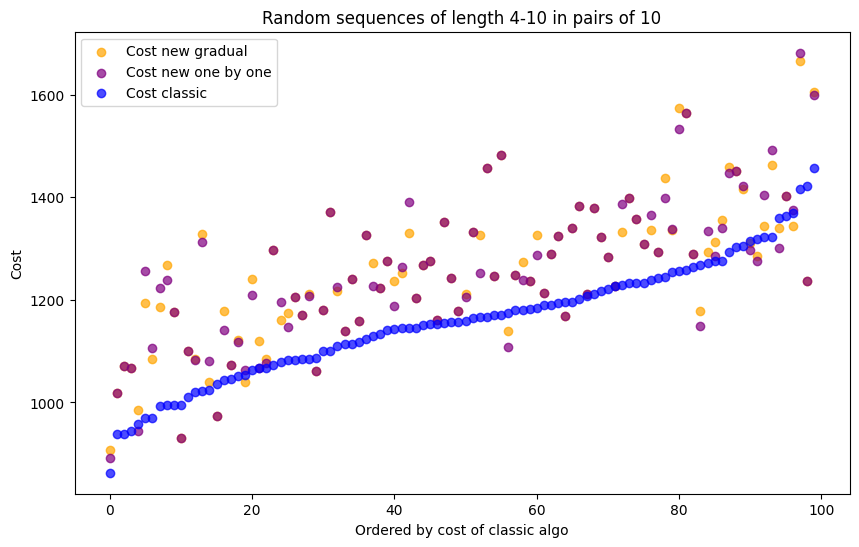

In [107]:
#costs_new_gradual
#costs_new_one_by_one
#costs_old

indices = list(range(0, 100))


# Get the indices that would sort cost_old array
sorted_indices = np.argsort(costs_old)

# Sort all arrays based on the order in cost_old
sorted_costs_old = np.array(costs_old)[sorted_indices]
sorted_costs_new_gradual = np.array(costs_new_gradual)[sorted_indices]
sorted_costs_new_one_by_one = np.array(costs_new_one_by_one)[sorted_indices]
sorted_indices = np.array(indices)[sorted_indices]

# Plot the sorted data
plt.figure(figsize=(10, 6))
plt.scatter(indices, sorted_costs_new_gradual, color='orange', label='Cost new gradual', marker='o', alpha=0.7)
plt.scatter(indices, sorted_costs_new_one_by_one, color='purple', label='Cost new one by one', marker='o', alpha=0.7)
plt.scatter(indices, sorted_costs_old, color='blue', label='Cost classic', marker='o', alpha=0.7)

plt.xlabel('Ordered by cost of classic algo')
plt.ylabel('Cost')
plt.title('Random sequences of length 4-10 in pairs of 10')
plt.legend()


plt.savefig('scatter_plot_random_seqs_ultra_short.png')
plt.show()
